# Predictive Analytics for Cross Selling in Bank





By Riya Saroj - 2309042 & Sanika Shinde - 2309043

# Data Inspection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/PLXSELL.csv')
df = pd.read_csv('/content/PLXSELL.csv')

In [ ]:
df.shape

(20000, 38)

In [ ]:
df.head()

CUST_ID  TARGET  AGE GENDER     BALANCE OCCUPATION AGE_BKT  SCR  \
0   C7927       0   27      M     3383.75   SELF_EMP   26-30  776   
1   C6877       0   47      M   287489.04        SAL   46-50  324   
2  C19922       0   40      M    18216.88   SELF_EMP   36-40  603   
3   C8183       0   53      M    71720.48        SAL     >50  196   
4  C12123       0   36      M  1671622.89       PROF   36-40  167   

   HOLDING_PERIOD ACC_TYPE  ...  AMT_MIN_BAL_NMC_CHGS  NO_OF_IW_CHQ_BNC_TXNS  \
0              30       SA  ...                     0                      0   
1              28       SA  ...                     0                      0   
2               2       SA  ...                     0                      0   
3              13       CA  ...                     0                      0   
4              24       SA  ...                     0                      0   

   NO_OF_OW_CHQ_BNC_TXNS  AVG_AMT_PER_ATM_TXN  AVG_AMT_PER_CSH_WDL_TXN  \
0                      0              13100.0                      0.0   
1                      0               6600.0                      0.0   
2                      1              11200.0                 561120.0   
3                      0              13050.0                 168397.5   
4                      0                  0.0                 808480.0   

   AVG_AMT_PER_CHQ_TXN  AVG_AMT_PER_NET_TXN  AVG_AMT_PER_MOB_TXN  \
0                  0.0            486778.50                  0.0   
1                  0.0            799813.00                  0.0   
2              24660.0            997570.00                  0.0   
3              15195.0            247168.67              71388.0   
4                  0.0                 0.00                  0.0   

   FLG_HAS_NOMINEE  FLG_HAS_OLD_LOAN  
0                1                 1  
1                1                 0  
2                1                 1  
3                1                 0  
4                1                 0  

[5 rows x 38 columns]

In [ ]:
df.dtypes

CUST_ID                      object
TARGET                        int64
AGE                           int64
GENDER                       object
BALANCE                     float64
OCCUPATION                   object
AGE_BKT                      object
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                     object
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS              int64
AMT_OTH_BK_ATM_USG_CHGS       int64
AMT_MIN_BAL_NMC_CHGS          int64
NO_OF_IW_CHQ_BNC_TXNS         int64
NO_OF_OW_CHQ_BNC_TXNS         int64
AVG_AMT_PER_ATM_TXN         float64
AVG_AMT_PER_CSH_WDL_TXN     float64
AVG_AMT_PER_CHQ_TXN         float64
AVG_AMT_PER_NET_TXN         float64
AVG_AMT_PER_MOB_TXN         float64
FLG_HAS_NOMINEE               int64
FLG_HAS_OLD_LOAN              int64
dtype: object

In [ ]:
df.dtypes

CUST_ID                      object
TARGET                        int64
AGE                           int64
GENDER                       object
BALANCE                     float64
OCCUPATION                   object
AGE_BKT                      object
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                     object
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS              int64
AMT_OTH_BK_ATM_USG_CHGS       int64
AMT_MIN_BAL_NMC_CHGS          int64
NO_OF_IW_CHQ_BNC_TXNS         int64
NO_OF_OW_CHQ_BNC_TXNS         int64
AVG_AMT_PER_ATM_TXN         float64
AVG_AMT_PER_CSH_WDL_TXN     float64
AVG_AMT_PER_CHQ_TXN         float64
AVG_AMT_PER_NET_TXN         float64
AVG_AMT_PER_MOB_TXN         float64
FLG_HAS_NOMINEE               int64
FLG_HAS_OLD_LOAN              int64
dtype: object

setting display options to ensure feature name visibility

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# warning supression
import warnings
warnings.filterwarnings('ignore')

 we need to check whether a customer id is missing as the model is going to get built at a customer id level, i.e it is going to deliver a probability value for every cutomer id number.

In [ ]:
df['CUST_ID'].isnull().sum()

0

# Exploratory Data Analysis

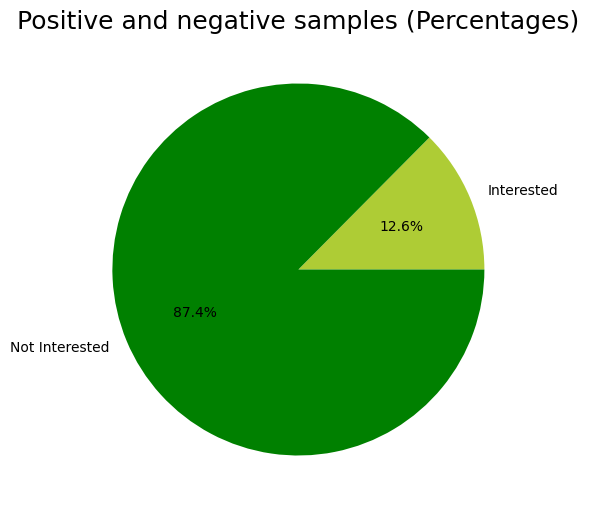

In [ ]:
#Calculating positive and negative samples in percentages

positive_percent = len(df[df['TARGET'] == 1])/len(df)*100
negative_percent = len(df[df['TARGET'] == 0])/len(df)*100
percentages = [positive_percent,negative_percent]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(percentages, labels=['Interested','Not Interested'], autopct = '%.1f%%', colors = ['#aecc35', 'green'])
plt.title('Positive and negative samples (Percentages)', fontsize = 18)
plt.show()

In [ ]:
df['GENDER'].value_counts()

GENDER
M    14376
F     5433
O      191
Name: count, dtype: int64

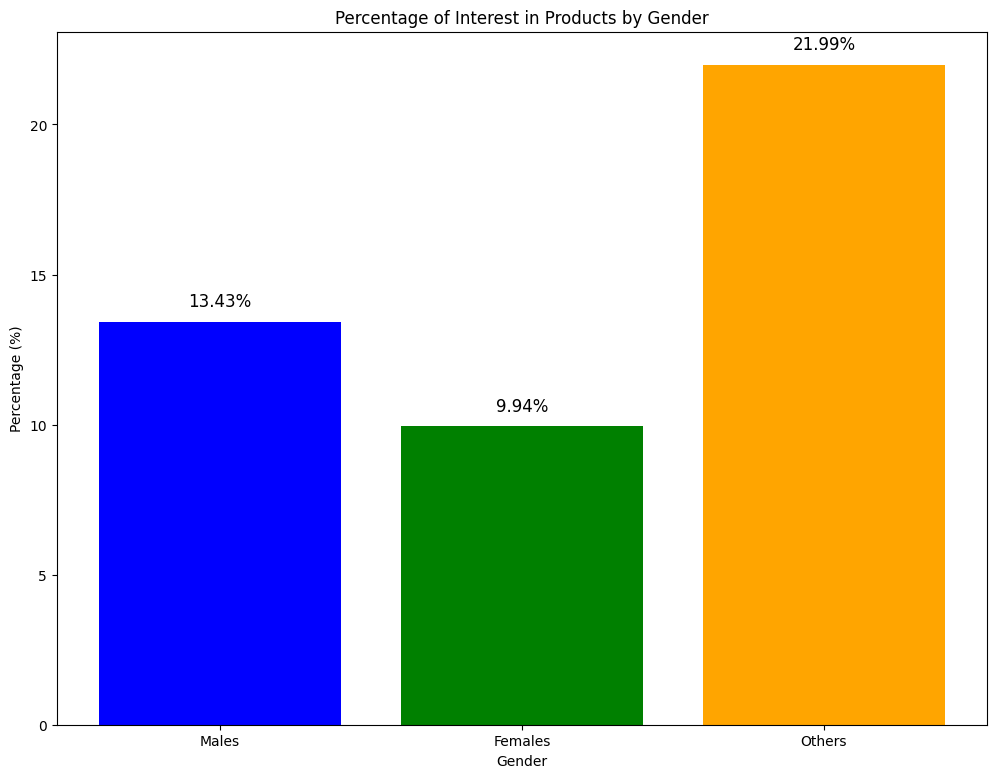

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentages
males_interest = df[(df['GENDER'] == 'M') & (df['TARGET'] == 1)]['CUST_ID'].count() * 100 / df[df['GENDER'] == 'M']['CUST_ID'].count()
females_interest = df[(df['GENDER'] == 'F') & (df['TARGET'] == 1)]['CUST_ID'].count() * 100 / df[df['GENDER'] == 'F']['CUST_ID'].count()
others_interest = df[(df['GENDER'] == 'O') & (df['TARGET'] == 1)]['CUST_ID'].count() * 100 / df[df['GENDER'] == 'O']['CUST_ID'].count()

# Create a bar chart
categories = ['Males', 'Females', 'Others']
values = [males_interest, females_interest, others_interest]

plt.figure(figsize=(12, 9))
plt.bar(categories, values, color=['blue', 'green', 'orange'])

# Add title and labels
plt.title('Percentage of Interest in Products by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

# Display the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()


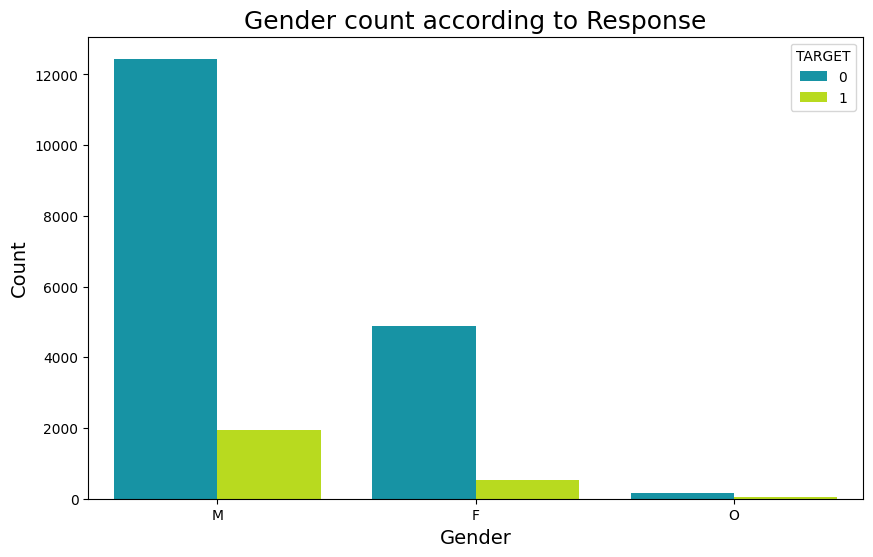

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'GENDER', hue = 'TARGET', palette = 'nipy_spectral')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Gender count according to Response', fontsize = 18)
plt.show()

AGE (How does age influence response)

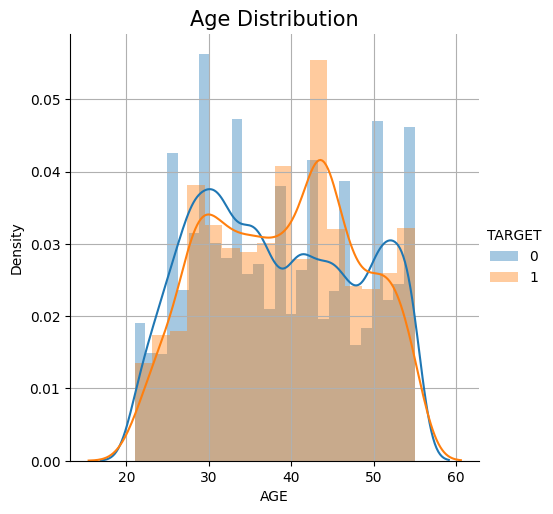

In [ ]:
sns.FacetGrid(data = df, hue = 'TARGET', height = 5).map(sns.distplot, 'AGE').add_legend()
plt.title('Age Distribution', fontsize = 15)
plt.grid()
plt.show()

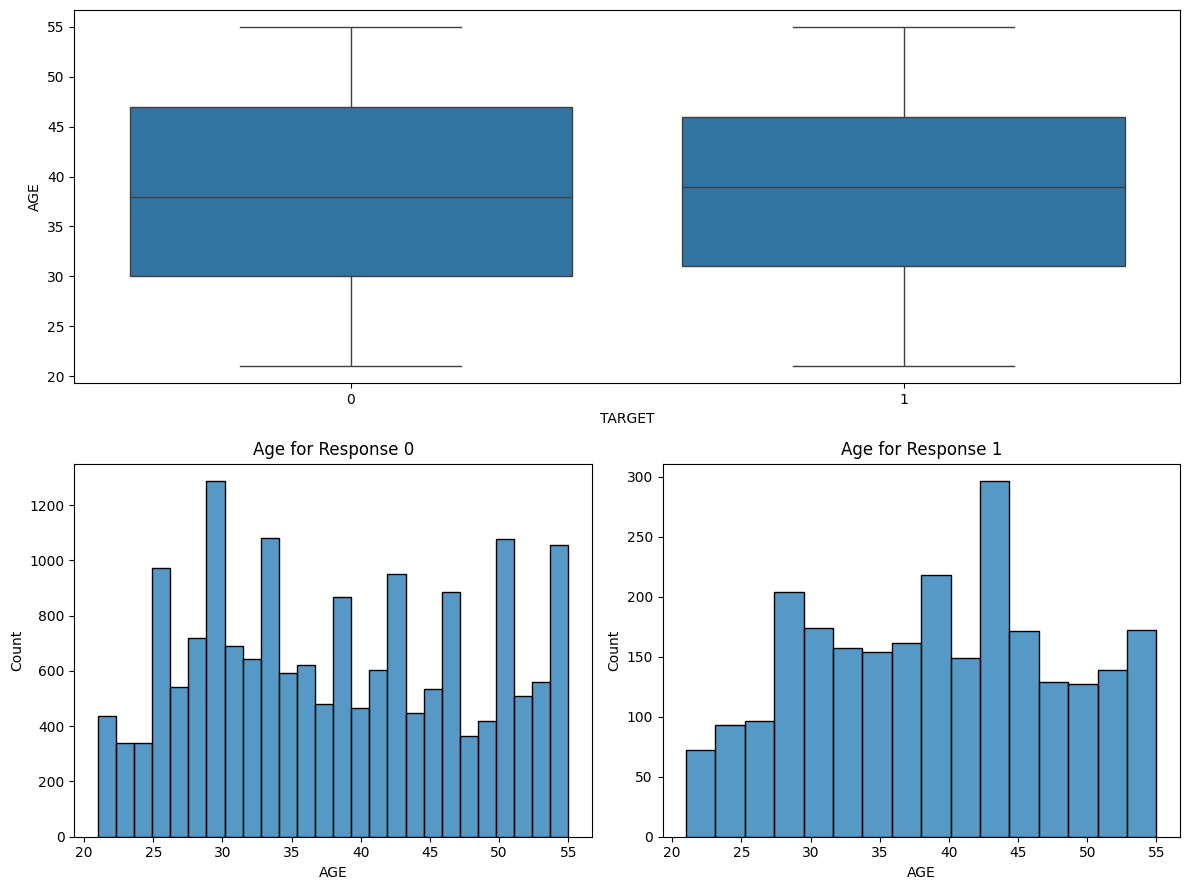

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 9))

G = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(G[0, :])
sns.boxplot(x='TARGET', y='AGE', data=df, ax=ax1)

ax2 = plt.subplot(G[1, 0])
sns.histplot(data=df[df['TARGET'] == 0], x='AGE', ax=ax2)
plt.title('Age for Response 0')

ax3 = plt.subplot(G[1, 1])
sns.histplot(data=df[df['TARGET'] == 1], x='AGE', ax=ax3)
plt.title('Age for Response 1');

plt.tight_layout()
plt.show()

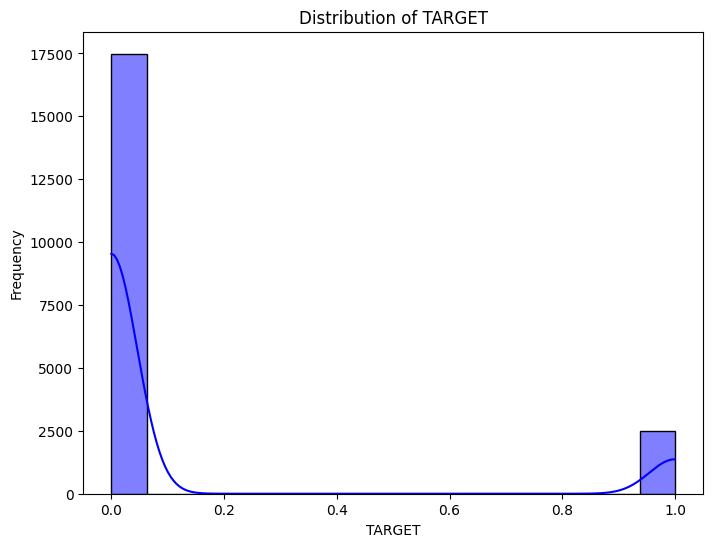

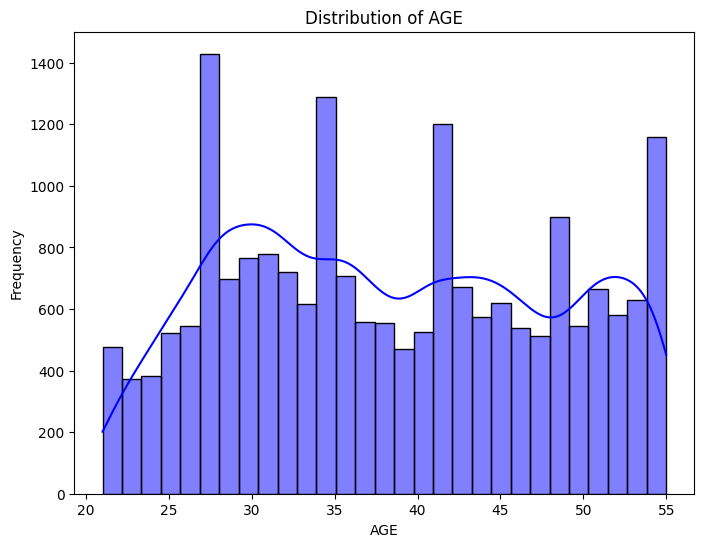

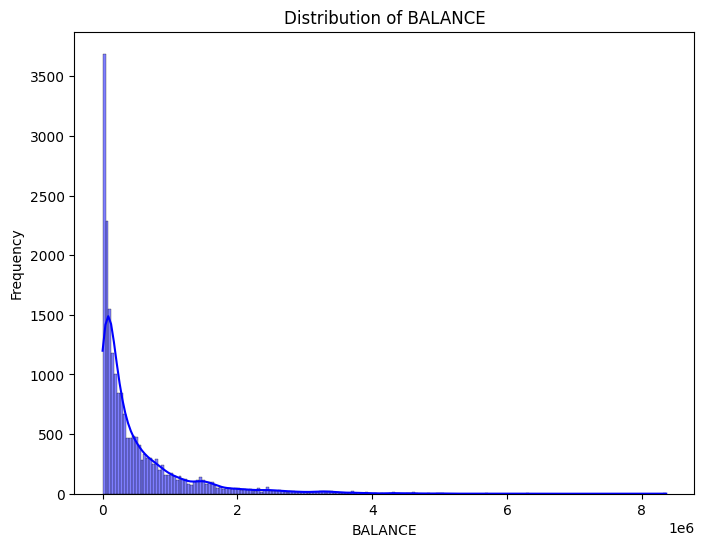

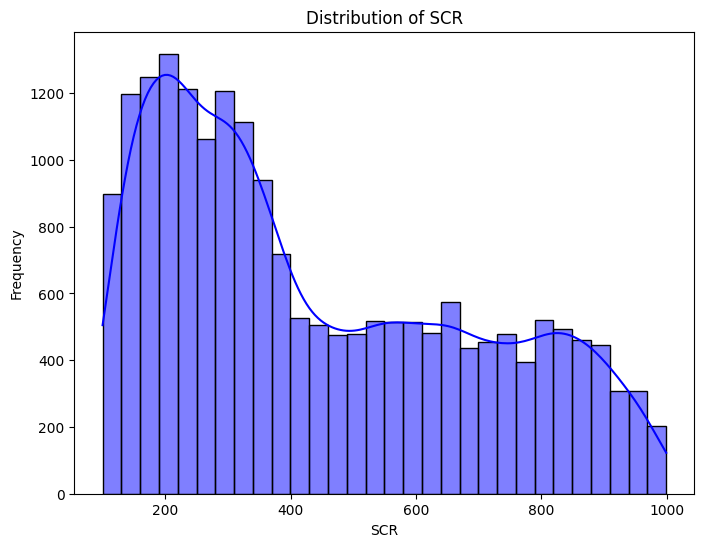

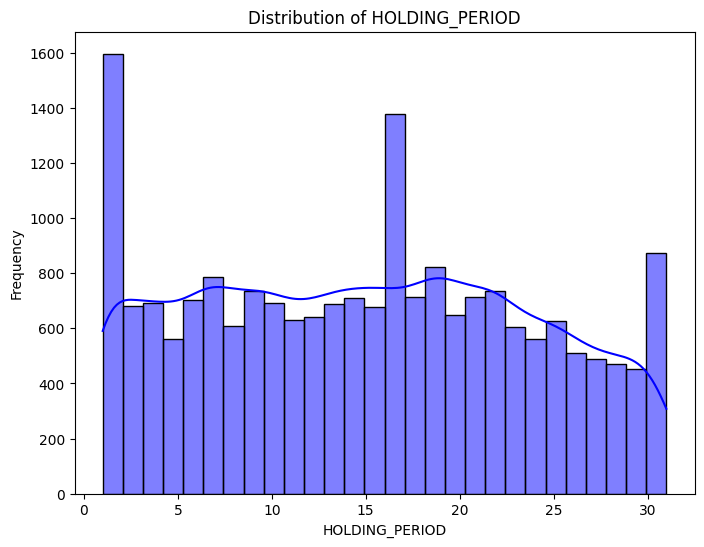

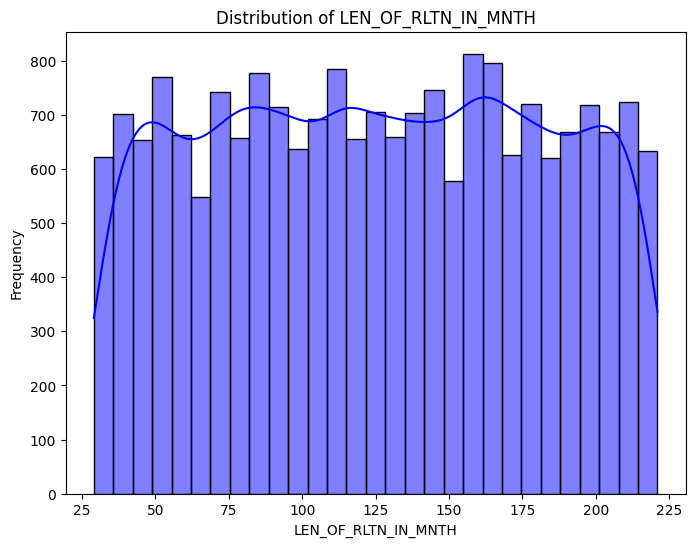

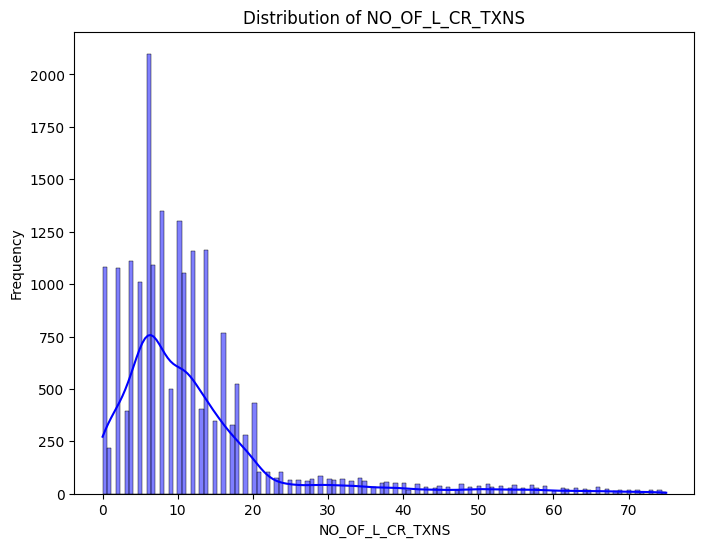

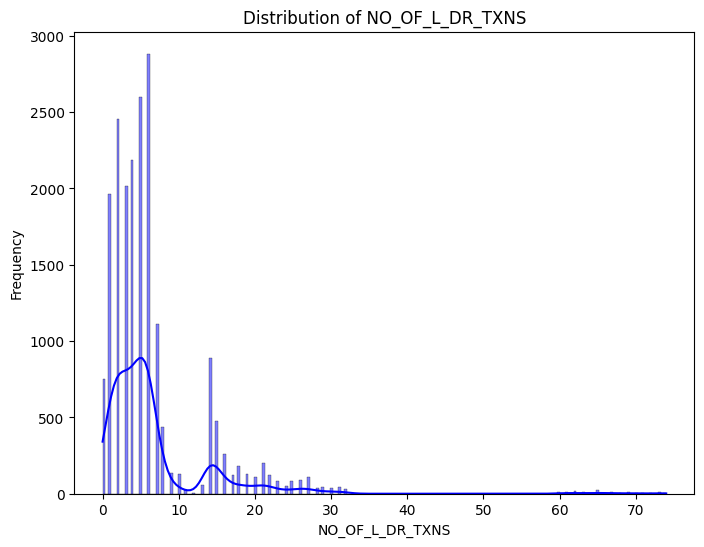

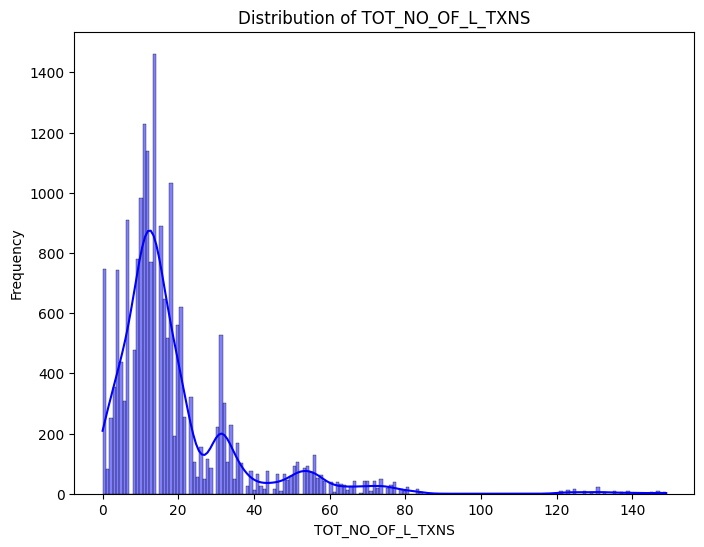

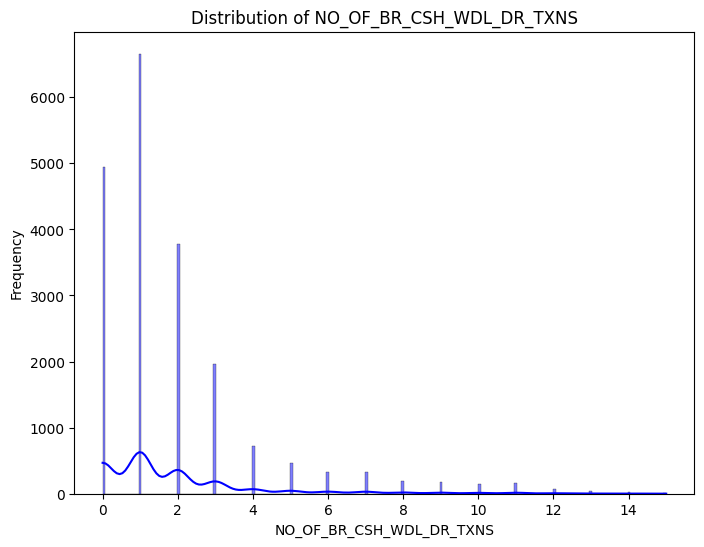

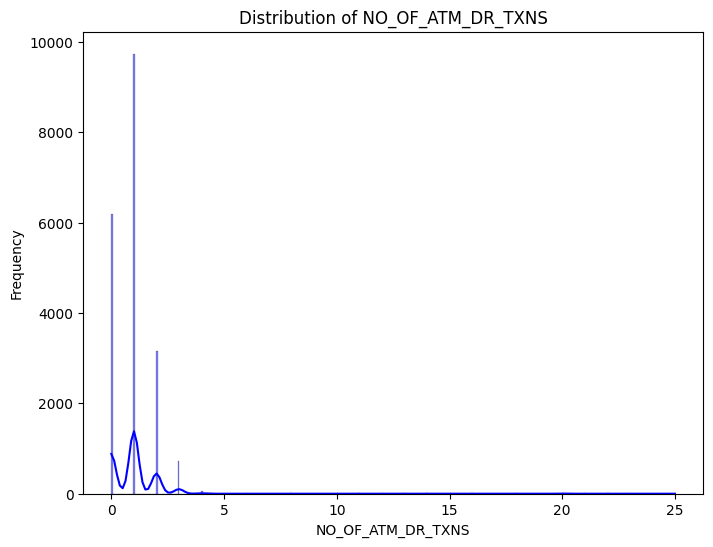

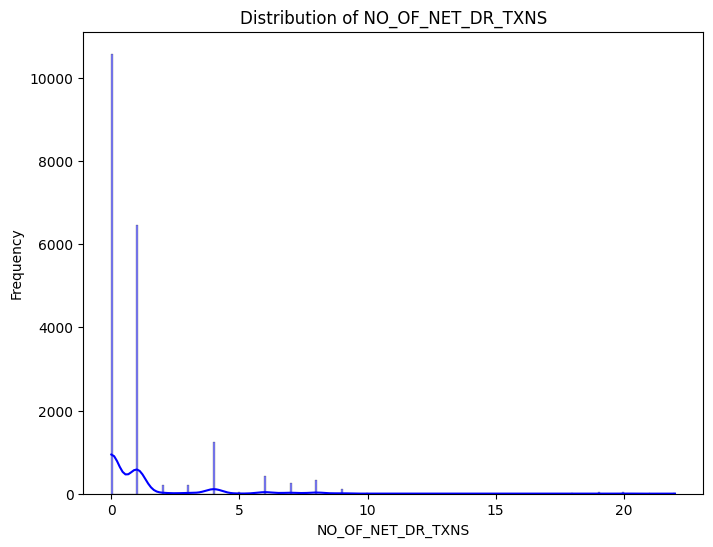

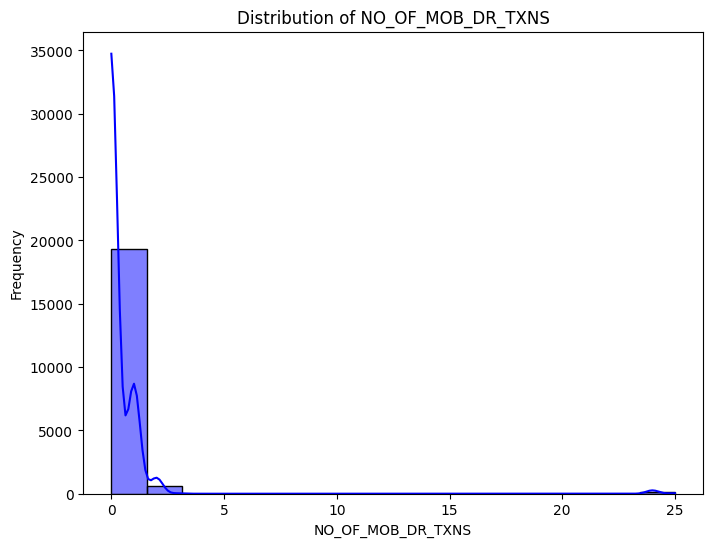

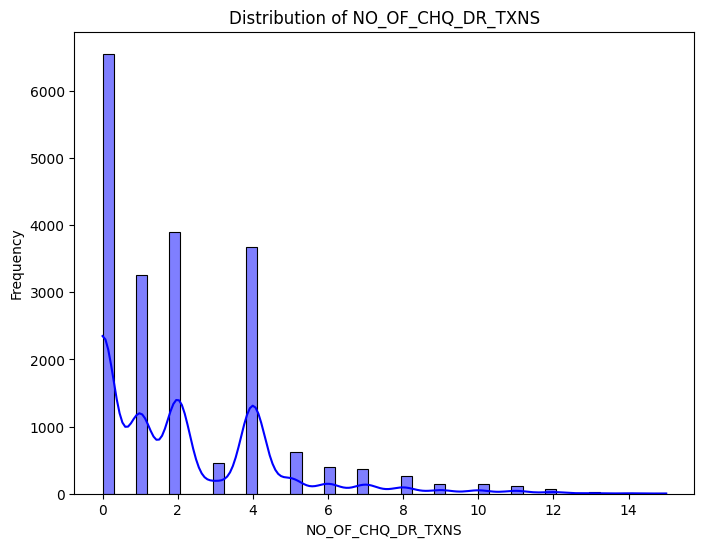

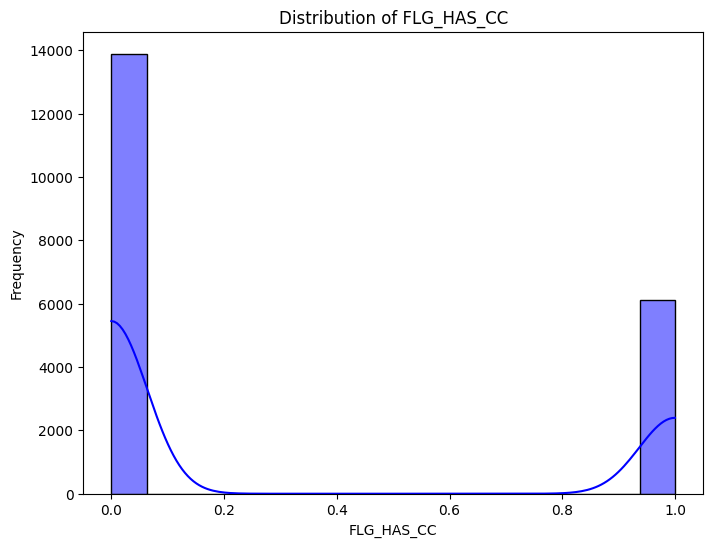

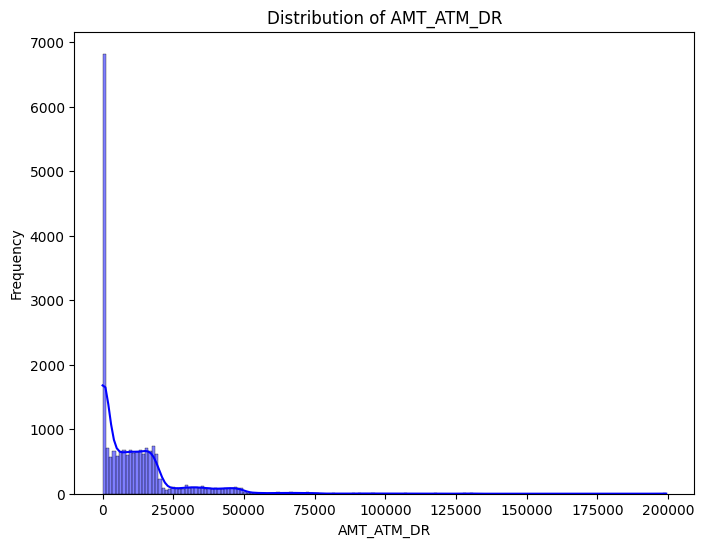

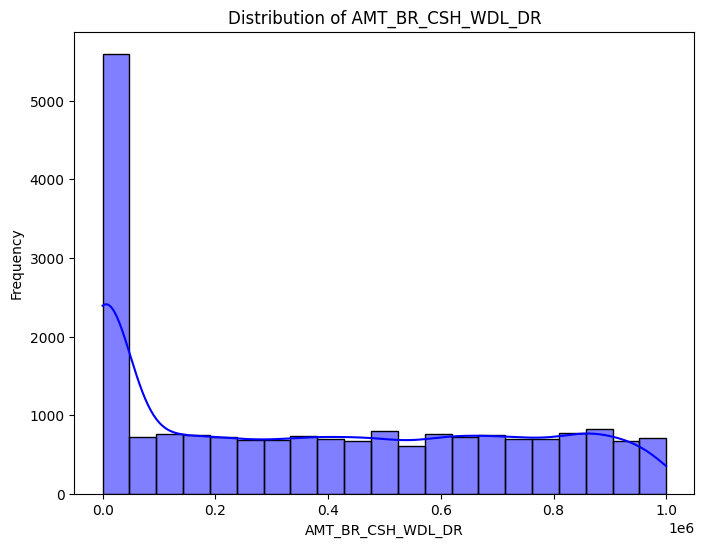

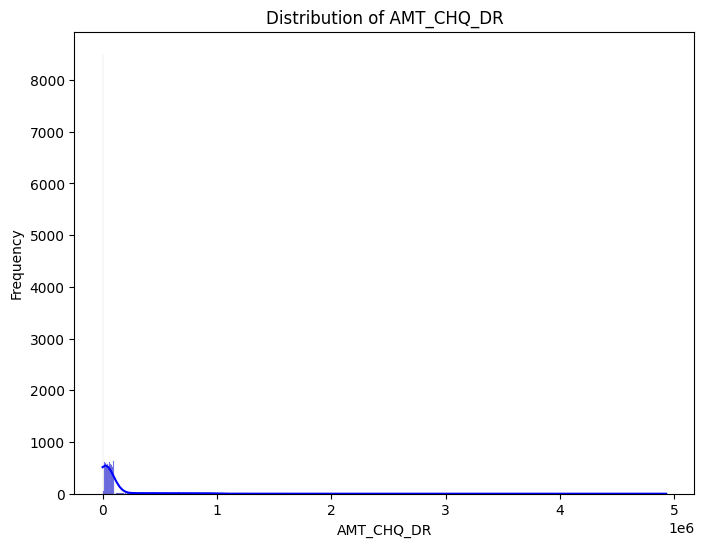

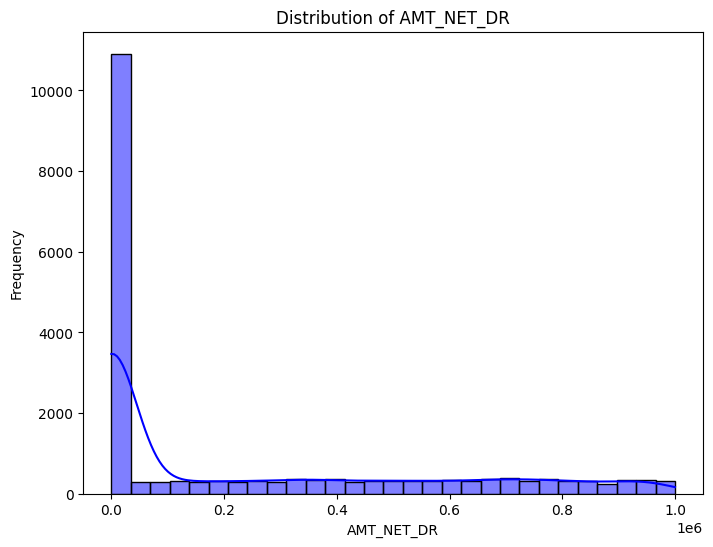

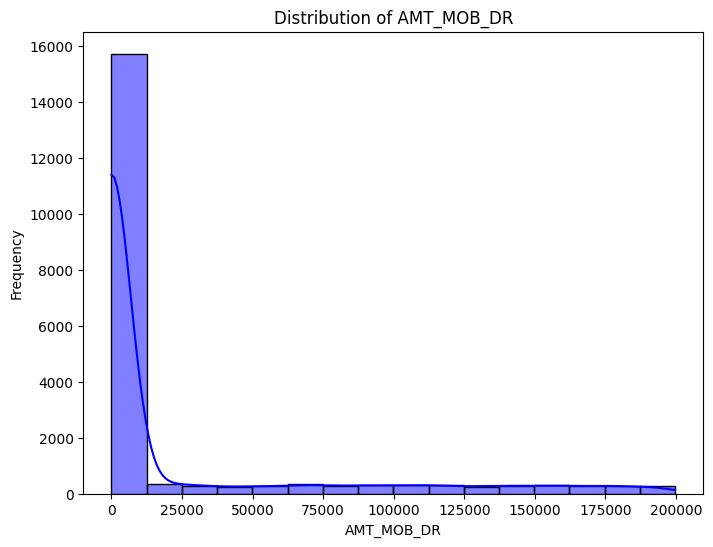

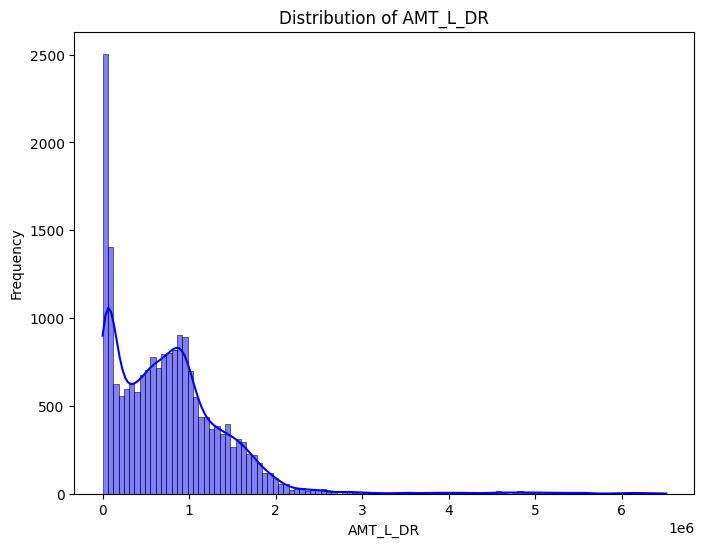

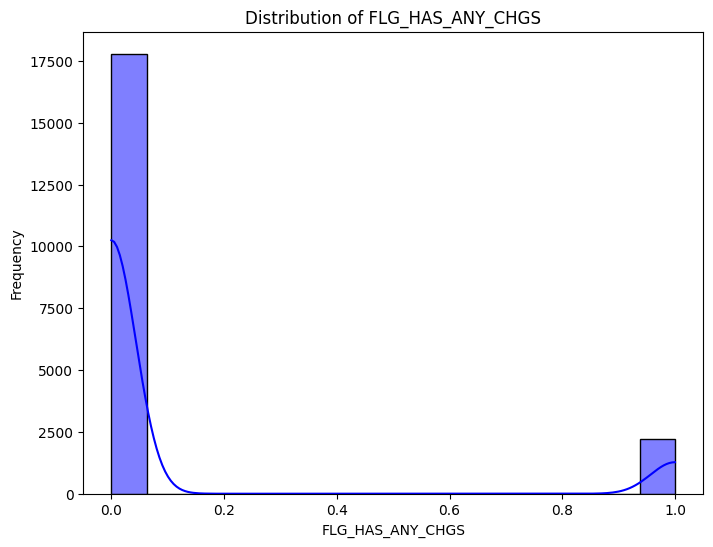

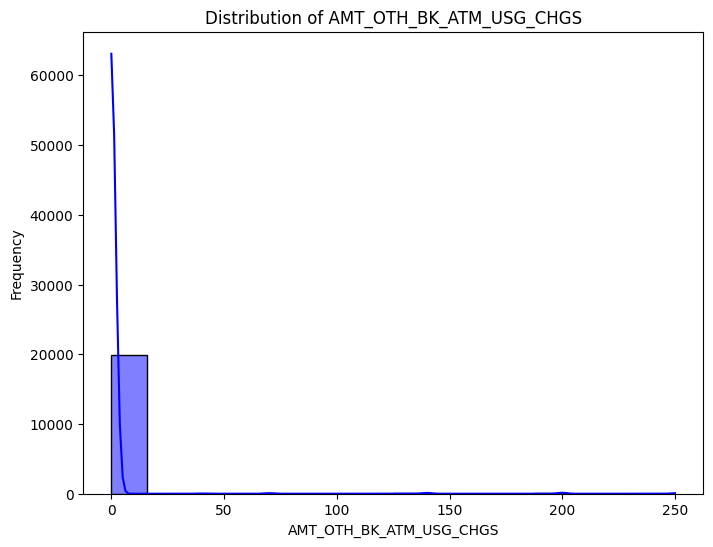

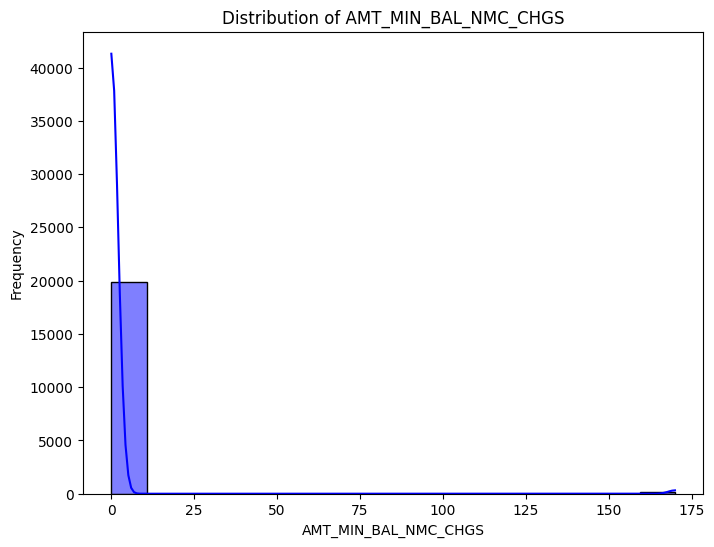

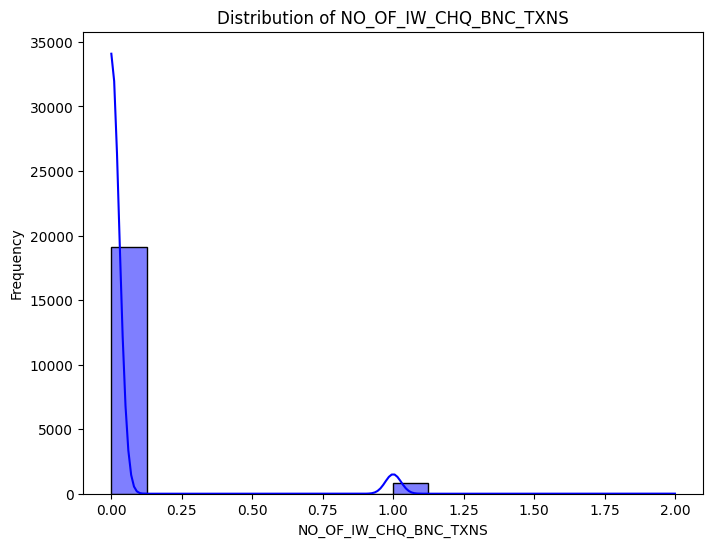

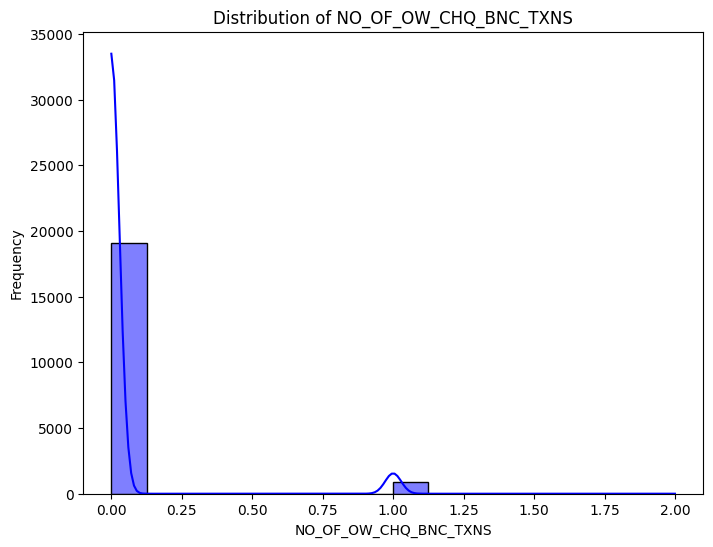

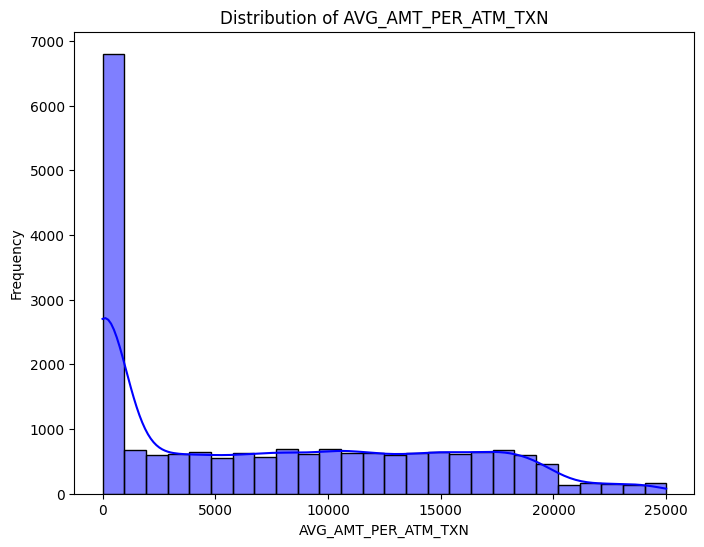

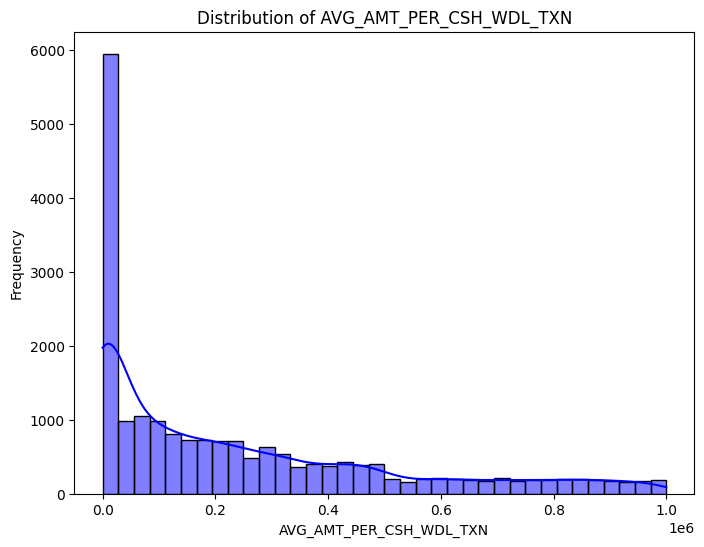

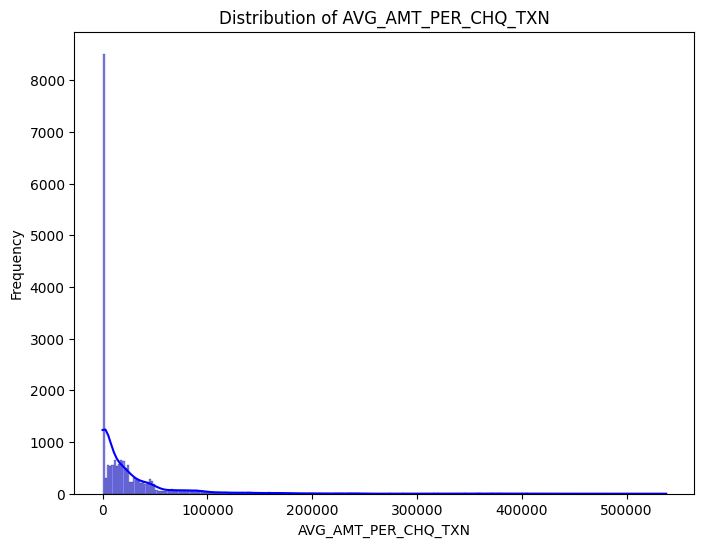

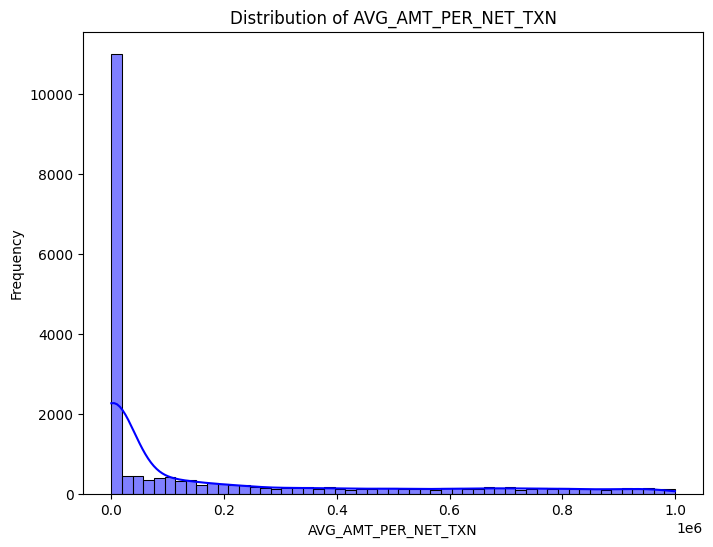

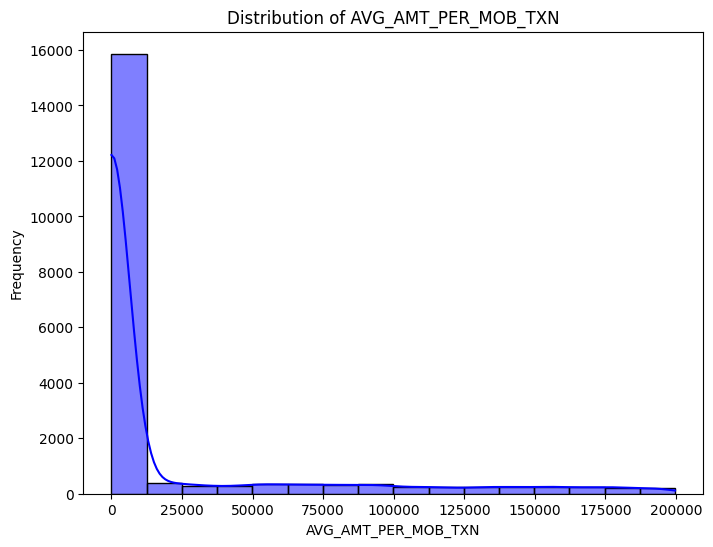

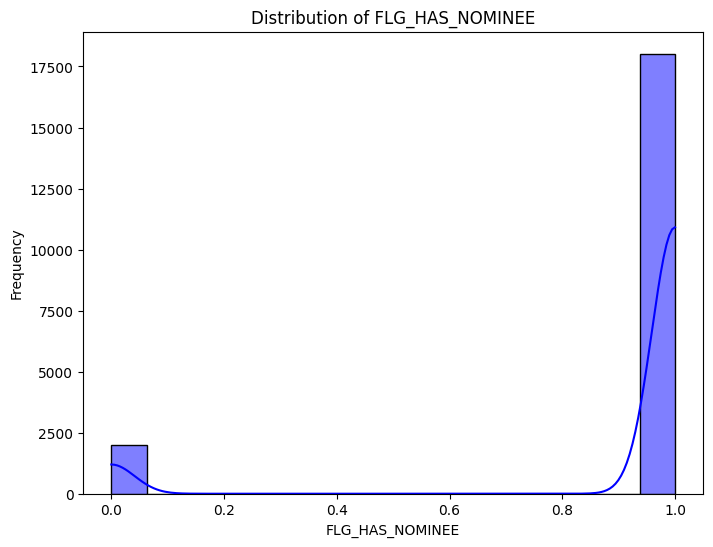

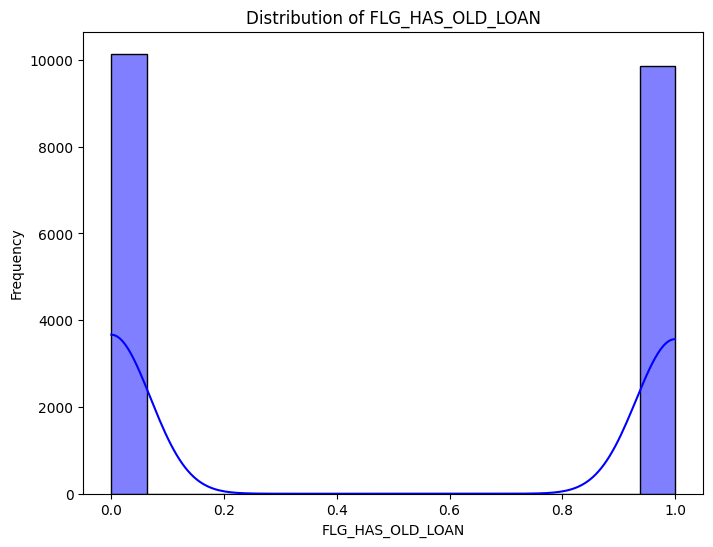

In [ ]:
# Plotting distribution for all numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


 Drop ID feature from the dataset
 as they are simply unique identifiers
 it does not affect the target value as it is not a behaviourial attribute

 ID is only used as an identifier and not a determiner

In [ ]:
df = df.drop(columns=["CUST_ID"],axis=1)

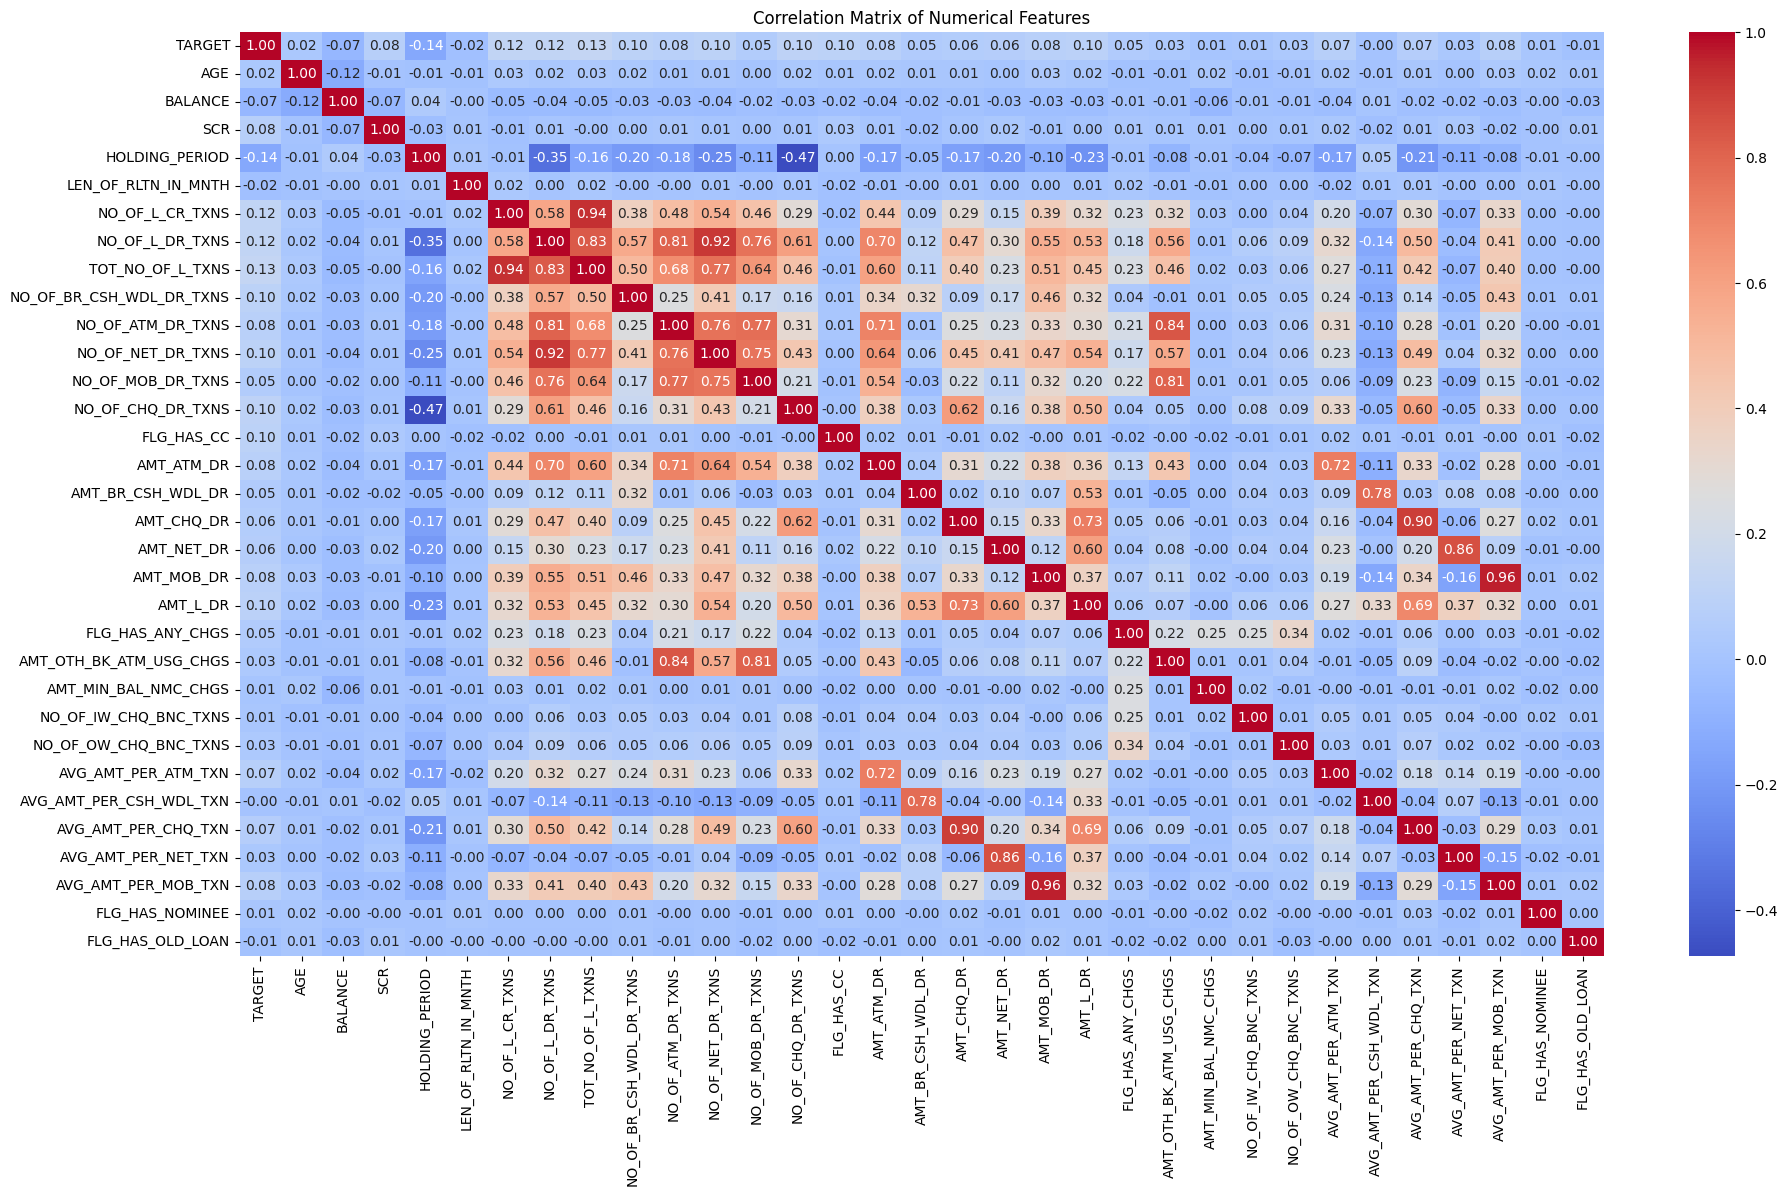

In [ ]:
# Calculate the correlation matrix using the DataFrame.
corr_matrix = df[numerical_cols].corr()
corr_matrix

# Plotting the heatmap
plt.figure(figsize=(22, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Defining target and independent features

In [ ]:
Y = df[["TARGET"]]
X = df.drop(columns=["TARGET"],axis=1)

Get response rate

In [ ]:
Y.count()

TARGET    20000
dtype: int64

In [ ]:
Y.sum()

TARGET    2512
dtype: int64

Calculate event rate (positive responses)

In [ ]:
Y.mean()

TARGET    0.1256
dtype: float64

Every 100 offers, 12.56 responses were received in absence of a model

Strategy for our model is to target only those people with whom our chance of success is higher

## Split features into Numerical and Categorical

In [ ]:
num = X.select_dtypes(include="number")
char = X.select_dtypes(include='object')

## Dropping the indicator features from num to build a separate dataframe

In [ ]:
ind = num [['FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']]
num = num.drop(columns=['FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN'],axis=1)

In [ ]:
ind.shape

(20000, 4)

In [ ]:
num.shape

(20000, 28)

## Outlier analysis of Numerical features

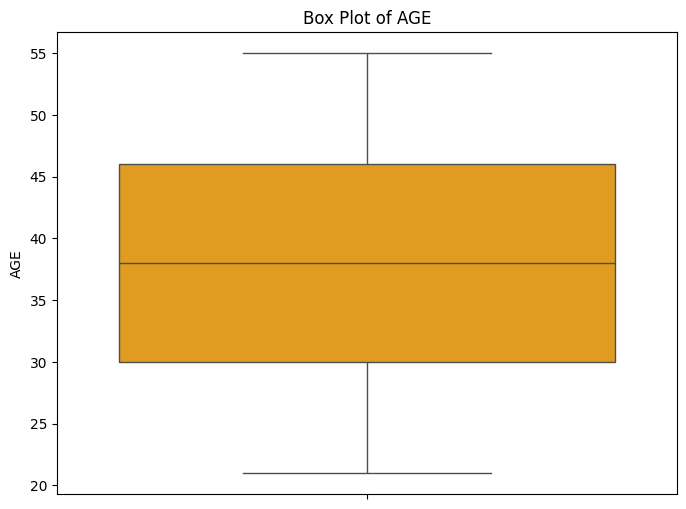

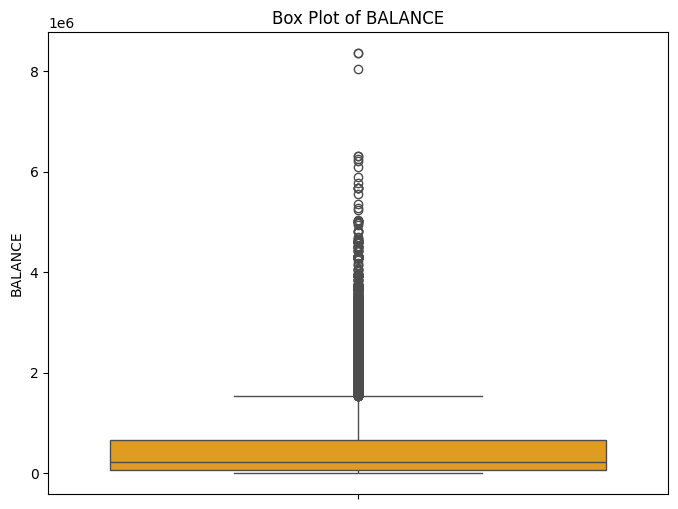

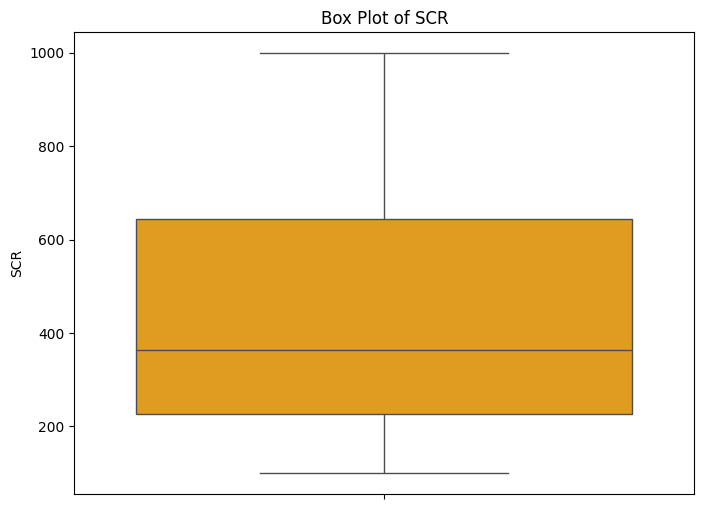

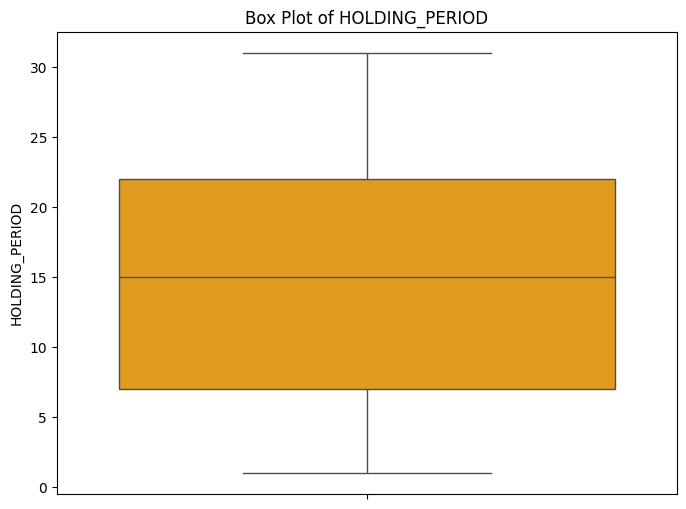

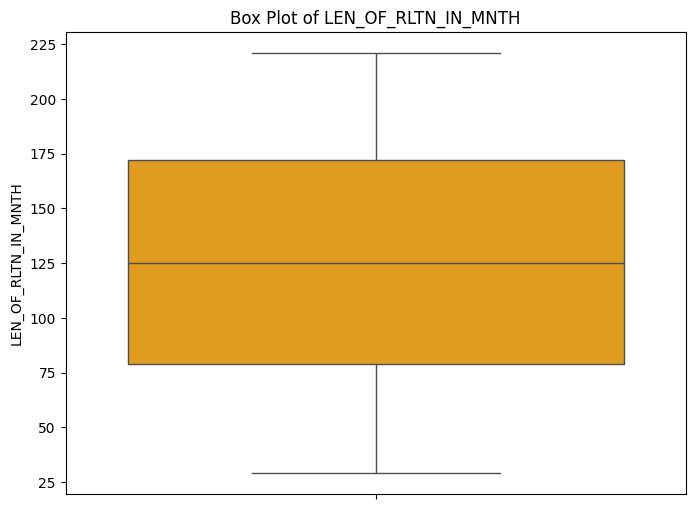

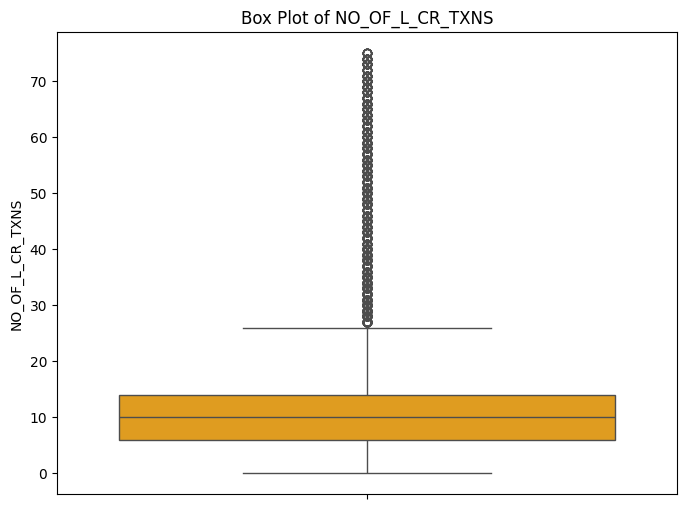

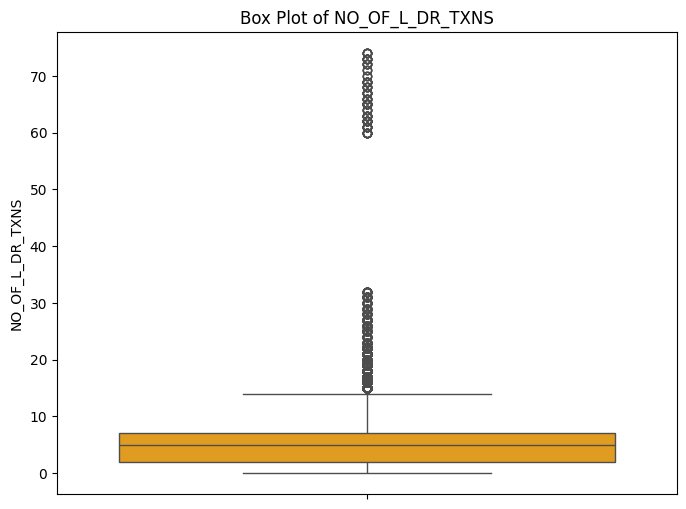

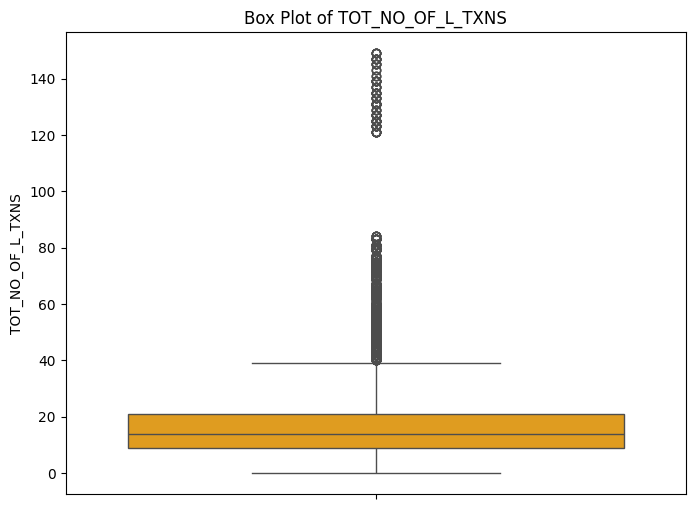

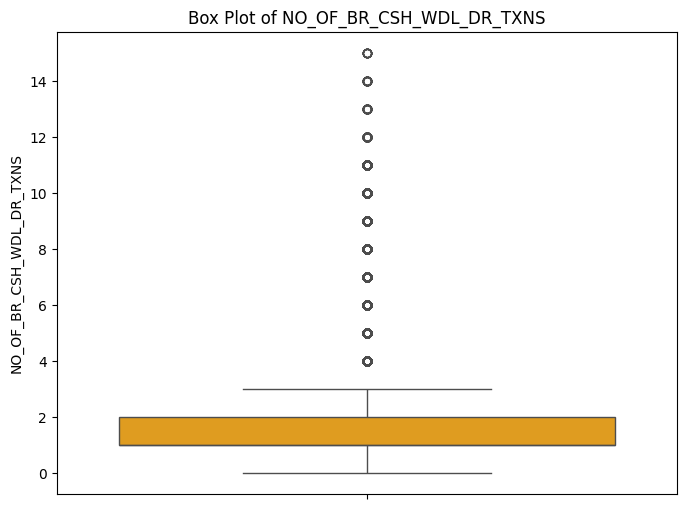

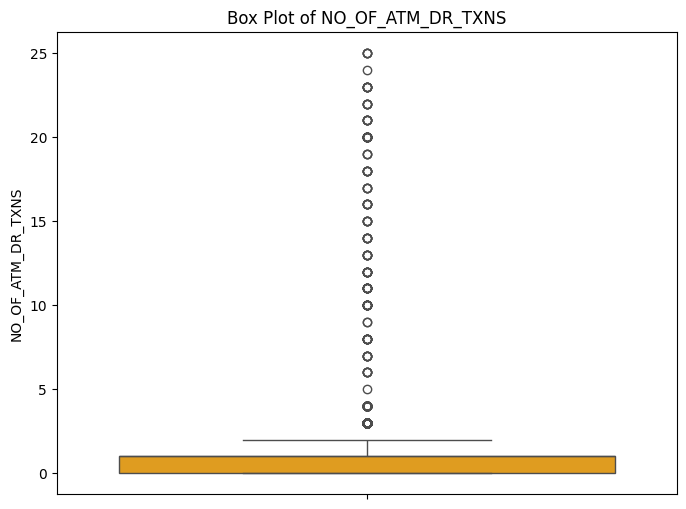

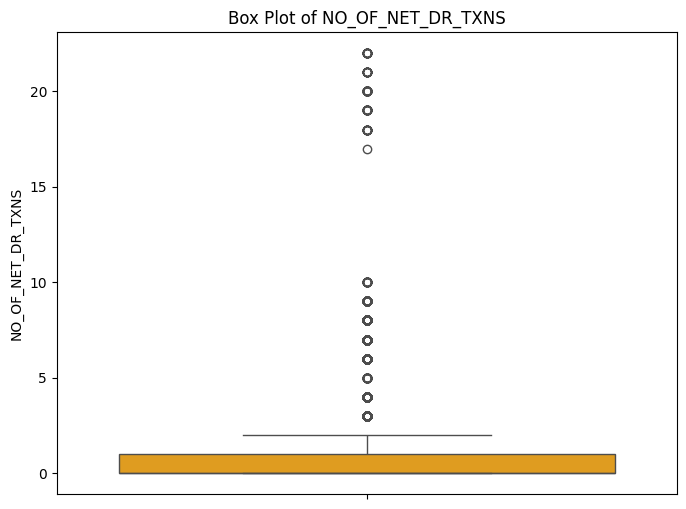

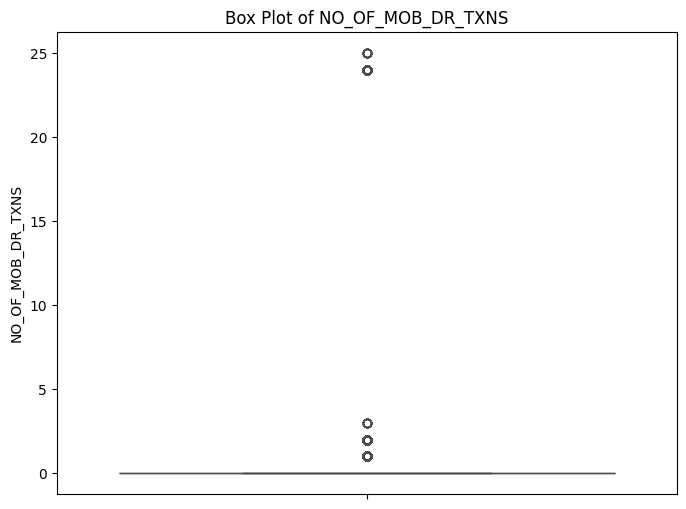

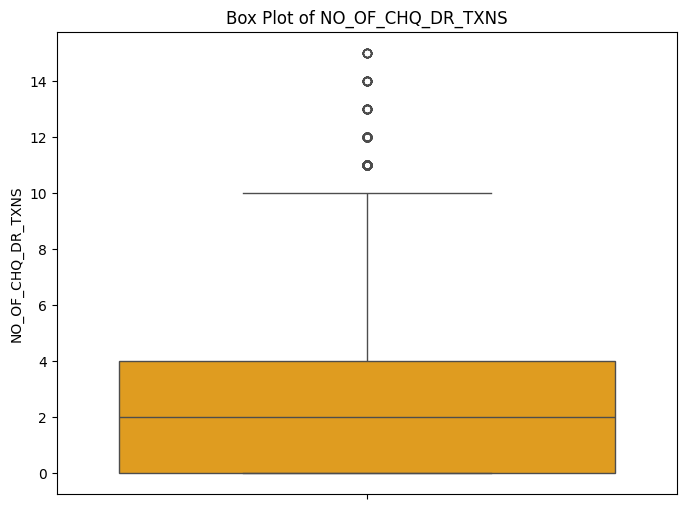

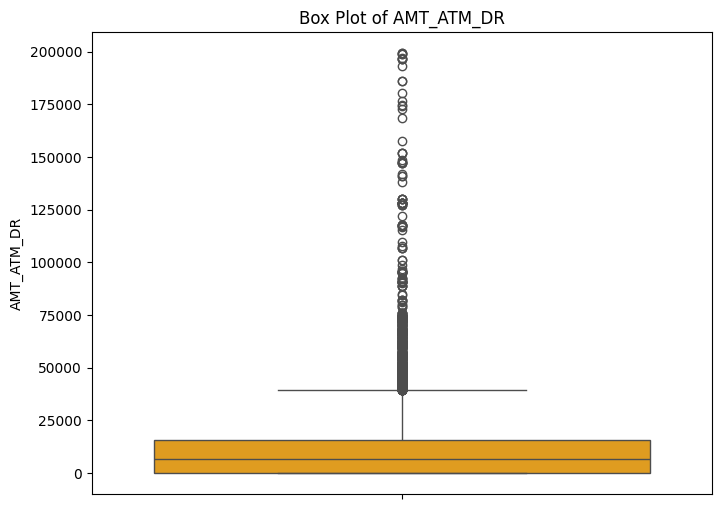

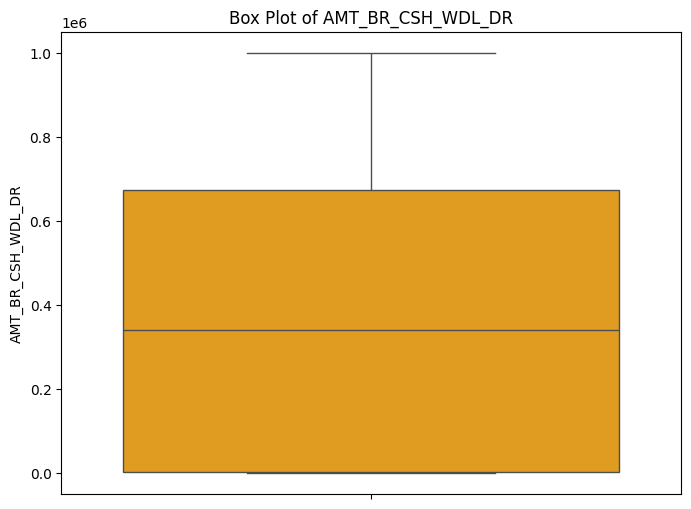

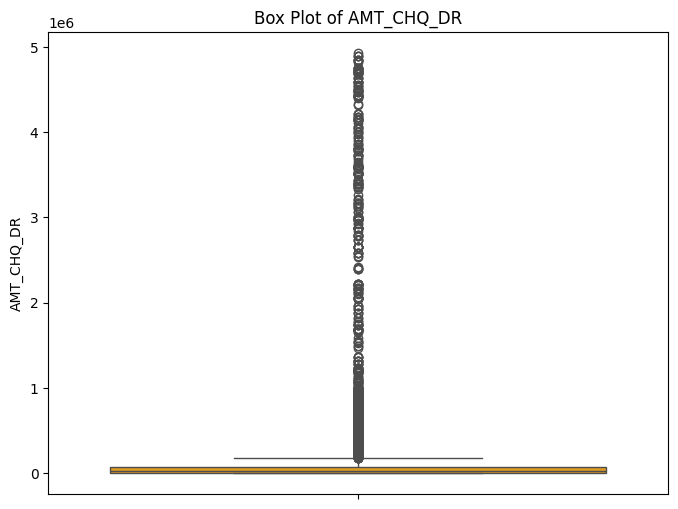

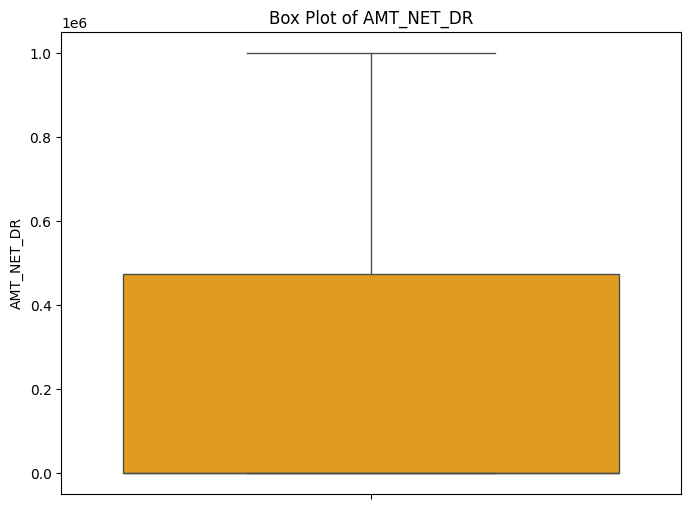

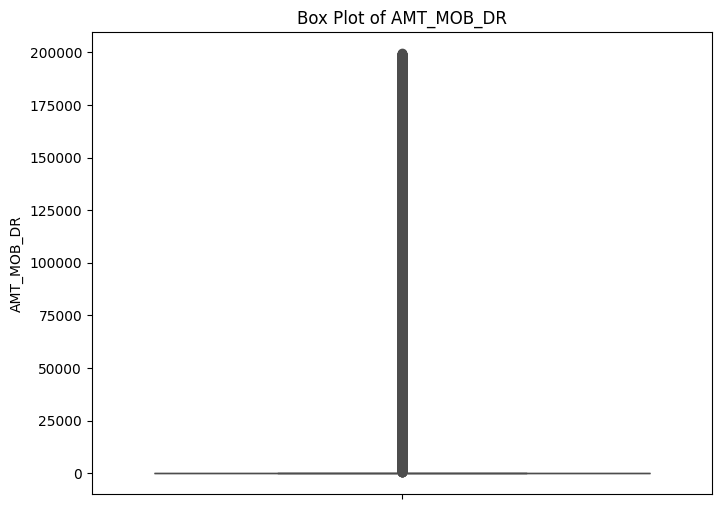

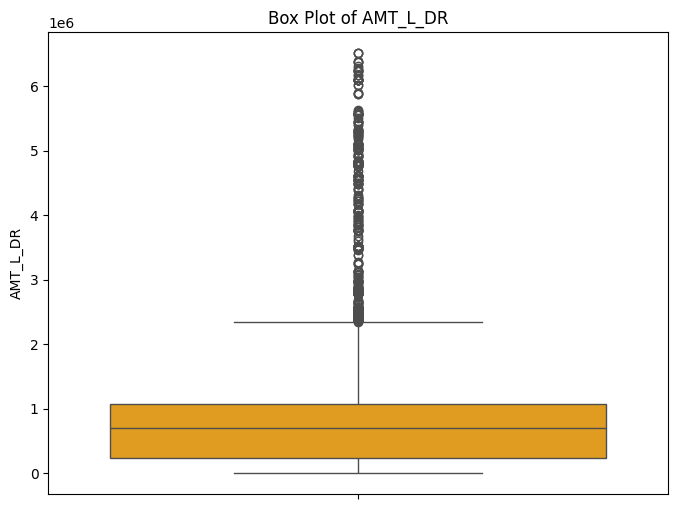

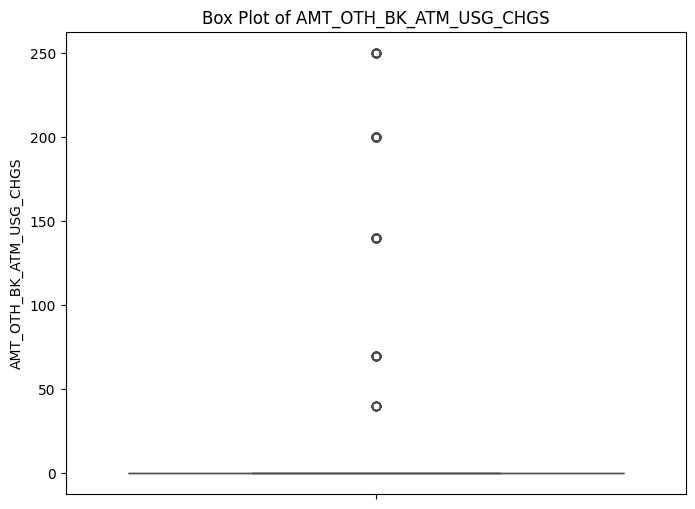

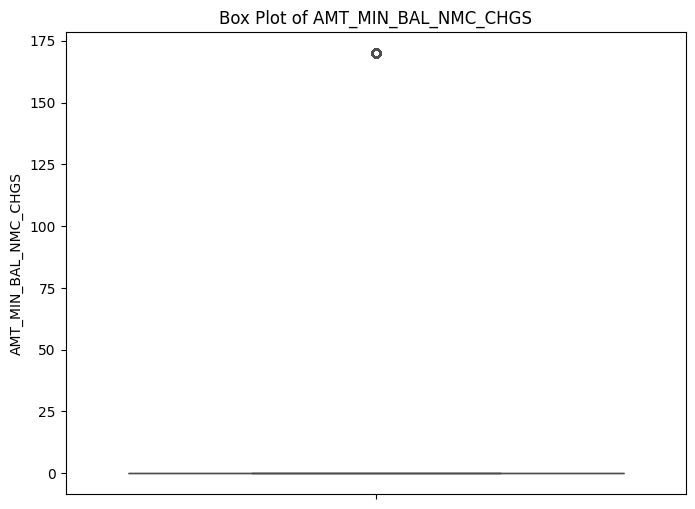

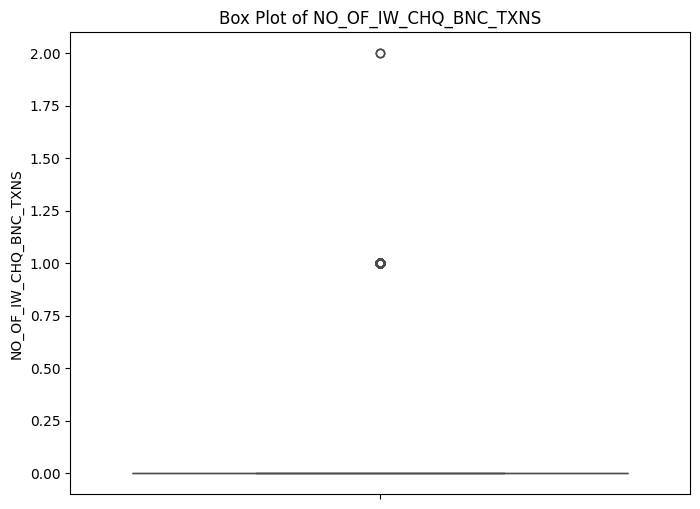

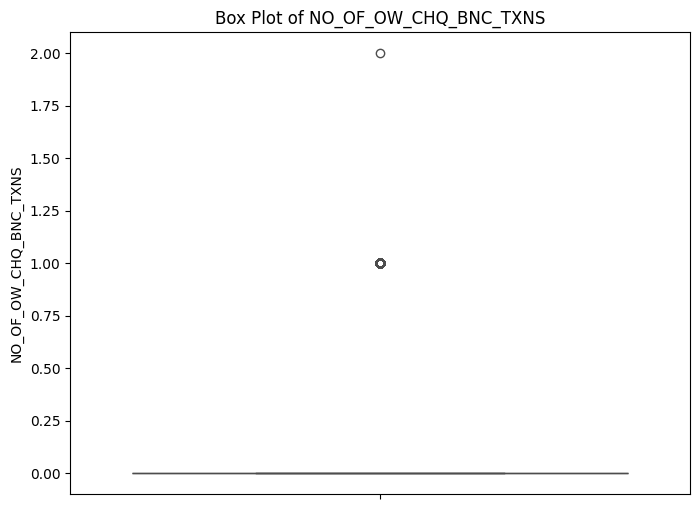

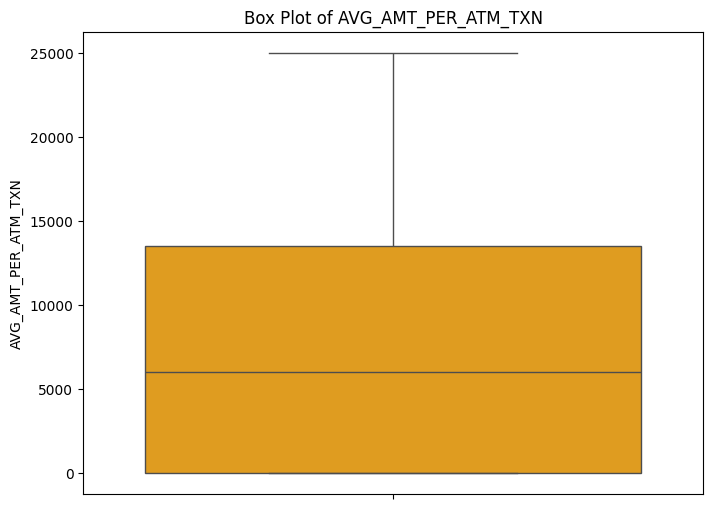

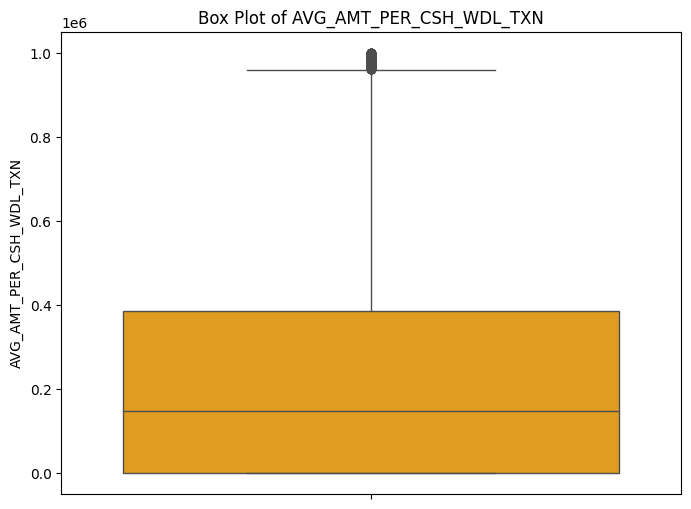

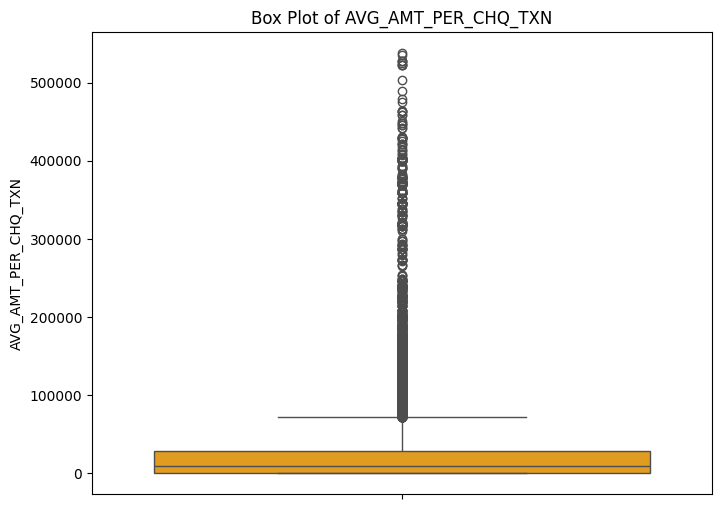

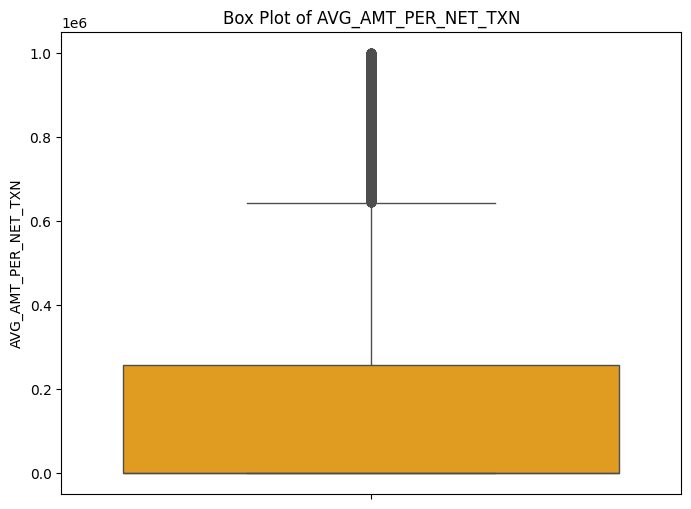

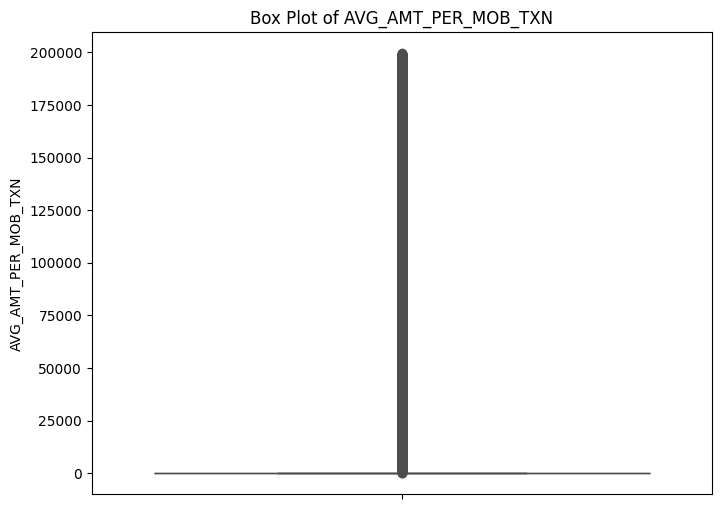

In [ ]:
# Plotting box plots for all numerical columns
for col in num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.85,0.9,0.99])

AGE       BALANCE           SCR  HOLDING_PERIOD  \
count  20000.000000  2.000000e+04  20000.000000    20000.000000   
mean      38.418150  5.113622e+05    440.150300       14.955650   
std        9.577985  7.235930e+05    249.887582        8.642634   
min       21.000000  0.000000e+00    100.000000        1.000000   
1%        21.000000  1.677630e+03    106.000000        1.000000   
5%        24.000000  8.930580e+03    133.000000        1.000000   
10%       26.000000  1.925977e+04    157.000000        3.000000   
25%       30.000000  6.475403e+04    227.000000        7.000000   
50%       38.000000  2.316758e+05    364.000000       15.000000   
75%       46.000000  6.538768e+05    644.000000       22.000000   
85%       51.000000  1.029219e+06    771.000000       25.000000   
90%       52.000000  1.408112e+06    833.000000       27.000000   
99%       55.000000  3.412760e+06    970.000000       31.000000   
max       55.000000  8.360431e+06    999.000000       31.000000   

       LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_L_DR_TXNS  \
count         20000.000000     20000.000000      20000.00000   
mean            125.239300        12.348050          6.63370   
std              54.953936        12.151921          7.67583   
min              29.000000         0.000000          0.00000   
1%               31.000000         0.000000          0.00000   
5%               39.000000         0.000000          1.00000   
10%              49.000000         2.000000          1.00000   
25%              79.000000         6.000000          2.00000   
50%             125.000000        10.000000          5.00000   
75%             172.000000        14.000000          7.00000   
85%             192.000000        19.000000         14.00000   
90%             202.000000        24.000000         15.00000   
99%             219.000000        64.000000         31.00000   
max             221.000000        75.000000         74.00000   

       TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  \
count       20000.00000              20000.000000       20000.000000   
mean           18.97540                  1.883000           1.028950   
std            17.75929                  2.263596           1.497239   
min             0.00000                  0.000000           0.000000   
1%              0.00000                  0.000000           0.000000   
5%              2.00000                  0.000000           0.000000   
10%             4.00000                  0.000000           0.000000   
25%             9.00000                  1.000000           0.000000   
50%            14.00000                  1.000000           1.000000   
75%            21.00000                  2.000000           1.000000   
85%            31.00000                  3.000000           2.000000   
90%            38.00000                  4.000000           2.000000   
99%            79.00000                 11.000000           4.000000   
max           149.00000                 15.000000          25.000000   

       NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS     AMT_ATM_DR  \
count       20000.000000       20000.000000       20000.000000   20000.000000   
mean            1.172450           0.411750           2.137550   10990.015000   
std             2.404246           2.009854           2.384893   15304.891499   
min             0.000000           0.000000           0.000000       0.000000   
1%              0.000000           0.000000           0.000000       0.000000   
5%              0.000000           0.000000           0.000000       0.000000   
10%             0.000000           0.000000           0.000000       0.000000   
25%             0.000000           0.000000           0.000000       0.000000   
50%             0.000000           0.000000           2.000000    6900.000000   
75%             1.000000           0.000000           4.000000   15800.000000   
85%             1.000000           1.000000           4.000000   19200.000000

## Capping and flooring of outliers

In [ ]:
def outlier_cap(x):
  x=x.clip(lower=x.quantile(0.01)) # defining threshold with quantile function
  x=x.clip(upper=x.quantile(0.99))
  return(x)

any value below 1% will get floored at 1% and any value higher than 99% will get capped at 99%

In [ ]:
num = num.apply(lambda x: outlier_cap(x))

In [ ]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.85,0.9,0.99])

AGE       BALANCE           SCR  HOLDING_PERIOD  \
count  20000.000000  2.000000e+04  20000.000000    20000.000000   
mean      38.418150  5.033852e+05    440.029350       14.955650   
std        9.577985  6.811763e+05    249.516357        8.642634   
min       21.000000  1.677630e+03    106.000000        1.000000   
1%        21.000000  1.677630e+03    106.000000        1.000000   
5%        24.000000  8.930580e+03    133.000000        1.000000   
10%       26.000000  1.925977e+04    157.000000        3.000000   
25%       30.000000  6.475403e+04    227.000000        7.000000   
50%       38.000000  2.316758e+05    364.000000       15.000000   
75%       46.000000  6.538768e+05    644.000000       22.000000   
85%       51.000000  1.029219e+06    771.000000       25.000000   
90%       52.000000  1.408112e+06    833.000000       27.000000   
99%       55.000000  3.412760e+06    970.000000       31.000000   
max       55.000000  3.412760e+06    970.000000       31.000000   

       LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_L_DR_TXNS  \
count         20000.000000     20000.000000     20000.000000   
mean            125.239250        12.298500         6.398000   
std              54.915204        11.924446         6.250292   
min              31.000000         0.000000         0.000000   
1%               31.000000         0.000000         0.000000   
5%               39.000000         0.000000         1.000000   
10%              49.000000         2.000000         1.000000   
25%              79.000000         6.000000         2.000000   
50%             125.000000        10.000000         5.000000   
75%             172.000000        14.000000         7.000000   
85%             192.000000        19.000000        14.000000   
90%             202.000000        24.000000        15.000000   
99%             219.000000        64.000000        31.000000   
max             219.000000        64.000000        31.000000   

       TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  \
count      20000.000000              20000.000000        20000.00000   
mean          18.606450                  1.870200            0.95085   
std           15.842327                  2.204744            0.83706   
min            0.000000                  0.000000            0.00000   
1%             0.000000                  0.000000            0.00000   
5%             2.000000                  0.000000            0.00000   
10%            4.000000                  0.000000            0.00000   
25%            9.000000                  1.000000            0.00000   
50%           14.000000                  1.000000            1.00000   
75%           21.000000                  2.000000            1.00000   
85%           31.000000                  3.000000            2.00000   
90%           38.000000                  4.000000            2.00000   
99%           79.000000                 11.000000            4.00000   
max           79.000000                 11.000000            4.00000   

       NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS    AMT_ATM_DR  \
count       20000.000000       20000.000000       20000.000000  20000.000000   
mean            1.097950           0.262800           2.127750  10681.070000   
std             1.949217           0.514246           2.343396  13296.760164   
min             0.000000           0.000000           0.000000      0.000000   
1%              0.000000           0.000000           0.000000      0.000000   
5%              0.000000           0.000000           0.000000      0.000000   
10%             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000      0.000000   
50%             0.000000           0.000000           2.000000   6900.000000   
75%             1.000000           0.000000           4.000000  15800.000000   
85%             1.000000           1.000000           4.000000  19200.000000   
90%     

## Missing Value Analysis

In [ ]:
num.isnull().mean()

AGE                         0.0
BALANCE                     0.0
SCR                         0.0
HOLDING_PERIOD              0.0
LEN_OF_RLTN_IN_MNTH         0.0
NO_OF_L_CR_TXNS             0.0
NO_OF_L_DR_TXNS             0.0
TOT_NO_OF_L_TXNS            0.0
NO_OF_BR_CSH_WDL_DR_TXNS    0.0
NO_OF_ATM_DR_TXNS           0.0
NO_OF_NET_DR_TXNS           0.0
NO_OF_MOB_DR_TXNS           0.0
NO_OF_CHQ_DR_TXNS           0.0
AMT_ATM_DR                  0.0
AMT_BR_CSH_WDL_DR           0.0
AMT_CHQ_DR                  0.0
AMT_NET_DR                  0.0
AMT_MOB_DR                  0.0
AMT_L_DR                    0.0
AMT_OTH_BK_ATM_USG_CHGS     0.0
AMT_MIN_BAL_NMC_CHGS        0.0
NO_OF_IW_CHQ_BNC_TXNS       0.0
NO_OF_OW_CHQ_BNC_TXNS       0.0
AVG_AMT_PER_ATM_TXN         0.0
AVG_AMT_PER_CSH_WDL_TXN     0.0
AVG_AMT_PER_CHQ_TXN         0.0
AVG_AMT_PER_NET_TXN         0.0
AVG_AMT_PER_MOB_TXN         0.0
dtype: float64

Since the data does not contain any missing values Imputation processes are not required

## Feature Selection - Numerical

#### Part 1 : Remove features with zero variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num)

# Get columns indices to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [ ]:
num_1.iloc[0]

AGE                             27.00
BALANCE                       3383.75
SCR                            776.00
HOLDING_PERIOD                  30.00
LEN_OF_RLTN_IN_MNTH            146.00
NO_OF_L_CR_TXNS                  7.00
NO_OF_L_DR_TXNS                  3.00
TOT_NO_OF_L_TXNS                10.00
NO_OF_BR_CSH_WDL_DR_TXNS         0.00
NO_OF_ATM_DR_TXNS                1.00
NO_OF_NET_DR_TXNS                2.00
NO_OF_MOB_DR_TXNS                0.00
NO_OF_CHQ_DR_TXNS                0.00
AMT_ATM_DR                   13100.00
AMT_BR_CSH_WDL_DR                0.00
AMT_CHQ_DR                       0.00
AMT_NET_DR                  973557.00
AMT_MOB_DR                       0.00
AMT_L_DR                    986657.00
NO_OF_IW_CHQ_BNC_TXNS            0.00
NO_OF_OW_CHQ_BNC_TXNS            0.00
AVG_AMT_PER_ATM_TXN          13100.00
AVG_AMT_PER_CSH_WDL_TXN          0.00
AVG_AMT_PER_CHQ_TXN              0.00
AVG_AMT_PER_NET_TXN         486778.50
AVG_AMT_PER_MOB_TXN              0.00
Name: 0, dtype: float64

A feature having zero variance won't help in prediction. As we cannot distinguish customer A and Cust B using the same feature

for a regression problem we take the same approach. If a variable doesnt have any variation in itself it wont be able to explain the variance in the dependent variable

In [ ]:
num_1.shape

(20000, 26)

### Part 2- Bi Variate Analysis (Feature Discretization)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index,columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

AGE_Rank  BALANCE_Rank  SCR_Rank  HOLDING_PERIOD_Rank  \
0       1.0           0.0       8.0                  9.0   
1       7.0           5.0       4.0                  9.0   
2       5.0           0.0       7.0                  0.0   
3       9.0           2.0       1.0                  4.0   
4       4.0           9.0       1.0                  8.0   

   LEN_OF_RLTN_IN_MNTH_Rank  NO_OF_L_CR_TXNS_Rank  NO_OF_L_DR_TXNS_Rank  \
0                       6.0                   4.0                   3.0   
1                       3.0                   4.0                   2.0   
2                       1.0                   5.0                   5.0   
3                       4.0                   9.0                   7.0   
4                       8.0                   8.0                   1.0   

   TOT_NO_OF_L_TXNS_Rank  NO_OF_BR_CSH_WDL_DR_TXNS_Rank  \
0                    3.0                            0.0   
1                    3.0                            0.0   
2                    5.0                            1.0   
3                    9.0                            4.0   
4                    7.0                            1.0   

   NO_OF_ATM_DR_TXNS_Rank  NO_OF_NET_DR_TXNS_Rank  NO_OF_MOB_DR_TXNS_Rank  \
0                     1.0                     1.0                     0.0   
1                     1.0                     1.0                     0.0   
2                     1.0                     1.0                     0.0   
3                     2.0                     1.0                     1.0   
4                     0.0                     0.0                     0.0   

   NO_OF_CHQ_DR_TXNS_Rank  AMT_ATM_DR_Rank  AMT_BR_CSH_WDL_DR_Rank  \
0                     0.0              3.0                     0.0   
1                     0.0              1.0                     0.0   
2                     2.0              3.0                     4.0   
3                     4.0              5.0                     5.0   
4                     0.0              0.0                     6.0   

   AMT_CHQ_DR_Rank  AMT_NET_DR_Rank  AMT_MOB_DR_Rank  AMT_L_DR_Rank  \
0              0.0              4.0              0.0            7.0   
1              0.0              4.0              0.0            5.0   
2              2.0              4.0              0.0            9.0   
3              2.0              3.0              1.0            9.0   
4              0.0              0.0              0.0            5.0   

   NO_OF_IW_CHQ_BNC_TXNS_Rank  NO_OF_OW_CHQ_BNC_TXNS_Rank  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   AVG_AMT_PER_ATM_TXN_Rank  AVG_AMT_PER_CSH_WDL_TXN_Rank  \
0                       4.0                           0.0   
1                       2.0                           0.0   
2                       3.0                           6.0   
3                       4.0                           3.0   
4                       0.0                           7.0   

   AVG_AMT_PER_CHQ_TXN_Rank  AVG_AMT_PER_NET_TXN_Rank  \
0                       0.0                       3.0   
1                       0.0                       4.0   
2                       3.0                       4.0   
3                       1.0                       2.0   
4                       0.0                       0.0   

   AVG_AMT_PER_MOB_TXN_Rank  
0                       0.0  
1                       0.0  
2                       0.0  
3                       1.0  
4                       0.0

Next we're checking how does the event rate vary across these groups

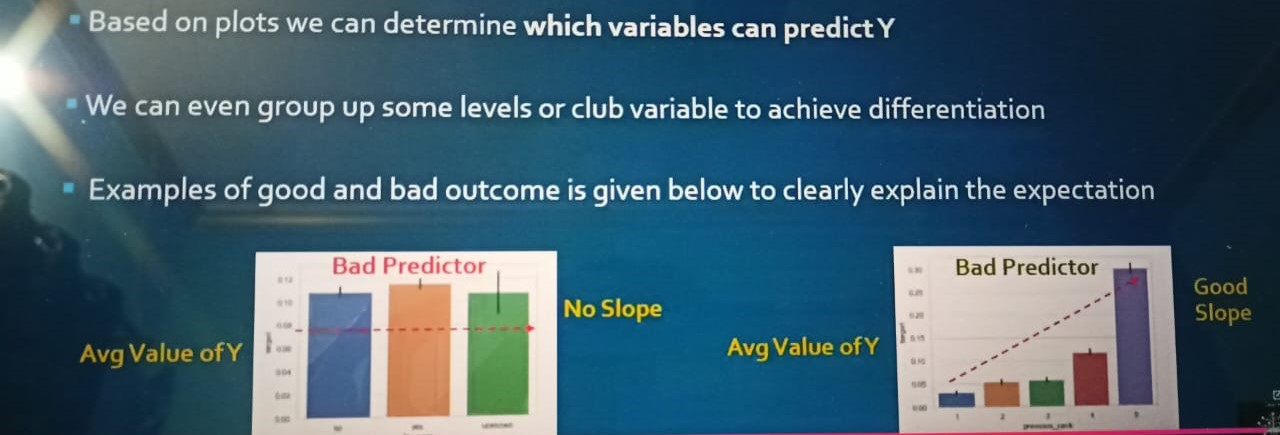

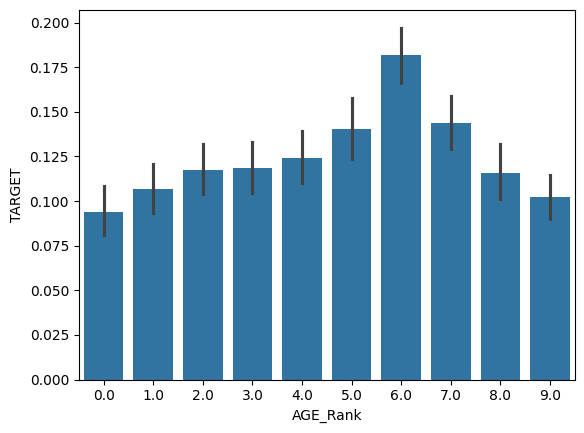

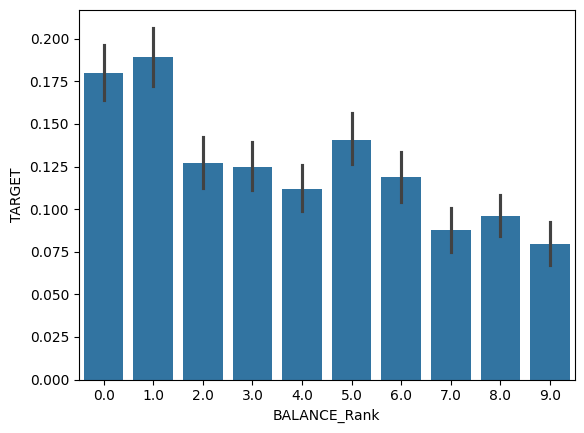

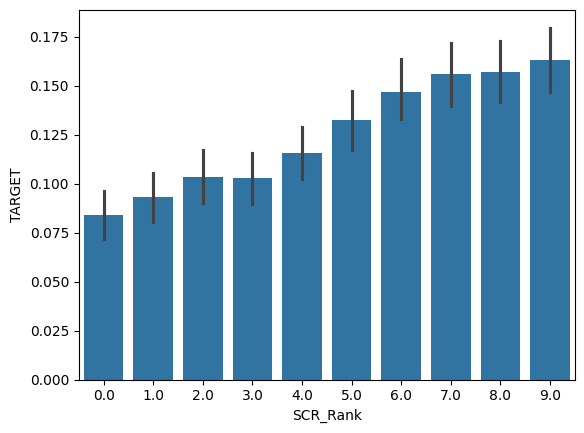

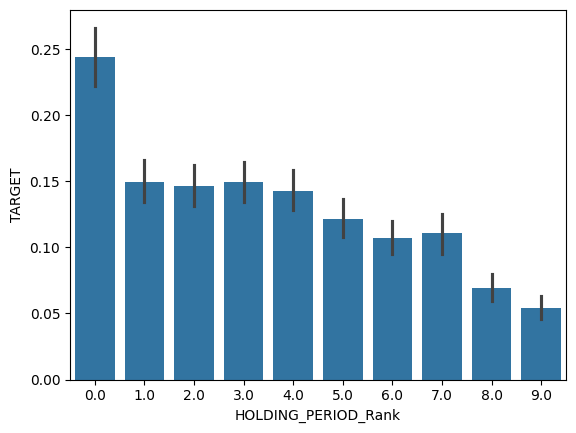

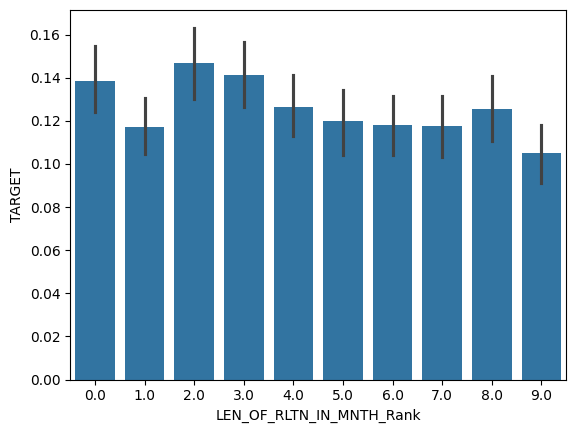

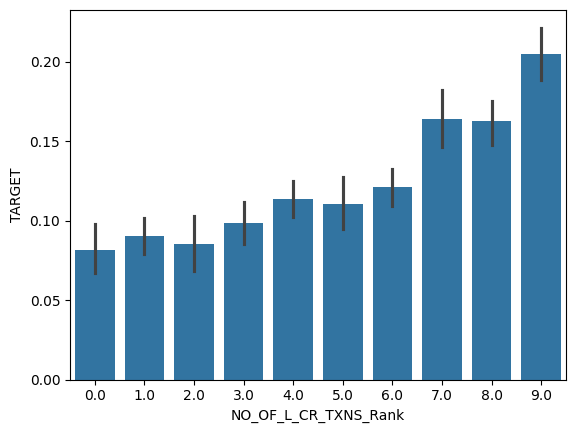

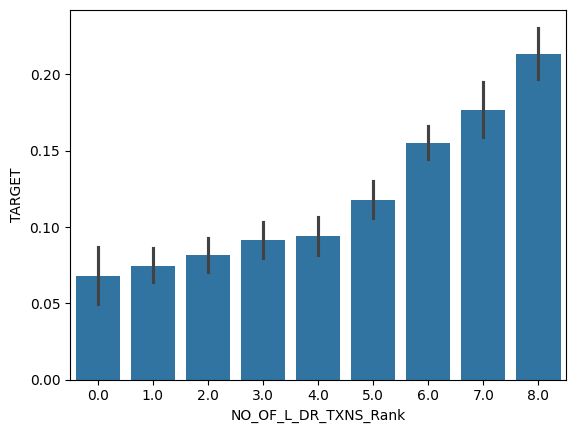

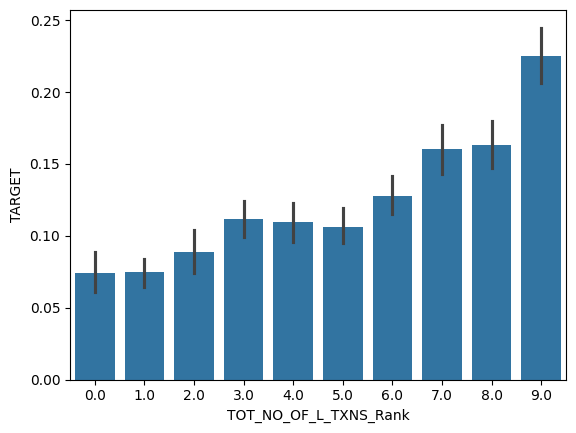

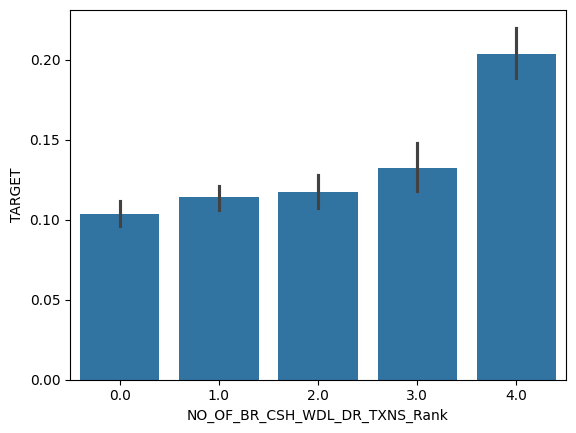

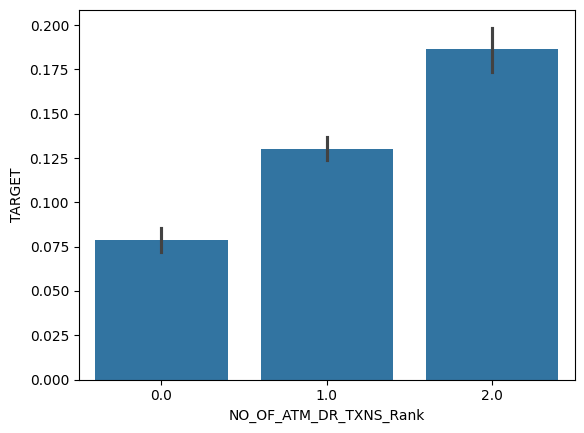

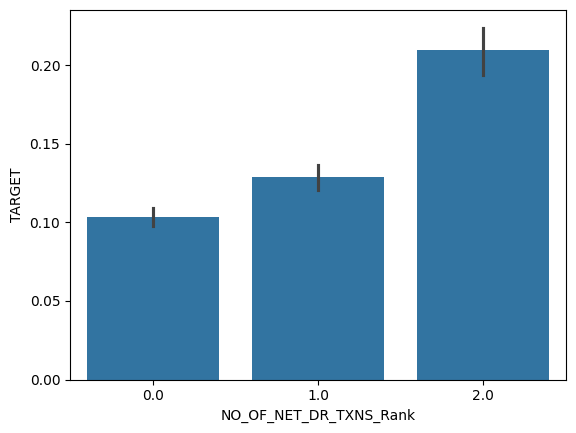

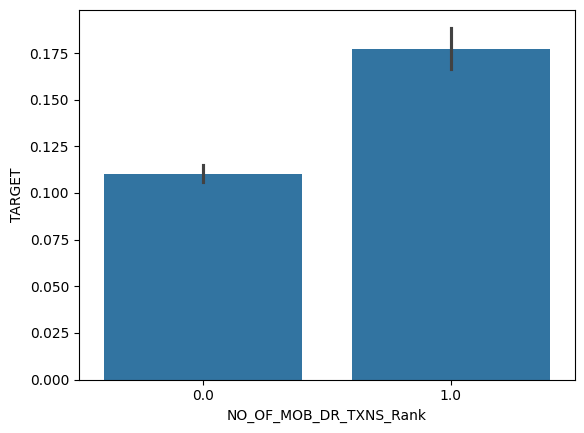

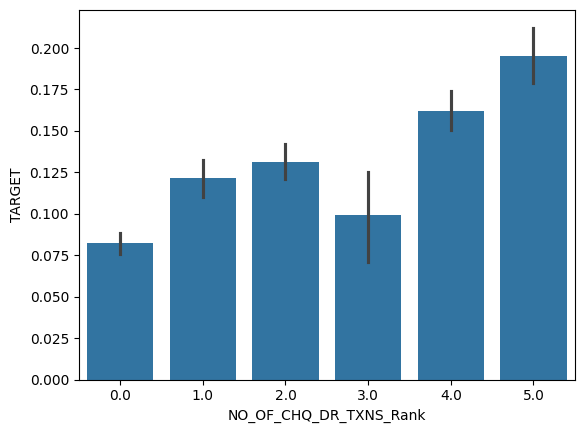

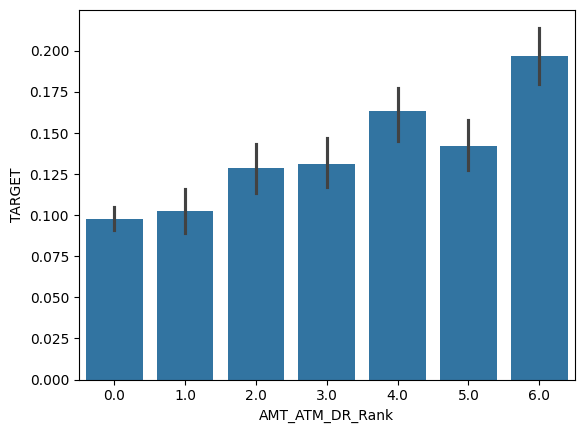

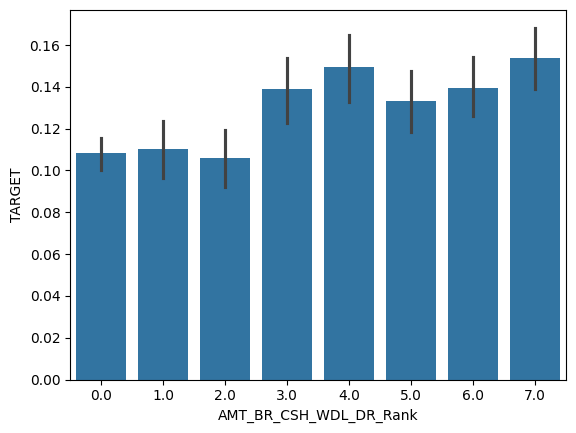

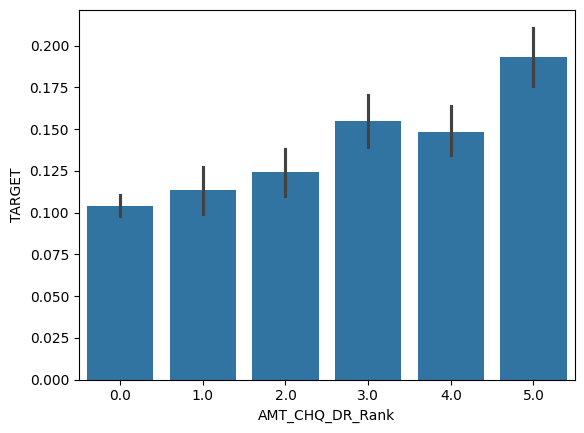

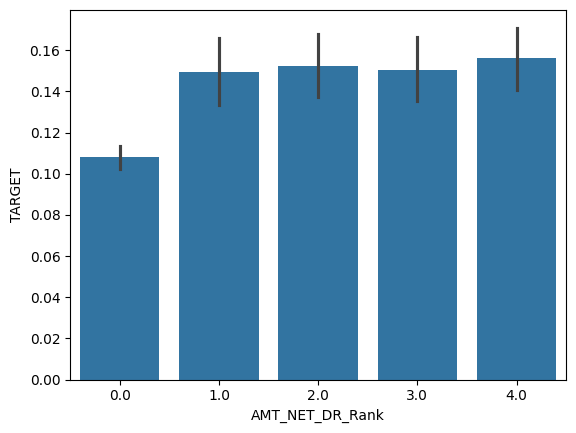

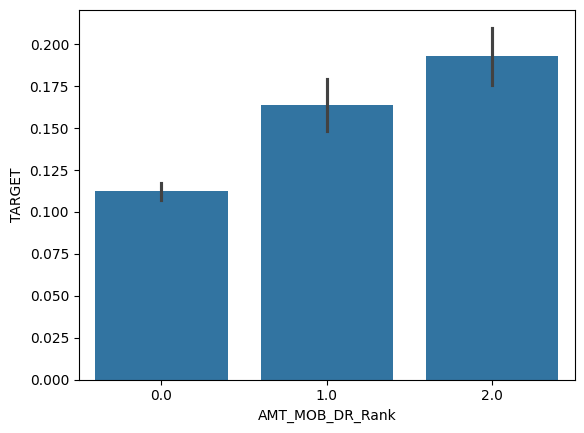

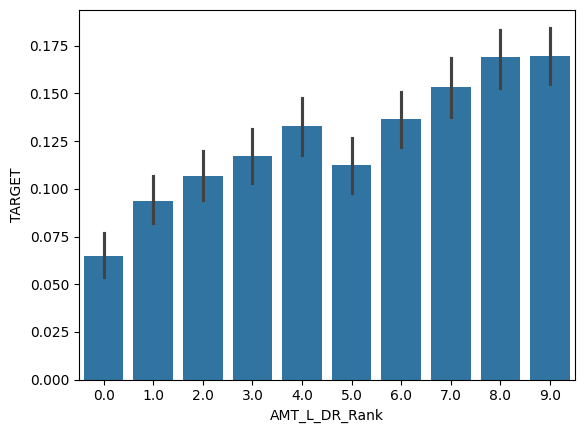

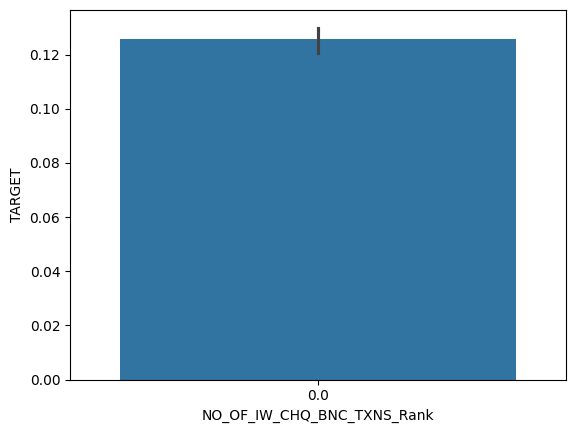

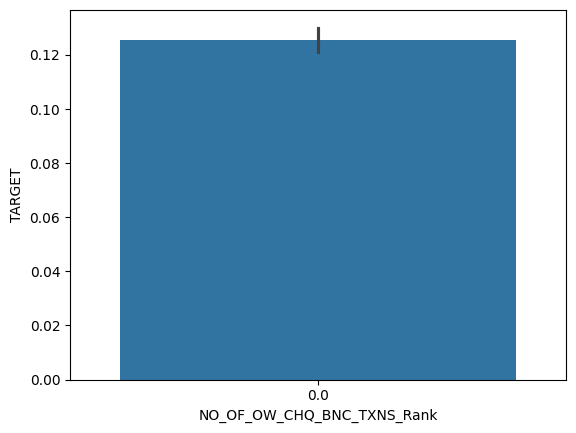

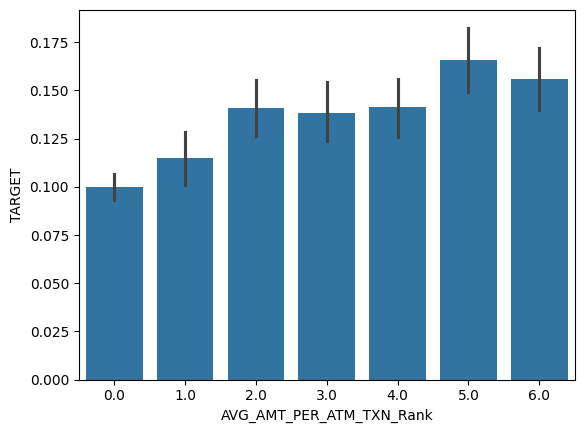

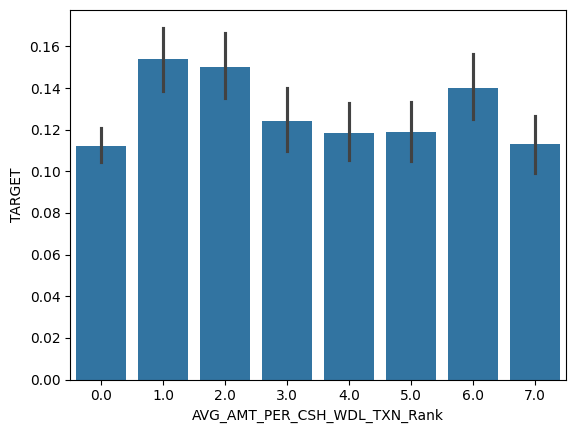

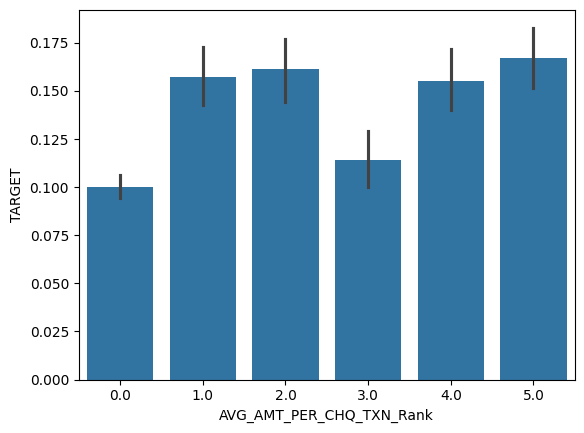

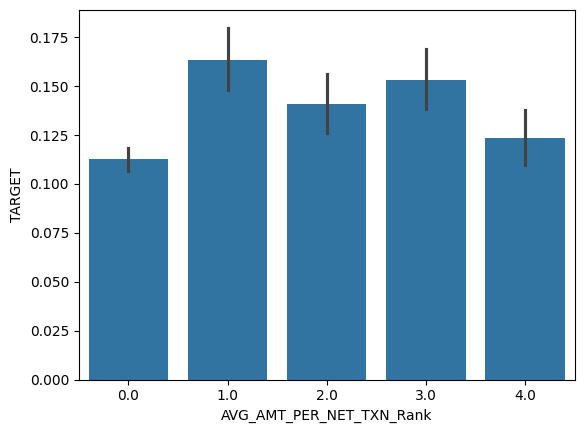

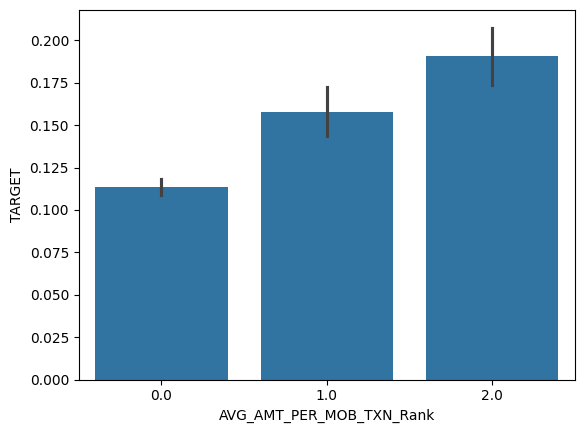

In [ ]:
# Check if the features show slope at all
# If they do, then do you see declines below the population average and some higher than population average (12.5%)
# Conclusion : A strong slope is indicative of features ability to discriminate event from non event making it a good predictor

X_bin_combined = pd.concat([Y,num_binned,ind],axis=1,join='inner')

from numpy import mean
for col in num_binned.columns:
  plt.figure()
  sns.barplot(data=X_bin_combined,x=col,y='TARGET',estimator=mean)
plt.show()

The next output might be subjective

In [ ]:
num_varlist = ['AVG_AMT_PER_NET_TXN','AVG_AMT_PER_CHQ_TXN','AVG_AMT_PER_CSH_WDL_TXN','NO_OF_CHQ_DR_TXNS','AMT_NET_DR','AMT_BR_CSH_WDL_DR','AGE']
num_1 = num_1.drop(columns=num_varlist,axis=1)

In [ ]:
num_1.shape

(20000, 19)

### Part 3- Select K best

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=17)
selector.fit_transform(num_1,Y)

# Get columns indices to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num.iloc[:,cols]

In [ ]:
select_features_df_num.iloc[0].sort_values()

NO_OF_BR_CSH_WDL_DR_TXNS         0.00
AMT_BR_CSH_WDL_DR                0.00
NO_OF_CHQ_DR_TXNS                0.00
NO_OF_MOB_DR_TXNS                0.00
AMT_MOB_DR                       0.00
NO_OF_ATM_DR_TXNS                1.00
NO_OF_NET_DR_TXNS                2.00
NO_OF_L_DR_TXNS                  3.00
NO_OF_L_CR_TXNS                  7.00
TOT_NO_OF_L_TXNS                10.00
AGE                             27.00
HOLDING_PERIOD                  30.00
LEN_OF_RLTN_IN_MNTH            146.00
SCR                            776.00
BALANCE                       3383.75
AMT_ATM_DR                   13100.00
AMT_L_DR                    986657.00
Name: 0, dtype: float64

## Feature Selection - Categorical Features

In [ ]:
char.dtypes

GENDER        object
OCCUPATION    object
AGE_BKT       object
ACC_TYPE      object
dtype: object

#### Part 1- Bivariate analysis

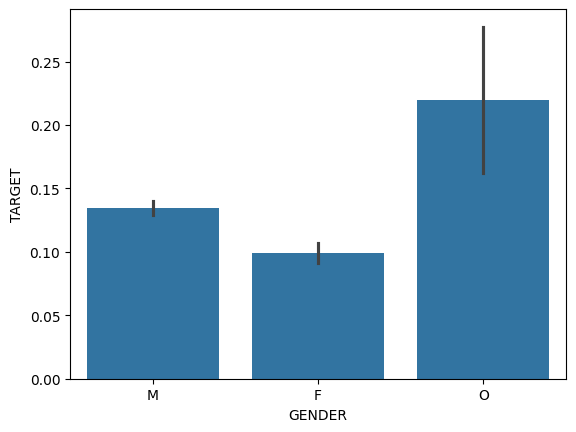

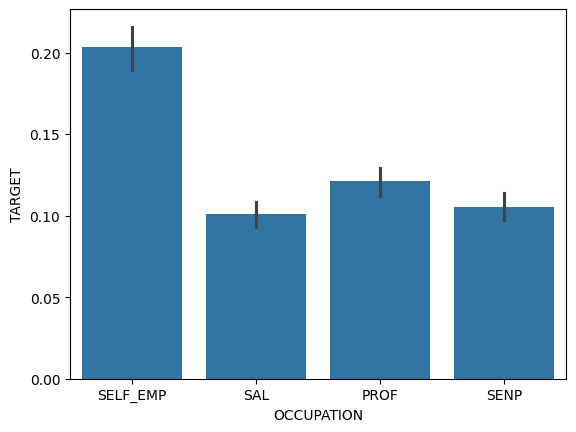

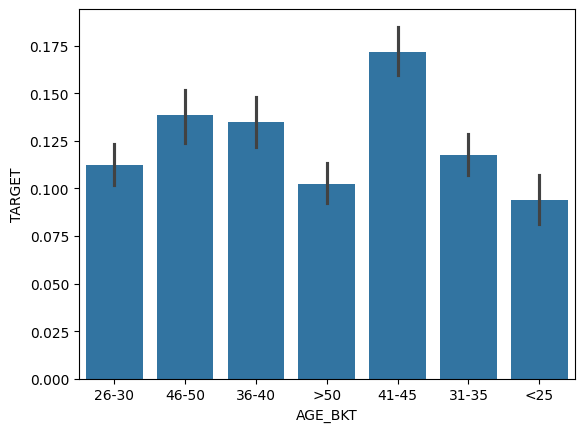

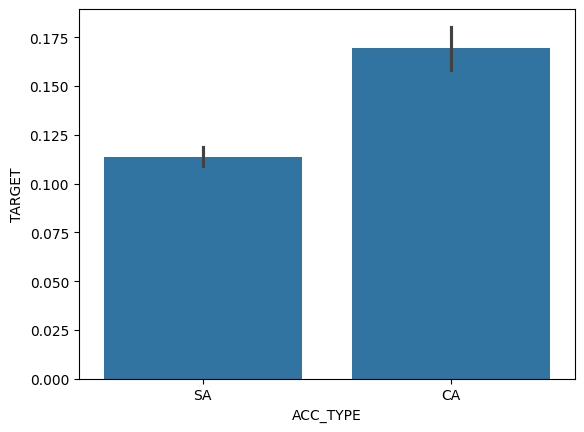

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X_char_merged = pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in char.columns:
  plt.figure()
  sns.barplot(data=X_char_merged,x=col,y='TARGET',estimator=mean)
plt.show()

In [ ]:
char = char.drop(['AGE_BKT'],axis=1)

In [ ]:
# Check unique values in the gender column
print(char['GENDER'].unique())

['M' 'F' 'O']


In [ ]:
#Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char,drop_first=True)
X_char_dum.shape

(20000, 6)

In [ ]:
X_char_dum

GENDER_M  GENDER_O  OCCUPATION_SAL  OCCUPATION_SELF_EMP  \
0          True     False           False                 True   
1          True     False            True                False   
2          True     False           False                 True   
3          True     False            True                False   
4          True     False           False                False   
...         ...       ...             ...                  ...   
19995     False     False           False                False   
19996     False     False           False                 True   
19997      True     False           False                False   
19998      True     False            True                False   
19999      True     False           False                 True   

       OCCUPATION_SENP  ACC_TYPE_SA  
0                False         True  
1                False         True  
2                False         True  
3                False        False  
4                False         True  
...                ...          ...  
19995             True         True  
19996            False         True  
19997            False         True  
19998            False         True  
19999            False         True  

[20000 rows x 6 columns]

#### Part 2 - Select K Best

In [ ]:
# select k best for categorical features
selector = SelectKBest(chi2,k=5)
selector.fit_transform(X_char_dum,Y)

# Get columns indices to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [ ]:
select_features_df_char.iloc[0].sort_values()

GENDER_O               False
OCCUPATION_SAL         False
OCCUPATION_SENP        False
OCCUPATION_SELF_EMP     True
ACC_TYPE_SA             True
Name: 0, dtype: bool

## Feature Selection - Numerical Indicator Features

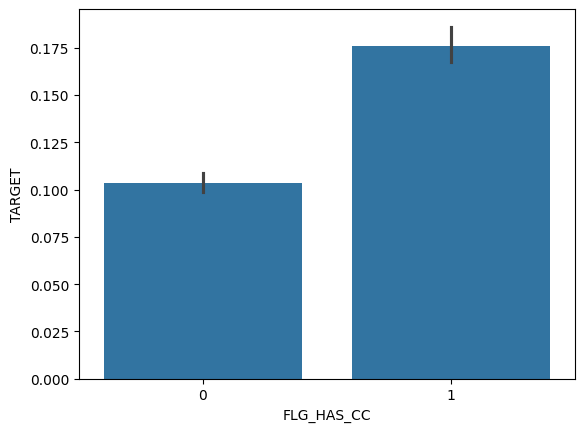

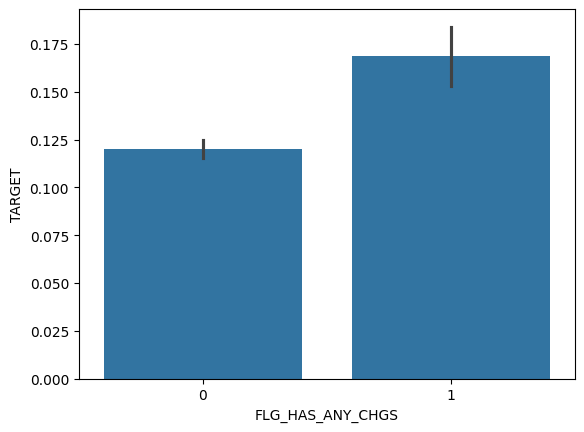

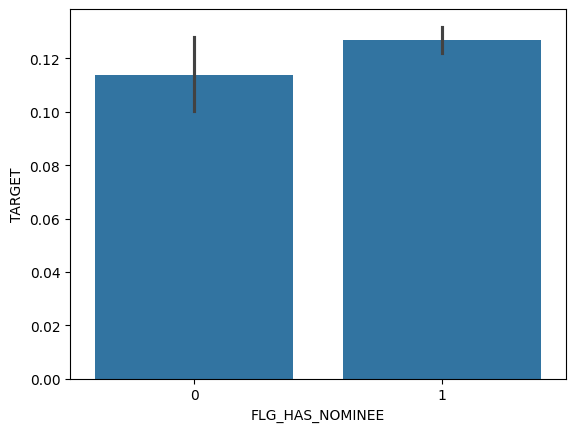

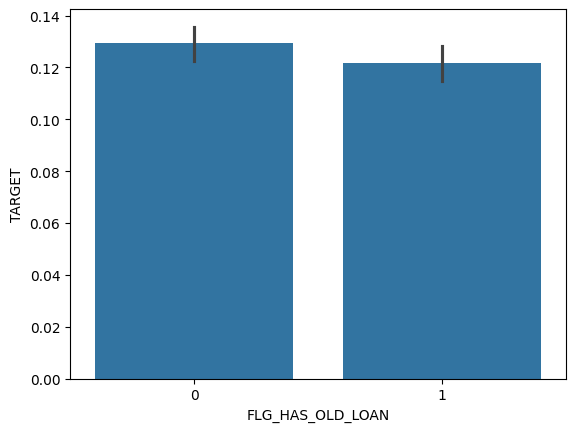

In [ ]:
X_ind_merged = pd.concat([Y,ind],axis=1,join='inner')

from numpy import mean
for col in ind.columns:
  plt.figure()
  sns.barplot(data=X_ind_merged,x=col,y='TARGET',estimator=mean)
plt.show()

In [ ]:
select_features_df_ind = ind.drop(['FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN'],axis=1)

### Creating the master feature set for model development

In [ ]:
X_all = pd.concat([select_features_df_num,select_features_df_char,select_features_df_ind],axis=1,join='inner')

In [ ]:
select_features_df_num.head()

AGE     BALANCE  SCR  HOLDING_PERIOD  LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  \
0   27     3383.75  776              30                  146                7   
1   47   287489.04  324              28                  104                8   
2   40    18216.88  603               2                   61               10   
3   53    71720.48  196              13                  107               36   
4   36  1671622.89  167              24                  185               20   

   NO_OF_L_DR_TXNS  TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  \
0                3                10                         0   
1                2                10                         0   
2                5                15                         1   
3               14                50                         4   
4                1                21                         1   

   NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS  \
0                  1                  2                  0                  0   
1                  1                  1                  0                  0   
2                  1                  1                  0                  2   
3                  2                  3                  1                  4   
4                  0                  0                  0                  0   

   AMT_ATM_DR  AMT_BR_CSH_WDL_DR  AMT_MOB_DR   AMT_L_DR  
0       13100                  0           0   986657.0  
1        6600                  0           0   806413.0  
2       11200             561120           0  1619210.0  
3       26100             673590       71388  1573364.0  
4           0             808480           0   808480.0

In [ ]:
select_features_df_char.head()

GENDER_O  OCCUPATION_SAL  OCCUPATION_SELF_EMP  OCCUPATION_SENP  ACC_TYPE_SA
0     False           False                 True            False         True
1     False            True                False            False         True
2     False           False                 True            False         True
3     False            True                False            False        False
4     False           False                False            False         True

In [ ]:
select_features_df_ind.head()

FLG_HAS_CC  FLG_HAS_ANY_CHGS
0           0                 0
1           0                 1
2           0                 1
3           0                 0
4           0                 0

In [ ]:
X_all.head()

AGE     BALANCE  SCR  HOLDING_PERIOD  LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  \
0   27     3383.75  776              30                  146                7   
1   47   287489.04  324              28                  104                8   
2   40    18216.88  603               2                   61               10   
3   53    71720.48  196              13                  107               36   
4   36  1671622.89  167              24                  185               20   

   NO_OF_L_DR_TXNS  TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  \
0                3                10                         0   
1                2                10                         0   
2                5                15                         1   
3               14                50                         4   
4                1                21                         1   

   NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS  \
0                  1                  2                  0                  0   
1                  1                  1                  0                  0   
2                  1                  1                  0                  2   
3                  2                  3                  1                  4   
4                  0                  0                  0                  0   

   AMT_ATM_DR  AMT_BR_CSH_WDL_DR  AMT_MOB_DR   AMT_L_DR  GENDER_O  \
0       13100                  0           0   986657.0     False   
1        6600                  0           0   806413.0     False   
2       11200             561120           0  1619210.0     False   
3       26100             673590       71388  1573364.0     False   
4           0             808480           0   808480.0     False   

   OCCUPATION_SAL  OCCUPATION_SELF_EMP  OCCUPATION_SENP  ACC_TYPE_SA  \
0           False                 True            False         True   
1            True                False            False         True   
2           False                 True            False         True   
3            True                False            False        False   
4           False                False            False         True   

   FLG_HAS_CC  FLG_HAS_ANY_CHGS  
0           0                 0  
1           0                 1  
2           0                 1  
3           0                 0  
4           0                 0

In [ ]:
X_all.shape

(20000, 24)

In [ ]:
Y.shape

(20000, 1)

In [ ]:
Y['TARGET'].value_counts()

TARGET
0    17488
1     2512
Name: count, dtype: int64

# ADASYN

ADASYN (Adaptive Synthetic Sampling) is a method for generating synthetic data points to balance class distributions, particularly in imbalanced classification problems.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [ ]:
# Apply ADASYN to balance the classes
adasyn = ADASYN(sampling_strategy='minority', n_neighbors=5, random_state=42)
X_res, y_res = adasyn.fit_resample(X_all, Y)

# Display the new class distribution
print("Original class distribution:", Counter(Y))
print("New class distribution after ADASYN:", Counter(y_res))

Original class distribution: Counter({'TARGET': 1})
New class distribution after ADASYN: Counter({'TARGET': 1})


In [ ]:
y_res.shape

(34812, 1)

In [ ]:
y_res.value_counts()

TARGET
0         17488
1         17324
Name: count, dtype: int64

In [ ]:
X_res.shape

(34812, 24)

In [ ]:
X_res.columns

Index(['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH',
       'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS',
       'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
       'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR',
       'AMT_BR_CSH_WDL_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'GENDER_M', 'GENDER_O',
       'OCCUPATION_SAL', 'OCCUPATION_SELF_EMP', 'OCCUPATION_SENP',
       'ACC_TYPE_SA', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS'],
      dtype='object')

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_res)

# Clustering Analysis

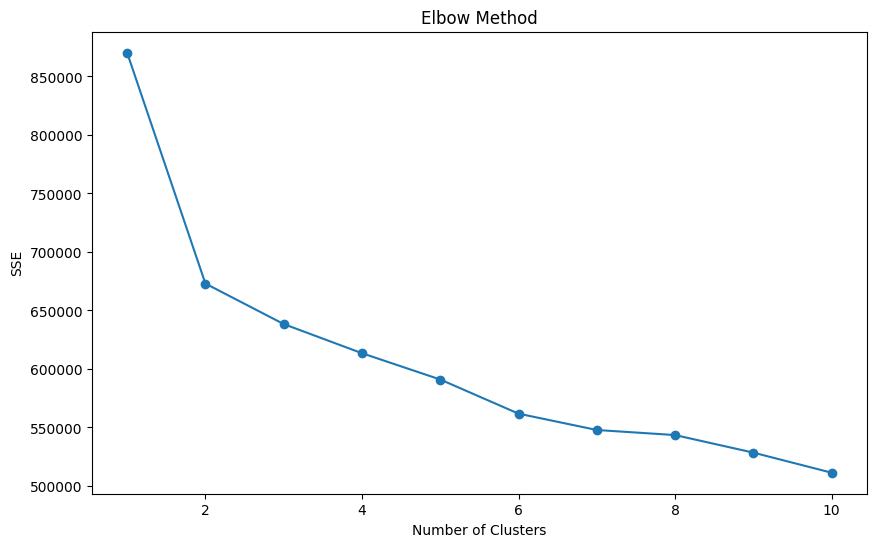

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

The elbow method plot indicates that the optimal number of clusters is at the "elbow point," where the rate of decrease in the Sum of Squared Errors (SSE) starts to level off.


The sharp decline in SSE is noticeable between 1 and 3 clusters.
After 3 clusters, the reduction in SSE becomes more gradual, suggesting diminishing returns with additional clusters.

Therefore using 3 clusters strikes a good balance between minimizing SSE and avoiding overfitting.

In [ ]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(scaled_data)

# Add cluster labels to the original data
X_res['Cluster'] = kmeans.labels_

# Visualization of Customer Segments
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
X_res['PCA1'] = pca_data[:, 0]
X_res['PCA2'] = pca_data[:, 1]

# Interactive scatter plot for PCA components
fig = px.scatter(X_res, x='PCA1', y='PCA2', color='Cluster', title='Customer Segmentation using K-Means Clustering')
fig.show()

This scatter plot shows the distribution of customers across clusters based on PCA (Principal Component Analysis) components. The x-axis (PCA1) and y-axis (PCA2) represent the reduced dimensions that explain most of the data variance, allowing visualization in 2D.

**Cluster 0** (Blue) seems to occupy a larger region, indicating it may consist of diverse customer profiles.

**Cluster 1** (Yellow) and **Cluster 2** (Pink) are more compact, potentially representing more homogenous customer groups.

In [ ]:
X_res['Cluster'] = kmeans.labels_

# Calculate summary statistics (mean, median) for each feature per cluster
cluster_summary = X_res.groupby('Cluster').mean()

In [ ]:
import pandas as pd
cluster_summary = cluster_summary.drop(columns=['PCA1', 'PCA2'], errors='ignore')
cluster_summary

AGE        BALANCE         SCR  HOLDING_PERIOD  \
Cluster                                                         
0        38.798953  359506.082125  462.290486        8.826970   
1        37.921239  605785.852969  425.609766       20.092418   
2        38.856307  373088.802233  493.767572        9.049043   

         LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_L_DR_TXNS  \
Cluster                                                          
0                 121.453510        28.028479        18.970443   
1                 123.586900        10.935609         2.615562   
2                 125.335538         9.219006         5.887666   

         TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  \
Cluster                                                                  
0               46.393935                  5.163023           2.177186   
1               13.652561                  0.959746           0.474553   
2               15.261434                  1.545194           0.884295   

         NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS  \
Cluster                                                            
0                 4.546028           1.117149           4.970443   
1                 0.245335           0.101310           0.749901   
2                 0.660263           0.034413           2.467782   

           AMT_ATM_DR  AMT_BR_CSH_WDL_DR     AMT_MOB_DR      AMT_L_DR  \
Cluster                                                                 
0        29035.000308      494051.906250  103490.357451  1.576301e+06   
1         4886.548075      257592.040254    9645.151886  3.976613e+05   
2        10216.443165      468833.124165    5612.810127  8.850481e+05   

         GENDER_M  GENDER_O  OCCUPATION_SAL  OCCUPATION_SELF_EMP  \
Cluster                                                            
0        0.825277  0.033405        0.417642             0.276016   
1        0.668757  0.020643        0.266137             0.203811   
2        0.878061  0.001463        0.355575             0.356848   

         OCCUPATION_SENP  ACC_TYPE_SA  FLG_HAS_CC  FLG_HAS_ANY_CHGS  
Cluster                                                              
0               0.235991     0.457204    0.254156          0.127771  
1               0.348789     0.807384    0.302422          0.105200  
2               0.286941     0.974556    0.260225          0.058457

In [ ]:
features_of_interest = [
    'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH',
    'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS',
    'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
    'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR',
    'AMT_BR_CSH_WDL_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'GENDER_M', 'GENDER_O',
    'OCCUPATION_SAL', 'OCCUPATION_SELF_EMP', 'OCCUPATION_SENP',
    'ACC_TYPE_SA', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS'
]

In [ ]:
import plotly.express as px

fig = px.bar(cluster_summary[features_of_interest].reset_index(),
             x='Cluster', y=features_of_interest,
             title="Cluster-wise Summary of Key Features (Interactive)",
             barmode='group')

fig.show()

This bar chart compares the average values of selected features for each cluster.

**Cluster 0 (High Activity, Mid-Value Customers):**

Profile: Mid-age (38.8), moderate balance (₹359,506), active transactions (46.4/month), high branch and cheque usage.

**Cluster 1 (High Balance, Low Activity Customers):**

Profile: Young adults (37.9), highest balance (₹605,785), minimal transactions (13.7/month), long relationships (123.6 months).

**Cluster 2 (Loyal, Moderate Activity Customers):**

Profile: Loyal customers (125.3 months), moderate balance (₹373,088), highest credit score (494), moderate transactions (15.3/month).

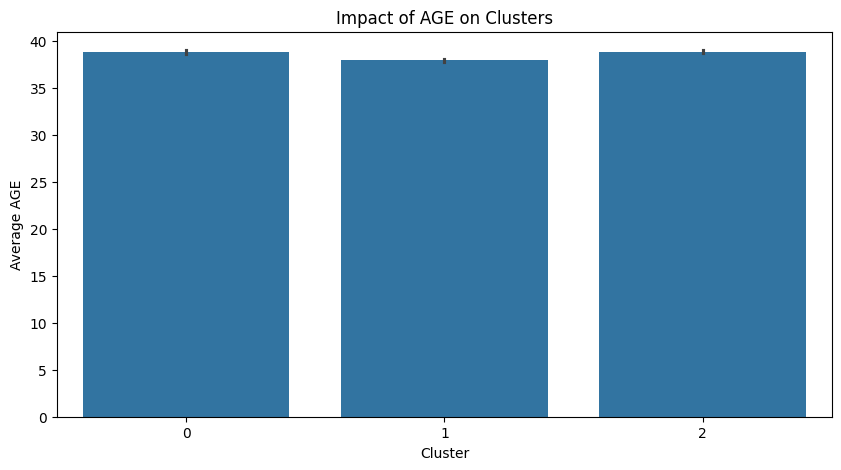

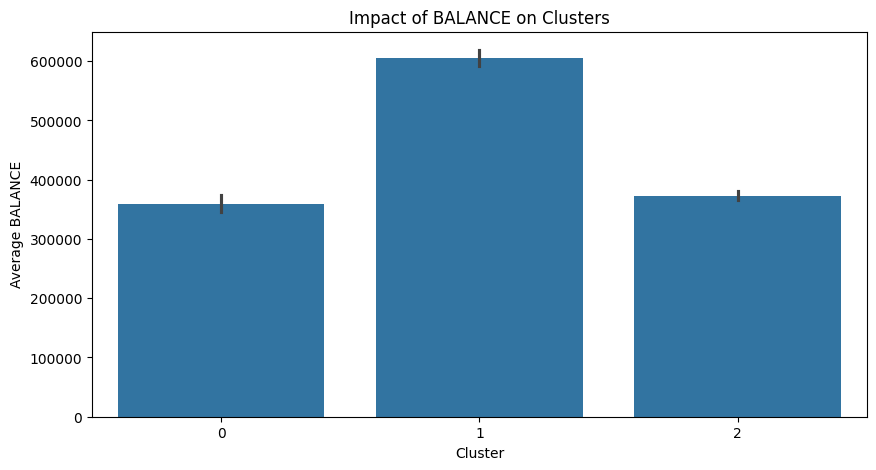

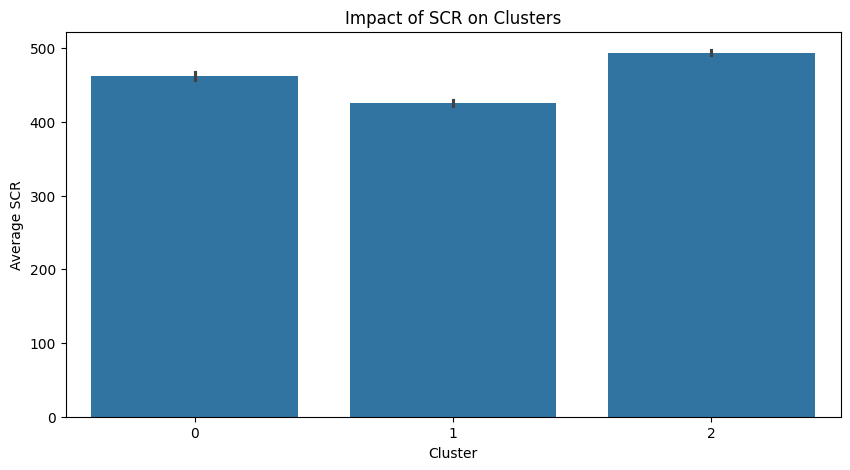

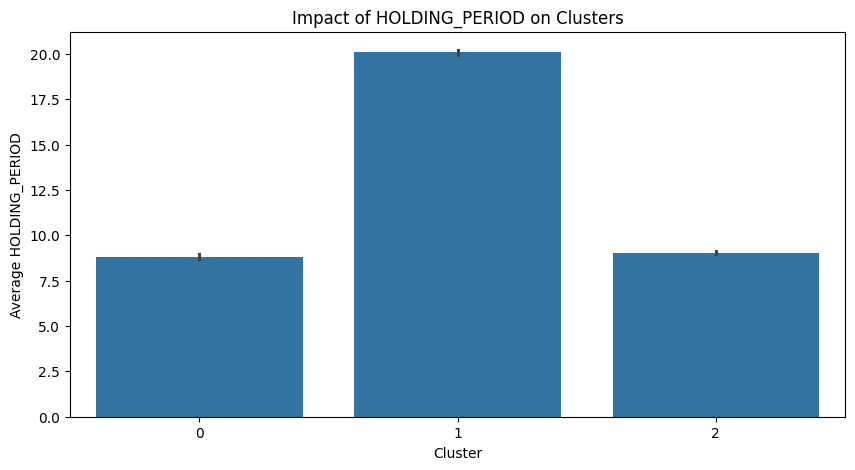

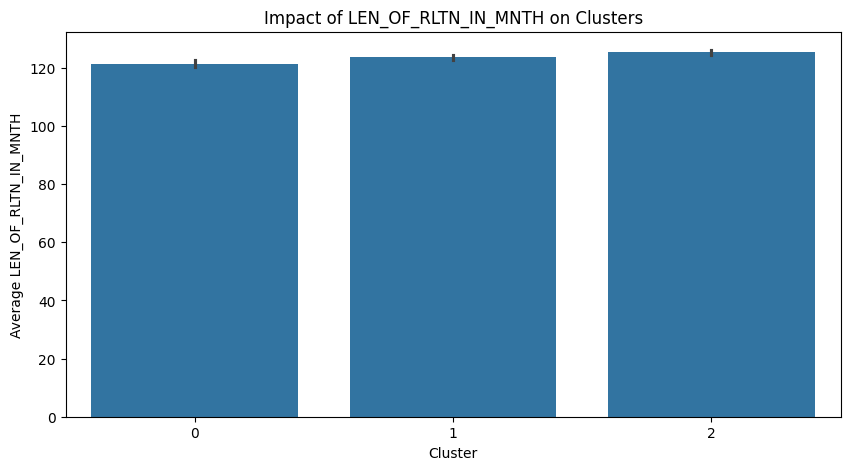

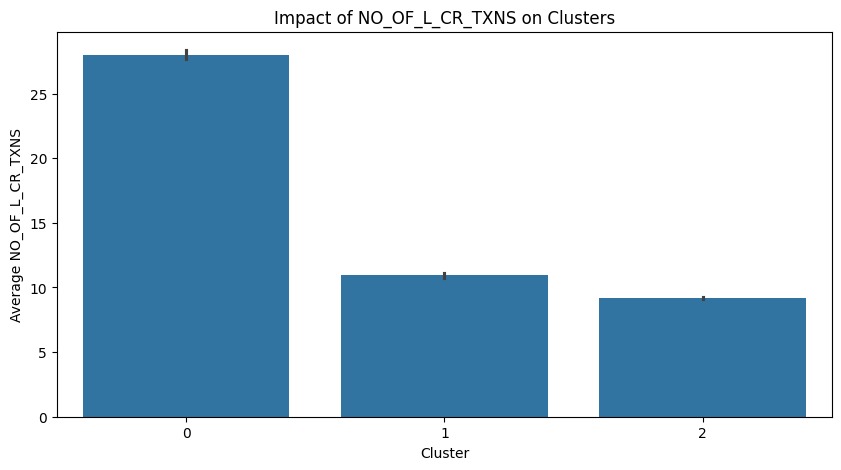

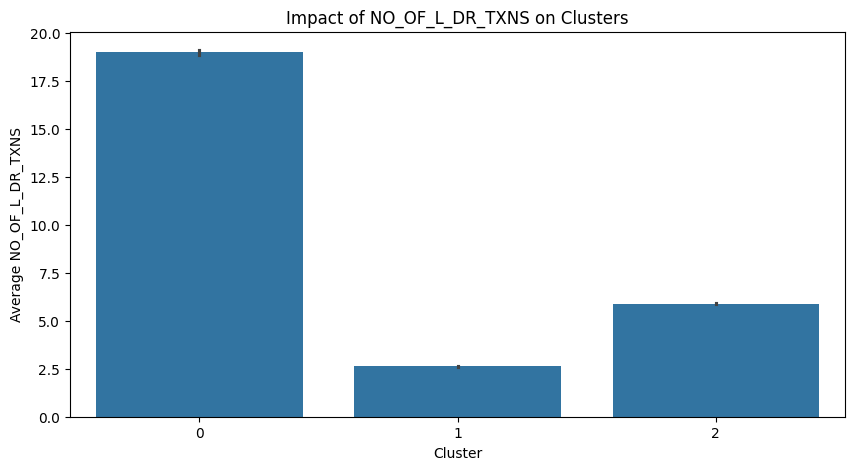

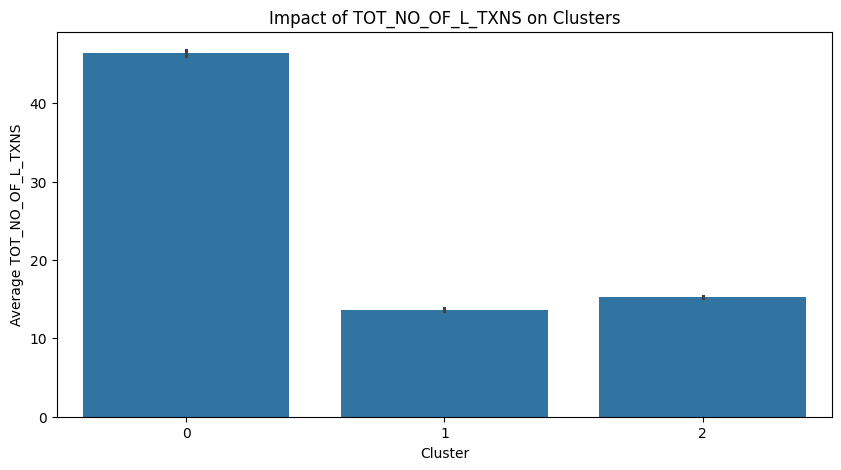

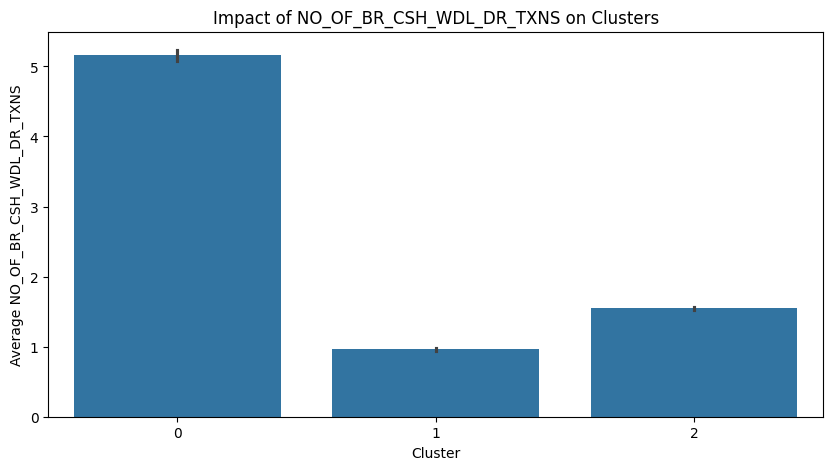

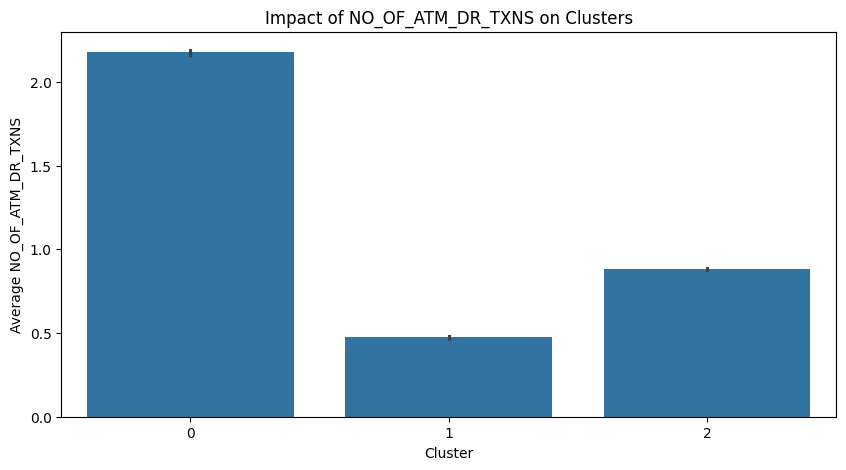

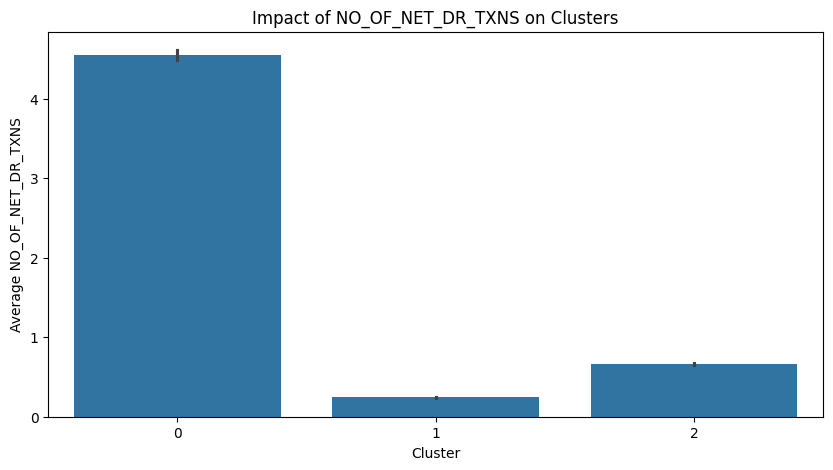

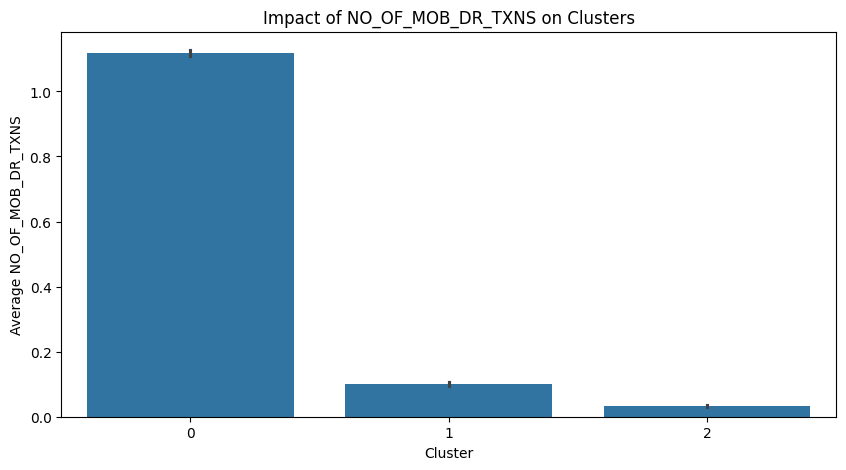

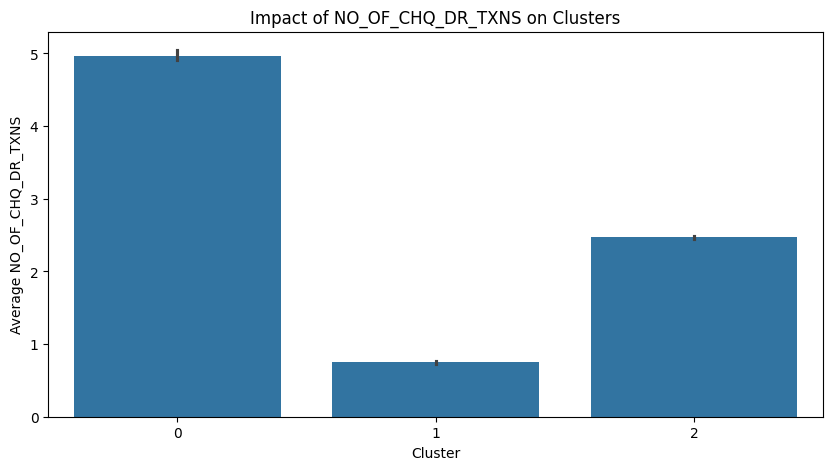

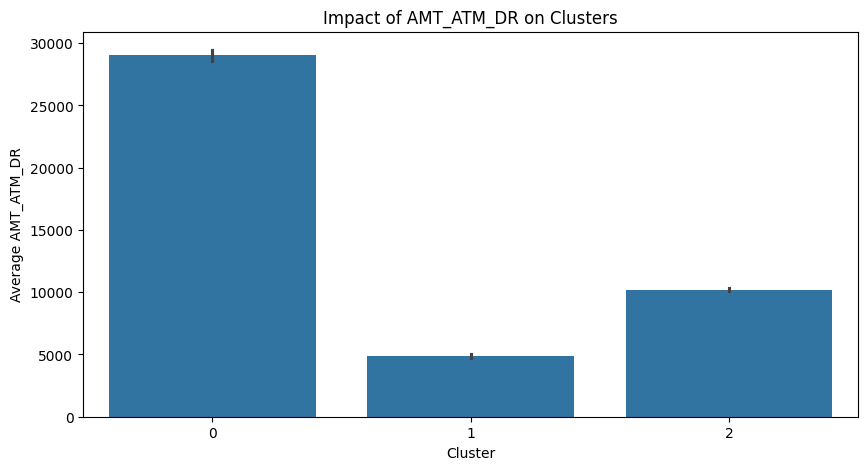

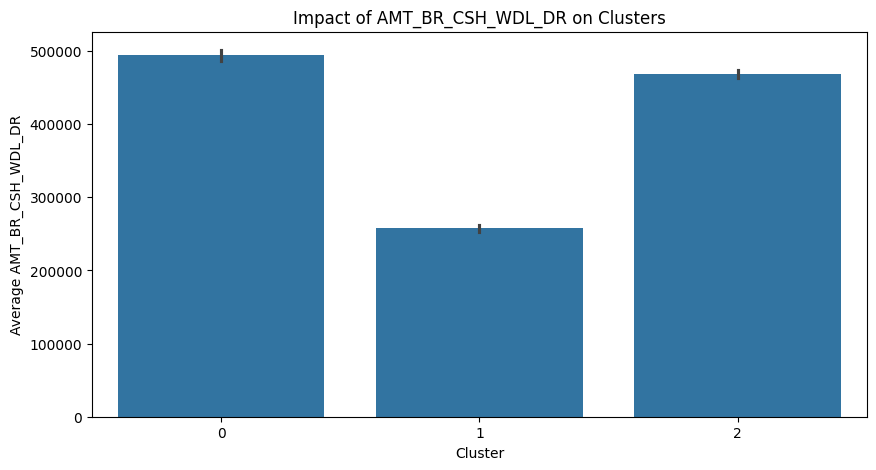

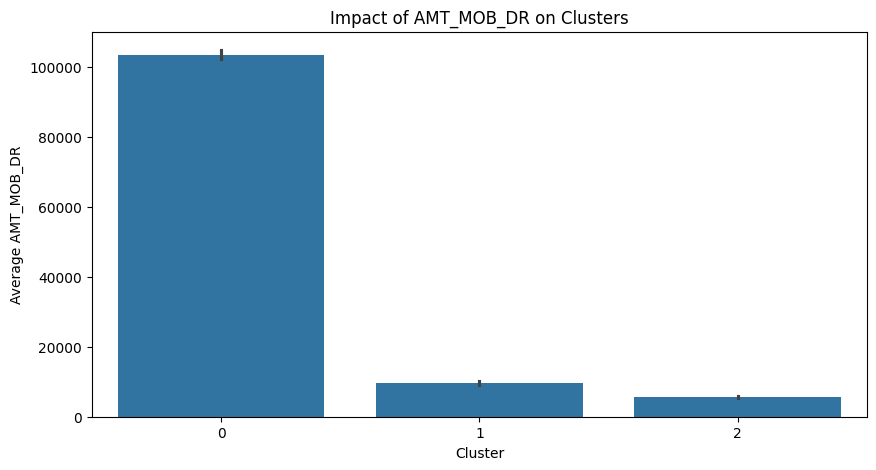

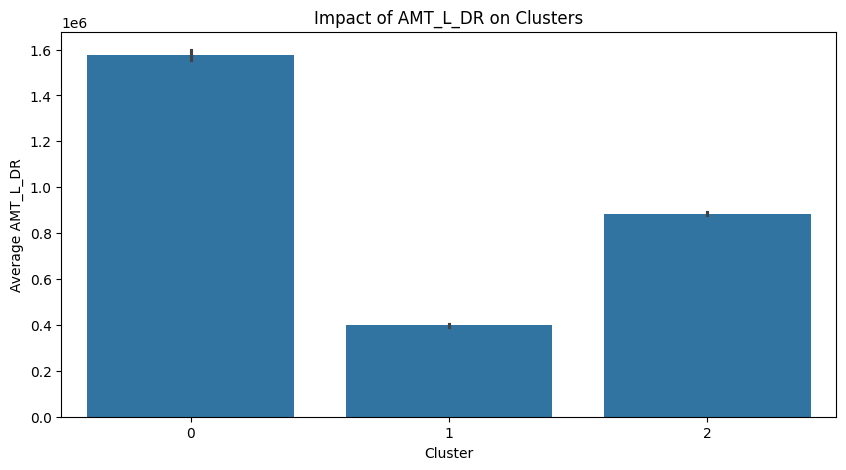

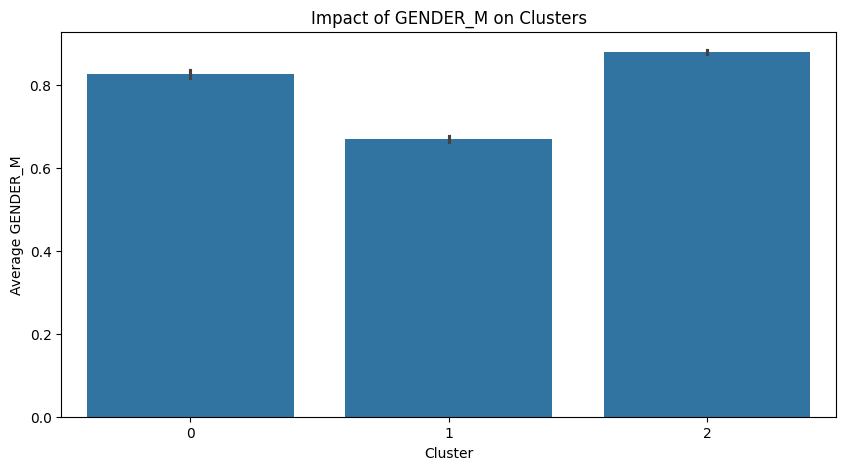

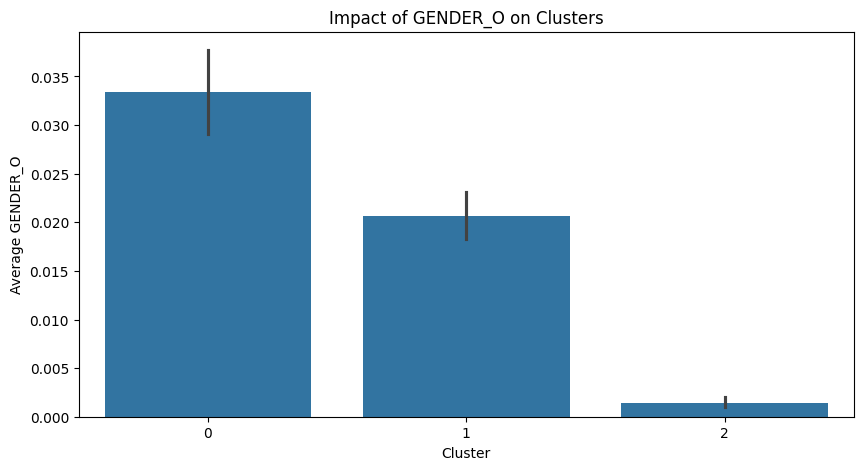

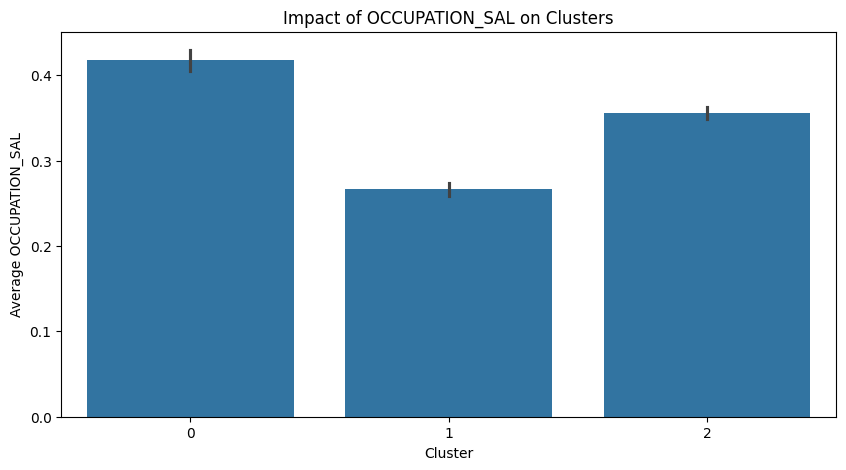

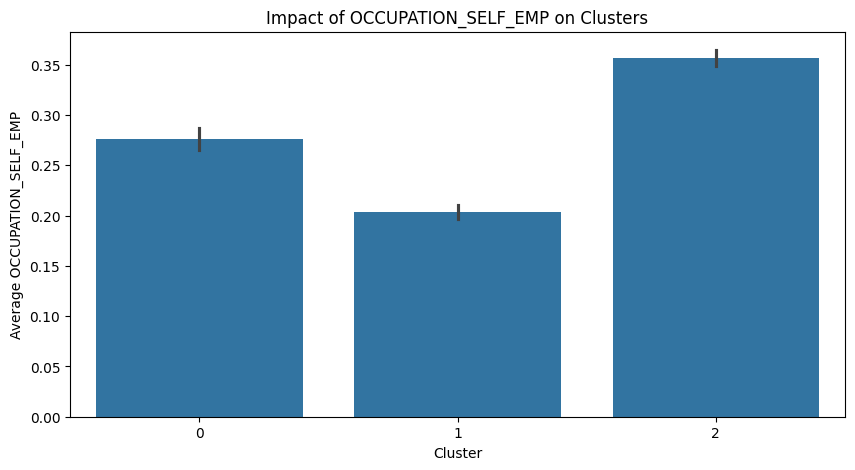

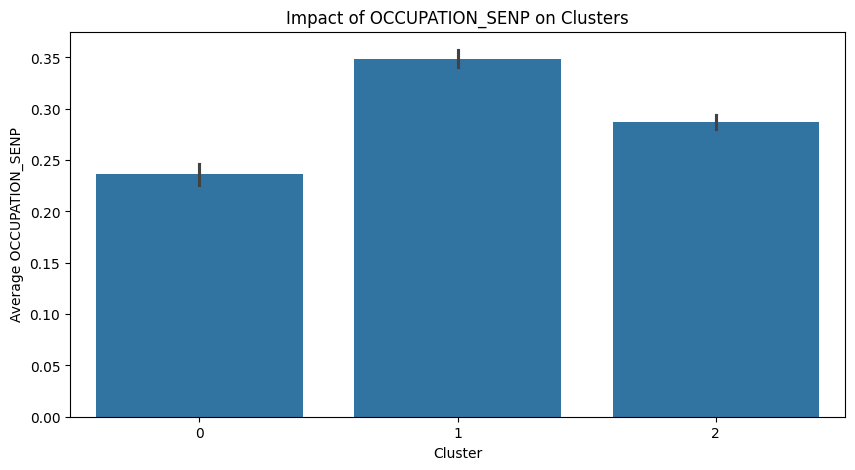

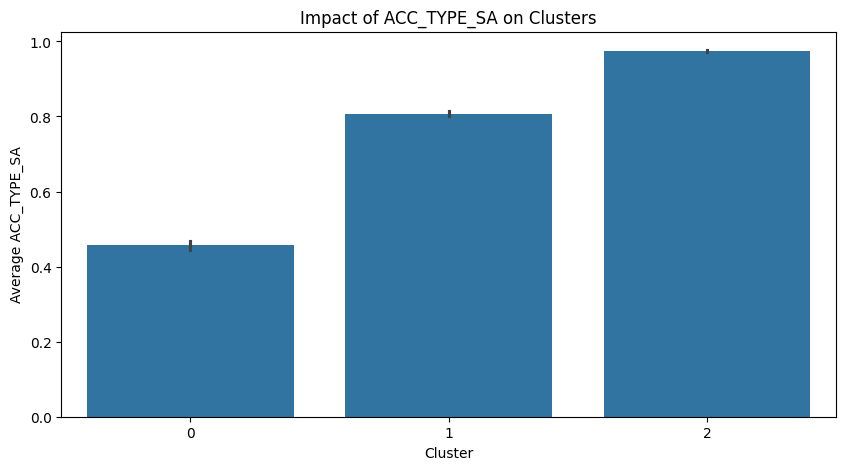

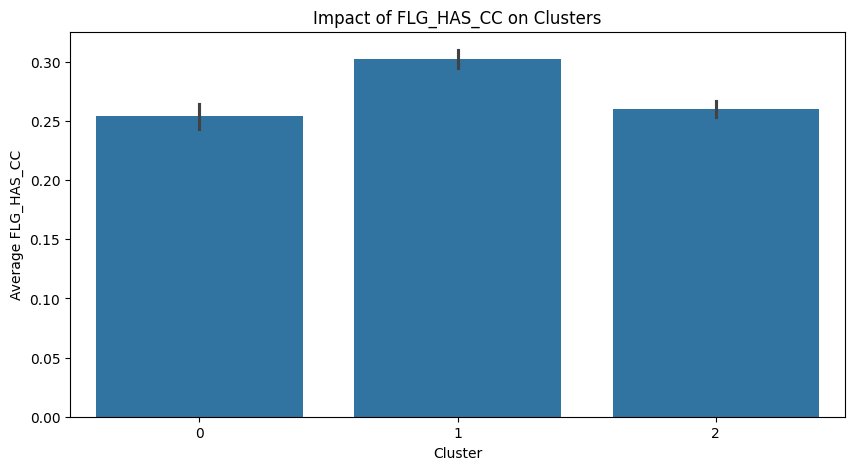

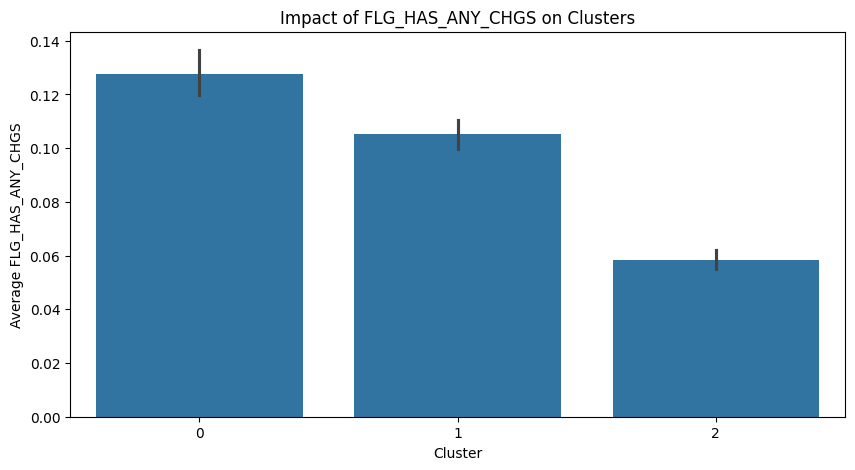

In [ ]:
# Analyze the impact of key features on TARGET
for col in features_of_interest:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=X_res, x='Cluster', y=col, estimator=np.mean)
    plt.title(f"Impact of {col} on Clusters")
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {col}')
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Add the Cluster labels from X_res to y_res
# Reset index to align X_res and y_res properly if needed
X_res = X_res.reset_index(drop=True)
y_res = y_res.reset_index(drop=True)

# Combine the Cluster labels with TARGET variable
cluster_target_data = pd.concat([X_res['Cluster'], y_res], axis=1)

# Map clusters to business context
# Example: Calculate the percentage of TARGET=1 (positive responses) in each cluster
cluster_target_analysis = cluster_target_data.groupby('Cluster')[y_res.columns[0]].mean() * 100

# Print the analysis
print(cluster_target_analysis)

Cluster
0    59.005542
1    32.028583
2    60.155206
Name: TARGET, dtype: float64


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=cluster_target_analysis.index,
    y=cluster_target_analysis.values,
    marker_color='darkblue'
)])

fig.update_layout(
    title="Conversion Rates by Cluster",
    xaxis_title="Cluster",
    yaxis_title="Conversion Rate (%)"
)

fig.show()

**Cluster 0 (Conversion Rate: 59.01%)**:

This cluster exhibits a moderate conversion rate, close to Cluster 2.

Indicates a group that is relatively likely to respond positively to marketing efforts.

**Cluster 1 (Conversion Rate: 32.03%)**:

Lowest conversion rate among the clusters.

Suggests these customers are the least likely to engage or convert, potentially due to low activity or mismatched marketing efforts.

**Cluster 2 (Conversion Rate: 60.16%)**:

Highest conversion rate among all clusters.

These customers are the most likely to respond positively, indicating high potential for marketing success.

### Train test split

In [ ]:
X_res = X_res.drop(['PCA1', 'PCA2', 'Cluster'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [ ]:
print ("Shape of training data", X_train.shape)
print ("Shape of testing data", X_test.shape)
print ("Response rate in training data", y_train.mean())
print ("Response rate in testing data", y_test.mean())

Shape of training data (24368, 24)
Shape of testing data (10444, 24)
Response rate in training data TARGET    0.497292
dtype: float64
Response rate in testing data TARGET    0.498468
dtype: float64


In [ ]:
X_train.describe()

AGE       BALANCE           SCR  HOLDING_PERIOD  \
count  24368.000000  2.436800e+04  24368.000000    24368.000000   
mean      38.479769  4.524693e+05    462.205639       12.932206   
std        8.817502  6.416891e+05    238.448847        8.295522   
min       21.000000  1.677630e+03    106.000000        1.000000   
25%       31.000000  5.517688e+04    259.000000        6.000000   
50%       38.000000  2.016288e+05    412.000000       12.000000   
75%       45.000000  5.608543e+05    655.000000       19.000000   
max       55.000000  3.412760e+06    970.000000       31.000000   

       LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_L_DR_TXNS  \
count         24368.000000     24368.000000     24368.000000   
mean            124.131689        13.320831         7.137393   
std              51.492068        12.376758         6.518751   
min              31.000000         0.000000         0.000000   
25%              82.000000         6.000000         3.000000   
50%             124.000000        10.000000         5.000000   
75%             166.000000        16.000000         7.000000   
max             219.000000        64.000000        31.000000   

       TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  \
count      24368.000000              24368.000000       24368.000000   
mean          20.445379                  2.013255           0.978332   
std           16.631152                  2.289532           0.804544   
min            0.000000                  0.000000           0.000000   
25%           10.000000                  1.000000           0.000000   
50%           15.000000                  1.000000           1.000000   
75%           24.000000                  3.000000           1.000000   
max           79.000000                 11.000000           4.000000   

       NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS    AMT_ATM_DR  \
count       24368.000000       24368.000000       24368.000000  24368.000000   
mean            1.229810           0.259644           2.307165  11781.942055   
std             2.031587           0.501577           2.300664  13186.489272   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000    700.000000   
50%             1.000000           0.000000           2.000000   8800.000000   
75%             1.000000           0.000000           4.000000  16500.000000   
max             9.000000           2.000000          11.000000  66400.000000   

       AMT_BR_CSH_WDL_DR     AMT_MOB_DR      AMT_L_DR    FLG_HAS_CC  \
count       24368.000000   24368.000000  2.436800e+04  24368.000000   
mean       396396.312787   25163.413534  8.339094e+05      0.272283   
std        331021.304029   50975.950089  6.747586e+05      0.445144   
min             0.000000       0.000000  0.000000e+00      0.000000   
25%         38869.000000       0.000000  3.132288e+05      0.000000   
50%        373300.000000       0.000000  7.660317e+05      0.000000   
75%        691030.000000   11367.750000  1.179807e+06      1.000000   
max        988660.000000  190805.000000  3.767743e+06      1.000000   

       FLG_HAS_ANY_CHGS  
count      24368.000000  
mean           0.086014  
std            0.280391  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [ ]:
X_test.describe()

AGE       BALANCE           SCR  HOLDING_PERIOD  \
count  10444.000000  1.044400e+04  10444.000000    10444.000000   
mean      38.571524  4.600519e+05    465.634527       13.168518   
std        8.821930  6.470735e+05    238.286705        8.300595   
min       21.000000  1.677630e+03    106.000000        1.000000   
25%       31.000000  5.696646e+04    261.000000        6.000000   
50%       39.000000  2.064091e+05    421.000000       12.000000   
75%       45.000000  5.760577e+05    657.000000       19.000000   
max       55.000000  3.412760e+06    970.000000       31.000000   

       LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_L_DR_TXNS  \
count         10444.000000     10444.000000      10444.00000   
mean            123.621026        13.417943          7.16306   
std              51.464434        12.371653          6.52949   
min              31.000000         0.000000          0.00000   
25%              81.000000         6.000000          3.00000   
50%             123.000000        10.000000          5.00000   
75%             166.000000        16.000000          8.00000   
max             219.000000        64.000000         31.00000   

       TOT_NO_OF_L_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  \
count      10444.000000              10444.000000       10444.000000   
mean          20.589908                  1.997319           0.974914   
std           16.649718                  2.264006           0.805957   
min            0.000000                  0.000000           0.000000   
25%           11.000000                  1.000000           0.000000   
50%           15.000000                  1.000000           1.000000   
75%           25.000000                  3.000000           1.000000   
max           79.000000                 11.000000           4.000000   

       NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS    AMT_ATM_DR  \
count       10444.000000       10444.000000       10444.000000  10444.000000   
mean            1.247894           0.263022           2.327461  11841.035427   
std             2.041399           0.499399           2.346220  13436.121502   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000    500.000000   
50%             1.000000           0.000000           2.000000   8700.000000   
75%             1.000000           0.000000           4.000000  16600.000000   
max             9.000000           2.000000          11.000000  66400.000000   

       AMT_BR_CSH_WDL_DR     AMT_MOB_DR      AMT_L_DR    FLG_HAS_CC  \
count       10444.000000   10444.000000  1.044400e+04  10444.000000   
mean       398781.417560   25738.316450  8.465465e+05      0.279203   
std        334370.341798   51797.684638  6.888185e+05      0.448629   
min             0.000000       0.000000  0.000000e+00      0.000000   
25%         35068.250000       0.000000  3.113413e+05      0.000000   
50%        377287.000000       0.000000  7.723184e+05      0.000000   
75%        696705.000000   13308.000000  1.198985e+06      1.000000   
max        988660.000000  190805.000000  3.767743e+06      1.000000   

       FLG_HAS_ANY_CHGS  
count      10444.000000  
mean           0.093642  
std            0.291344  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [ ]:
# Non linearity in feature relationships is observed which makes tree methods a good choice
# decision tree
# random forest
# GBM/XGBoost

**Decision Tree Model**

In [ ]:
# building decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier(criterion= 'gini',random_state=0)

In [ ]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7],
              'min_samples_split': [140,280,420,560,700]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train, y_train)
print ('Best Parameters using grid search : \n', tree_grid.best_params_)

Best Parameters using grid search : 
 {'max_depth': 7, 'min_samples_split': 140}


In [ ]:
dtree = DecisionTreeClassifier(criterion= 'gini',random_state=0,max_depth=7,min_samples_split=140)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=140, random_state=0)

In [ ]:
# model evaluation
y_pred_tree = dtree.predict(X_test)

In [ ]:
# decision tree
print ("Accuracy for Decision Tree : ", metrics.accuracy_score(y_test,y_pred_tree))
print ("Precision for Decison tree : ", metrics.precision_score(y_test,y_pred_tree))
print ("Recall for Decision Tree : ", metrics.recall_score(y_test,y_pred_tree))
print ("F1 score for Decision Tree : ", metrics.f1_score(y_test,y_pred_tree))

Accuracy for Decision Tree :  0.7412868632707775
Precision for Decison tree :  0.7587846217445225
Recall for Decision Tree :  0.7051479062620054
F1 score for Decision Tree :  0.7309836718438869


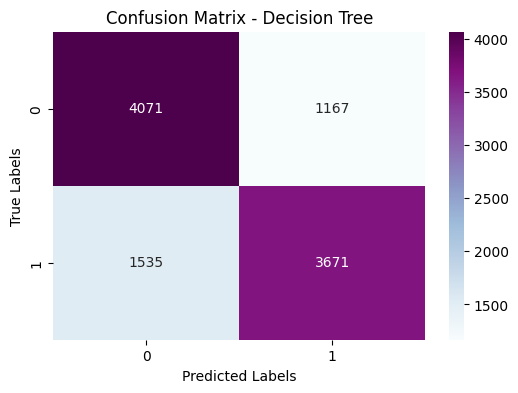

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="BuPu")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Random Forest Model**

In [ ]:
# building random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'gini',random_state=0,max_depth=7,min_samples_split=140)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=140, random_state=0)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print ("Accuracy for Random Forest : ", metrics.accuracy_score(y_test,y_pred_rf))
print ("Precision for Random Forest : ", metrics.precision_score(y_test,y_pred_rf))
print ("Recall for Random Forest : ", metrics.recall_score(y_test,y_pred_rf))
print ("F1 score for Random Forest : ", metrics.f1_score(y_test,y_pred_rf))

Accuracy for Random Forest :  0.7904059747223287
Precision for Random Forest :  0.7958423220239262
Recall for Random Forest :  0.7794852093737995
F1 score for Random Forest :  0.7875788452207666


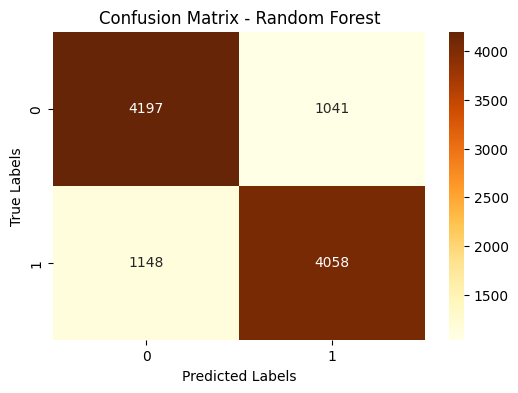

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Gradient Boost Model**

In [ ]:
# building gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion='squared_error',random_state=0,max_depth=7,min_samples_split=140)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=7,
                           min_samples_split=140, random_state=0)

In [ ]:
y_pred_gbm = gbm.predict(X_test)

In [ ]:
print ("Accuracy for GBM : ", metrics.accuracy_score(y_test,y_pred_gbm))
print ("Precision for GBM : ", metrics.precision_score(y_test,y_pred_gbm))
print ("Recall for GBM : ", metrics.recall_score(y_test,y_pred_gbm))
print ("F1 score for GBM : ", metrics.f1_score(y_test,y_pred_gbm))

Accuracy for GBM :  0.936710072769054
Precision for GBM :  0.9413478345309769
Recall for GBM :  0.9310411064156742
F1 score for GBM :  0.9361661033317238


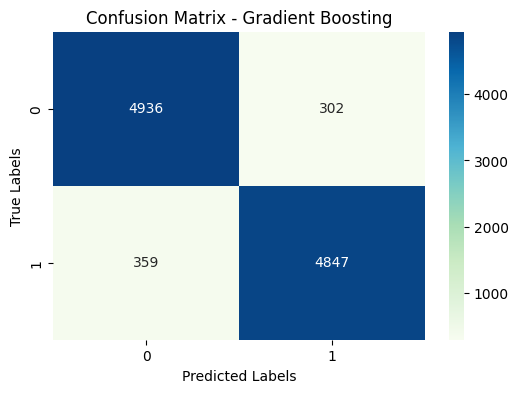

In [ ]:
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="GnBu")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**XGBoost Model**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Building XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0, max_depth=7, min_samples_split=140)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, min_samples_split=140,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Making predictions on the test set
y_pred_xgb = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Printing evaluation metrics for XGBoost
print("Accuracy for XGBoost : ", accuracy_score(y_test, y_pred_xgb))
print("Precision for XGBoost : ", precision_score(y_test, y_pred_xgb))
print("Recall for XGBoost : ", recall_score(y_test, y_pred_xgb))
print("F1 score for XGBoost : ", f1_score(y_test, y_pred_xgb))

Accuracy for XGBoost :  0.9770202987361164
Precision for XGBoost :  0.9793436293436294
Recall for XGBoost :  0.9744525547445255
F1 score for XGBoost :  0.976891969959561


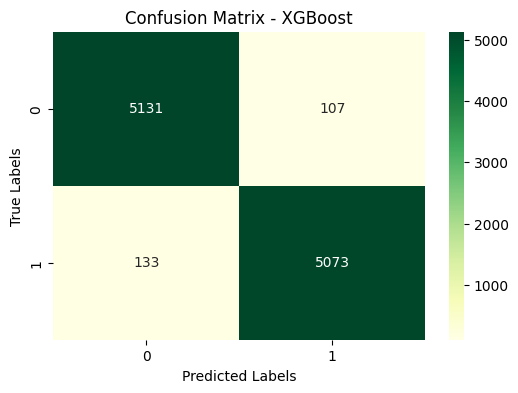

In [ ]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="YlGn")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Model Comparison**

In [ ]:
results=pd.DataFrame({'Model': ['Decision Tree','Gradient Boost', 'Random Forest','XG Boost'],
                    'Accuracy': [accuracy_score(y_test,y_pred_tree),accuracy_score(y_test,y_pred_gbm),
                                      accuracy_score(y_test, y_pred_rf),accuracy_score(y_test,y_pred_xgb)],

                      'Precision': [precision_score(y_test,y_pred_tree),precision_score(y_test,y_pred_gbm),
                                    precision_score(y_test, y_pred_rf),precision_score(y_test,y_pred_xgb)],

                      'Recall': [recall_score(y_test,y_pred_tree),recall_score(y_test,y_pred_gbm),
                                 recall_score(y_test, y_pred_rf),recall_score(y_test,y_pred_xgb)],

                      'F1 score': [f1_score(y_test,y_pred_tree),f1_score(y_test,y_pred_gbm),
                                   f1_score(y_test, y_pred_rf),f1_score(y_test,y_pred_xgb)]})

result_df=results.sort_values(by='Accuracy', ascending=False)
result_df=result_df.set_index('Model')
result_df

Accuracy  Precision    Recall  F1 score
Model                                                  
XG Boost        0.977020   0.979344  0.974453  0.976892
Gradient Boost  0.936710   0.941348  0.931041  0.936166
Random Forest   0.790406   0.795842  0.779485  0.787579
Decision Tree   0.741287   0.758785  0.705148  0.730984

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add traces for each metric
fig.add_trace(go.Scatter(x=result_df.index, y=result_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=result_df.index, y=result_df['Precision'],
                         mode='lines+markers',
                         name='Precision',
                         line=dict(color='green')))

fig.add_trace(go.Scatter(x=result_df.index, y=result_df['Recall'],
                         mode='lines+markers',
                         name='Recall',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=result_df.index, y=result_df['F1 score'],
                         mode='lines+markers',
                         name='F1 Score',
                         line=dict(color='red')))

# Update layout for better visualization
fig.update_layout(
    title="Model Performance Comparison",
    xaxis_title="Models",
    yaxis_title="Scores",
    legend_title="Metrics",
    hovermode="x unified",  # This allows hover information for all metrics simultaneously
    template="plotly_white",  # You can use different templates (e.g., "plotly", "ggplot2")
    width=800, height=500
)

# Show the figure
fig.show()


# Testing the Models


1. **Prediction of Probabilities (`y_pred_prob`)**:
   ```python
   y_pred_prob = dtree.predict_proba(X_all)[:, 1]
   ```
   It generates the predicted probabilities from a decision tree model.

2. **Creating Deciles Based on Predicted Probabilities**:
   ```python
   df['y_pred_P'] = pd.DataFrame(y_pred_prob)
   df['P_Rank_dtree'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes + 1
   ```
   This section ranks and divides customers into deciles (or bins) based on their predicted probabilities. We're categorizing customers by their likelihood of responding to cross-sell offers, with Decile 1 containing customers with the highest predicted response rate.

3. **Grouping by Deciles to Calculate Actual and Predicted Event Rates**:
   ```python
   rank_df_actuals = df.groupby('P_Rank_dtree')['TARGET'].agg(['count', 'mean'])
   rank_df_predicted = df.groupby('P_Rank_dtree')['y_pred_P'].agg(['mean'])
   ```
   Here, actual and predicted event rates are calculated per decile. The `TARGET` variable represents actual outcomes (e.g., whether a customer accepted a cross-sell offer), and `y_pred_P` is the predicted probability. This step allows you to compare the model's predictions with real outcomes to assess model performance in each decile.

4. **Renaming Columns and Merging DataFrames**:
   ```python
   rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
   rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)
   rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')
   ```
   This merges the actual and predicted rates into a single DataFrame, allowing to view the predicted and actual event rates side-by-side for each decile. This comparison is crucial to validate that the model is accurate across different customer segments.

5. **Calculating Cumulative Events and Non-Events**:
   ```python
   sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
   sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
   ```
   These lines calculate cumulative events (customers who accepted the cross-sell offer) across deciles, helping to plot a **Curve** of event rates. You could use this to see if cross-sell potential is concentrated among a few deciles, guiding your targeting strategy.

6. **Calculating KS Statistic**:
   ```python
   sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)
   ```
   The **KS (Kolmogorov-Smirnov)** statistic measures the maximum difference between cumulative event rates and non-event rates. In cross-selling, a higher KS statistic indicates a stronger model, as it shows that the model effectively distinguishes between customers likely to accept or reject cross-sell offers.

7. **Random Cap Calculation and Decile Labeling**:
   ```python
   sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
   sorted_reindexed['Decile'] = sorted_reindexed.index + 1
   ```
   Adding a random baseline (`random_cap`) allows you to compare the model’s predictions against a random scenario, highlighting the value of targeted predictions in your cross-sell strategy. The decile labels (1 through 10) provide easy reference for reporting results.




In [ ]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['y_pred_P'] = pd.DataFrame(y_pred_prob)
df['P_Rank_dtree'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes + 1
rank_df_actuals = df.groupby('P_Rank_dtree')['TARGET'].agg(['count', 'mean'])
rank_df_predicted = df.groupby('P_Rank_dtree')['y_pred_P'].agg(['mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted = pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')

sorted_rank_df = rank_df.sort_values(by='P_Rank_dtree', ascending=False)
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()
sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1

In [ ]:
sorted_reindexed

P_Rank_dtree  count  Actual_event_rate  Predicted_event_rate  N_events  \
0            10   2000             0.3400              0.743048     680.0   
1             9   2000             0.2010              0.576735     402.0   
2             8   2000             0.1715              0.517787     343.0   
3             7   2000             0.1285              0.430901     257.0   
4             6   2000             0.1365              0.427262     273.0   
5             5   2000             0.1205              0.342043     241.0   
6             4   2000             0.0720              0.220282     144.0   
7             3   2000             0.0545              0.146273     109.0   
8             2   2000             0.0245              0.074683      49.0   
9             1   2000             0.0070              0.024622      14.0   

   cum_events  event_cap  cum_event_cap  N_non_events  cum_non_events  \
0       680.0   0.270701       0.270701        1320.0          1320.0   
1      1082.0   0.160032       0.430732        1598.0          2918.0   
2      1425.0   0.136545       0.567277        1657.0          4575.0   
3      1682.0   0.102309       0.669586        1743.0          6318.0   
4      1955.0   0.108678       0.778264        1727.0          8045.0   
5      2196.0   0.095939       0.874204        1759.0          9804.0   
6      2340.0   0.057325       0.931529        1856.0         11660.0   
7      2449.0   0.043392       0.974920        1891.0         13551.0   
8      2498.0   0.019506       0.994427        1951.0         15502.0   
9      2512.0   0.005573       1.000000        1986.0         17488.0   

   non_event_cap  cum_non_event_cap      KS  random_cap  cum_random_cap  \
0       0.075480           0.075480  0.1952         0.1             0.1   
1       0.091377           0.166857  0.2639         0.1             0.2   
2       0.094751           0.261608  0.3057         0.1             0.3   
3       0.099668           0.361276  0.3083         0.1             0.4   
4       0.098753           0.460030  0.3182         0.1             0.5   
5       0.100583           0.560613  0.3136         0.1             0.6   
6       0.106130           0.666743  0.2648         0.1             0.7   
7       0.108131           0.774874  0.2000         0.1             0.8   
8       0.111562           0.886436  0.1080         0.1             0.9   
9       0.113564           1.000000  0.0000         0.1             1.0   

   Decile  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the Actual Event Rate line (red)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Actual_event_rate'],
    mode='lines+markers',
    name='Actual Event Rate',
    line=dict(color='red'),
    marker=dict(size=6)
))

# Add the Predicted Event Rate line (grey)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Predicted_event_rate'],
    mode='lines+markers',
    name='Predicted Event Rate',
    line=dict(color='grey'),
    marker=dict(size=6)
))

# Customize layout
fig.update_layout(
    title="Decision Tree : Actual vs Predicted Event Rate",
    xaxis_title="Decile",
    yaxis_title="Event Rate",
    legend_title="Legend",
    hovermode="x unified",  # Enables hover over both lines simultaneously
    template="plotly_white",  # Optional: you can choose other templates
    width=800, height=500
)

# Show the figure
fig.show()

Random Forest

In [ ]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob'] = pd.DataFrame(y_pred_prob)
df['P_Rank_rf'] = pd.qcut(df['pred_prob'].rank(method='first').values, 10, duplicates='drop').codes + 1
rank_df_actuals = df.groupby('P_Rank_rf')['TARGET'].agg(['count', 'mean'])
rank_df_predicted = df.groupby('P_Rank_rf')['pred_prob'].agg(['mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted = pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

sorted_rank_df = rank_df.sort_values(by='P_Rank_rf', ascending=False)
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()
sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1


In [ ]:
sorted_reindexed

P_Rank_rf  count  Actual_event_rate  Predicted_event_rate  N_events  \
0         10   2000             0.3925              0.661076     785.0   
1          9   2000             0.2325              0.549007     465.0   
2          8   2000             0.1565              0.497348     313.0   
3          7   2000             0.1570              0.451506     314.0   
4          6   2000             0.1185              0.406359     237.0   
5          5   2000             0.0880              0.358347     176.0   
6          4   2000             0.0590              0.312299     118.0   
7          3   2000             0.0350              0.270230      70.0   
8          2   2000             0.0145              0.224102      29.0   
9          1   2000             0.0025              0.169768       5.0   

   cum_events  event_cap  cum_event_cap  N_non_events  cum_non_events  \
0       785.0   0.312500       0.312500        1215.0          1215.0   
1      1250.0   0.185111       0.497611        1535.0          2750.0   
2      1563.0   0.124602       0.622213        1687.0          4437.0   
3      1877.0   0.125000       0.747213        1686.0          6123.0   
4      2114.0   0.094347       0.841561        1763.0          7886.0   
5      2290.0   0.070064       0.911624        1824.0          9710.0   
6      2408.0   0.046975       0.958599        1882.0         11592.0   
7      2478.0   0.027866       0.986465        1930.0         13522.0   
8      2507.0   0.011545       0.998010        1971.0         15493.0   
9      2512.0   0.001990       1.000000        1995.0         17488.0   

   non_event_cap  cum_non_event_cap      KS  random_cap  cum_random_cap  \
0       0.069476           0.069476  0.2430         0.1             0.1   
1       0.087774           0.157251  0.3404         0.1             0.2   
2       0.096466           0.253717  0.3685         0.1             0.3   
3       0.096409           0.350126  0.3971         0.1             0.4   
4       0.100812           0.450938  0.3906         0.1             0.5   
5       0.104300           0.555238  0.3564         0.1             0.6   
6       0.107617           0.662855  0.2957         0.1             0.7   
7       0.110361           0.773216  0.2132         0.1             0.8   
8       0.112706           0.885922  0.1121         0.1             0.9   
9       0.114078           1.000000  0.0000         0.1             1.0   

   Decile  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the Actual Event Rate line (red)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Actual_event_rate'],
    mode='lines+markers',
    name='Actual Event Rate',
    line=dict(color='red'),
    marker=dict(size=6)
))

# Add the Predicted Event Rate line (grey)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Predicted_event_rate'],
    mode='lines+markers',
    name='Predicted Event Rate',
    line=dict(color='grey'),
    marker=dict(size=6)
))

# Customize layout
fig.update_layout(
    title="Random Forest : Actual vs Predicted Event Rate",
    xaxis_title="Decile",
    yaxis_title="Event Rate",
    legend_title="Legend",
    hovermode="x unified",  # Enables hover over both lines simultaneously
    template="plotly_white",  # Optional: you can choose other templates
    width=800, height=500
)

# Show the figure
fig.show()

Gradient Boost

In [ ]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob'] = pd.DataFrame(y_pred_prob)
df['P_Rank_GBM'] = pd.qcut(df['pred_prob'].rank(method='first').values, 10, duplicates='drop').codes + 1
rank_df_actuals = df.groupby('P_Rank_GBM')['TARGET'].agg(['count', 'mean'])
rank_df_predicted = df.groupby('P_Rank_GBM')['pred_prob'].agg(['mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted = pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

sorted_rank_df = rank_df.sort_values(by='P_Rank_GBM', ascending=False)
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()
sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1

In [ ]:
sorted_reindexed

P_Rank_GBM  count  Actual_event_rate  Predicted_event_rate  N_events  \
0          10   2000             0.8370              0.772825    1674.0   
1           9   2000             0.2965              0.489699     593.0   
2           8   2000             0.0745              0.321454     149.0   
3           7   2000             0.0235              0.233680      47.0   
4           6   2000             0.0105              0.173618      21.0   
5           5   2000             0.0075              0.131077      15.0   
6           4   2000             0.0040              0.096887       8.0   
7           3   2000             0.0015              0.069969       3.0   
8           2   2000             0.0010              0.046594       2.0   
9           1   2000             0.0000              0.025172       0.0   

   cum_events  event_cap  cum_event_cap  N_non_events  cum_non_events  \
0      1674.0   0.666401       0.666401         326.0           326.0   
1      2267.0   0.236067       0.902468        1407.0          1733.0   
2      2416.0   0.059315       0.961783        1851.0          3584.0   
3      2463.0   0.018710       0.980494        1953.0          5537.0   
4      2484.0   0.008360       0.988854        1979.0          7516.0   
5      2499.0   0.005971       0.994825        1985.0          9501.0   
6      2507.0   0.003185       0.998010        1992.0         11493.0   
7      2510.0   0.001194       0.999204        1997.0         13490.0   
8      2512.0   0.000796       1.000000        1998.0         15488.0   
9      2512.0   0.000000       1.000000        2000.0         17488.0   

   non_event_cap  cum_non_event_cap      KS  random_cap  cum_random_cap  \
0       0.018641           0.018641  0.6478         0.1             0.1   
1       0.080455           0.099097  0.8034         0.1             0.2   
2       0.105844           0.204941  0.7568         0.1             0.3   
3       0.111677           0.316617  0.6639         0.1             0.4   
4       0.113163           0.429780  0.5591         0.1             0.5   
5       0.113506           0.543287  0.4515         0.1             0.6   
6       0.113907           0.657194  0.3408         0.1             0.7   
7       0.114193           0.771386  0.2278         0.1             0.8   
8       0.114250           0.885636  0.1144         0.1             0.9   
9       0.114364           1.000000  0.0000         0.1             1.0   

   Decile  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the Actual Event Rate line (red)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Actual_event_rate'],
    mode='lines+markers',
    name='Actual Event Rate',
    line=dict(color='red'),
    marker=dict(size=6)
))

# Add the Predicted Event Rate line (grey)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Predicted_event_rate'],
    mode='lines+markers',
    name='Predicted Event Rate',
    line=dict(color='grey'),
    marker=dict(size=6)
))

# Customize layout
fig.update_layout(
    title="Gradient Boost : Actual vs Predicted Event Rate",
    xaxis_title="Decile",
    yaxis_title="Event Rate",
    legend_title="Legend",
    hovermode="x unified",  # Enables hover over both lines simultaneously
    template="plotly_white",  # Optional: you can choose other templates
    width=800, height=500
)

# Show the figure
fig.show()


XG Boost

In [ ]:
# Predict probabilities for the entire dataset using XGBoost
y_pred_prob = xgb.predict_proba(X_all)[:, 1]
df['pred_prob'] = pd.DataFrame(y_pred_prob)

# Create deciles based on predicted probabilities
df['P_Rank_XGB'] = pd.qcut(df['pred_prob'].rank(method='first').values, 10, duplicates='drop').codes + 1

# Calculate actual event rate and predicted event rate by decile
rank_df_actuals = df.groupby('P_Rank_XGB')['TARGET'].agg(['count', 'mean'])
rank_df_predicted = df.groupby('P_Rank_XGB')['pred_prob'].agg(['mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted = pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

# Sort deciles and calculate cumulative metrics
sorted_rank_df = rank_df.sort_values(by='P_Rank_XGB', ascending=False)
sorted_rank_df['N_events'] = sorted_rank_df['count'] * sorted_rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / sorted_rank_df['N_events'].sum()
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / sorted_rank_df['N_non_events'].sum()
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

# Calculate KS statistic for each decile
sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

# Add random cap for baseline comparison
sorted_rank_df['random_cap'] = sorted_rank_df['count'] / sorted_rank_df['count'].sum()
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()

# Reset index and assign decile numbers for easier interpretation
sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1

In [ ]:
# Display the final DataFrame
sorted_reindexed

P_Rank_XGB  count  Actual_event_rate  Predicted_event_rate  N_events  \
0          10   2000             0.9980              0.945850    1996.0   
1           9   2000             0.2430              0.365717     486.0   
2           8   2000             0.0050              0.101212      10.0   
3           7   2000             0.0015              0.056792       3.0   
4           6   2000             0.0025              0.035007       5.0   
5           5   2000             0.0015              0.021991       3.0   
6           4   2000             0.0025              0.013090       5.0   
7           3   2000             0.0005              0.007733       1.0   
8           2   2000             0.0015              0.003790       3.0   
9           1   2000             0.0000              0.001042       0.0   

   cum_events  event_cap  cum_event_cap  N_non_events  cum_non_events  \
0      1996.0   0.794586       0.794586           4.0             4.0   
1      2482.0   0.193471       0.988057        1514.0          1518.0   
2      2492.0   0.003981       0.992038        1990.0          3508.0   
3      2495.0   0.001194       0.993232        1997.0          5505.0   
4      2500.0   0.001990       0.995223        1995.0          7500.0   
5      2503.0   0.001194       0.996417        1997.0          9497.0   
6      2508.0   0.001990       0.998408        1995.0         11492.0   
7      2509.0   0.000398       0.998806        1999.0         13491.0   
8      2512.0   0.001194       1.000000        1997.0         15488.0   
9      2512.0   0.000000       1.000000        2000.0         17488.0   

   non_event_cap  cum_non_event_cap      KS  random_cap  cum_random_cap  \
0       0.000229           0.000229  0.7944         0.1             0.1   
1       0.086574           0.086802  0.9013         0.1             0.2   
2       0.113792           0.200595  0.7914         0.1             0.3   
3       0.114193           0.314787  0.6784         0.1             0.4   
4       0.114078           0.428866  0.5664         0.1             0.5   
5       0.114193           0.543058  0.4534         0.1             0.6   
6       0.114078           0.657136  0.3413         0.1             0.7   
7       0.114307           0.771443  0.2274         0.1             0.8   
8       0.114193           0.885636  0.1144         0.1             0.9   
9       0.114364           1.000000  0.0000         0.1             1.0   

   Decile  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10

Based on the presented tables and calculations:

### Conclusion:
1. **Predictive Model Performance**:
   - The XGBoost model demonstrates a high level of accuracy in differentiating between events and non-events, as evidenced by the actual and predicted event rates. Deciles with higher ranks (closer to 10) show significantly higher actual and predicted event rates, confirming the model's effectiveness in ranking probabilities.

2. **Cumulative Event and Non-Event Metrics**:
   - The cumulative event capture (cum_event_cap) increases significantly in the higher deciles, indicating that the model successfully captures a majority of the events in the top-ranked deciles. For instance, nearly 80% of the events are captured within the first decile (top 10% of predictions).

3. **KS Statistic**:
   - The KS statistic peaks at Decile 2 with a value of 0.9013. This indicates the point of maximum separation between the cumulative distributions of events and non-events, which reflects the model's discriminative power.

4. **Random vs. Model-Based Performance**:
   - The inclusion of `random_cap` and `cum_random_cap` highlights the improvement achieved by the XGBoost model over a random baseline. The cumulative event capture curve for the model far outperforms the random baseline.

5. **Decile Analysis**:
   - Lower deciles (closer to 1) show negligible event rates, aligning with the predicted probabilities. This reflects the model's ability to correctly identify non-events and rank them appropriately.

### Insights:
- The model is well-calibrated for the given dataset, as actual and predicted event rates are closely aligned.
- The significant KS statistic and high event capture rates in top deciles make this model suitable for applications such as targeted marketing, credit risk assessment, or fraud detection.

### Recommendations:
- Focus on the top deciles (Decile 10 and 9) for decision-making processes as these deciles contribute to the majority of positive events.
- Investigate the low actual event rates in Deciles 8-1 to ensure that there are no potential biases or limitations in the input data affecting predictions.
- Further fine-tuning or ensemble modeling could enhance performance if specific business metrics demand even greater precision or recall.

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the Actual Event Rate line (red)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Actual_event_rate'],
    mode='lines+markers',
    name='Actual Event Rate',
    line=dict(color='red'),
    marker=dict(size=6)
))

# Add the Predicted Event Rate line (grey)
fig.add_trace(go.Scatter(
    x=sorted_reindexed['Decile'],
    y=sorted_reindexed['Predicted_event_rate'],
    mode='lines+markers',
    name='Predicted Event Rate',
    line=dict(color='grey'),
    marker=dict(size=6)
))

# Customize layout
fig.update_layout(
    title="XG Boost : Actual vs Predicted Event Rate",
    xaxis_title="Decile",
    yaxis_title="Event Rate",
    legend_title="Legend",
    hovermode="x unified",  # Enables hover over both lines simultaneously
    template="plotly_white",  # Optional: you can choose other templates
    width=800, height=500
)

# Show the figure
fig.show()

### Conclusion:

The chart comparing the actual and predicted event rates across deciles provides key insights into the performance of the XGBoost model:

1. **Alignment of Predicted and Actual Event Rates**:
   - The predicted event rates closely follow the trend of the actual event rates across all deciles, indicating that the model is well-calibrated.
   - The alignment is particularly strong in the top deciles (Deciles 10 to 8), where the highest event rates are observed.

2. **Decile-wise Performance**:
   - The event rates are highest in Decile 10 and decrease sharply in subsequent deciles. This confirms the model's ability to rank observations effectively, concentrating high-probability events in the top deciles.
   - Lower deciles (e.g., Decile 5 and below) have negligible event rates, reflecting the model's success in identifying non-events and ranking them accordingly.

3. **Model Calibration**:
   - While the predicted event rates are generally close to the actual event rates, some deviation is noticeable in Decile 9. This suggests potential room for slight improvements in the model's calibration for this segment.

4. **Impact on Business Decisions**:
   - Deciles 10 and 9 represent the most significant segments for targeting events, such as marketing efforts or risk assessments. These segments should be prioritized for any business strategy based on this model.

### Recommendations:
- **Focus on Top Deciles**: The model's ability to capture high event rates in Deciles 10 and 9 should guide resource allocation and decision-making.
- **Further Calibration**: To further improve performance, especially for Decile 9, consider fine-tuning the model using additional calibration techniques or by incorporating more relevant features.
- **Validation and Monitoring**: Continuously monitor the model's performance to ensure its predictive power remains robust over time and across different datasets.

In [ ]:
df.groupby('P_Rank_XGB')['pred_prob'].agg(['min', 'max', 'mean'])

min       max      mean
P_Rank_XGB                              
1           0.000011  0.002240  0.001042
2           0.002240  0.005595  0.003790
3           0.005598  0.010187  0.007733
4           0.010196  0.016736  0.013090
5           0.016745  0.027402  0.021991
6           0.027402  0.044085  0.035007
7           0.044109  0.072701  0.056792
8           0.072701  0.146078  0.101212
9           0.146078  0.852094  0.365717
10          0.852160  0.998688  0.945850


   - **Inference**: This cell groups data by `P_Rank_GBM` and calculates the minimum, maximum, and mean of `pred_prob` within each group.
   - **Conclusion**: Different `P_Rank_GBM` groups exhibit varied prediction probabilities, which suggests a range of model confidence across ranks. Higher-ranked groups show slightly elevated mean values, which could indicate higher predictive certainty.


In [ ]:
df['BALANCE_RANK'] = pd.qcut(df['BALANCE'].rank(method='first').values, 10, duplicates='drop').codes + 1
df['SCR_RANK'] = pd.qcut(df['SCR'].rank(method='first').values, 10, duplicates='drop').codes + 1

In [ ]:
df.groupby('BALANCE_RANK')['BALANCE'].agg(['min', 'max', 'mean'])

min         max          mean
BALANCE_RANK                                      
1                   0.00    19258.14  9.169133e+03
2               19259.95    47471.92  3.351790e+04
3               47501.54    87783.85  6.595922e+04
4               87783.85   147752.04  1.152610e+05
5              147752.04   231648.02  1.870688e+05
6              231703.67   340679.20  2.834977e+05
7              340679.20   525551.65  4.328909e+05
8              525551.65   809739.31  6.578914e+05
9              809739.31  1407968.88  1.053010e+06
10            1409404.40  8360430.57  2.275356e+06


   - **Inference**: The `BALANCE` column is grouped by `BALANCE_RANK`, with min, max, and mean values calculated for each rank.
   - **Conclusion**: The distribution of balance values shows a clear ascending trend as rank increases, which aligns with the expectation that higher-ranked segments have larger balances. This segmentation is valuable for targeting strategies.


In [ ]:
df.groupby('SCR_RANK')['SCR'].agg(['min', 'max', 'mean'])

min  max      mean
SCR_RANK                    
1         100  157  131.0790
2         157  205  181.6360
3         205  253  227.5165
4         253  306  280.2920
5         306  364  333.5955
6         364  463  407.7750
7         463  584  524.3815
8         584  705  642.3800
9         705  833  769.8070
10        833  999  903.0405


   - **Inference**: This cell computes the min, max, and mean values of `SCR` for each `SCR_RANK`.
   - **Conclusion**: Credit scores appear to be segmented well, with increasing values for higher ranks. This stratification can help tailor product offerings based on risk assessment or creditworthiness.



In [ ]:
df['BALANCE_RANK_SEGMENT'] = np.where(df['BALANCE_RANK'] <= 2, "Low", np.where(df['BALANCE_RANK'] >= 8, "High", "Mid"))
df.BALANCE_RANK_SEGMENT.value_counts()

BALANCE_RANK_SEGMENT
Mid     10000
High     6000
Low      4000
Name: count, dtype: int64


   - **Inference**: This assigns `BALANCE_RANK_SEGMENT` as Low, Mid, or High based on `BALANCE_RANK`, and counts each segment.
   - **Conclusion**: Most observations fall within the Mid segment, providing a balanced representation across segments. The high and low balance segments have significant representation, supporting tailored strategies based on balance levels.



In [ ]:
df['SCR_RANK_SEGMENT'] = np.where(df['SCR_RANK'] <= 3, "Low", np.where(df['SCR_RANK'] >= 8, "High", "Mid"))
df.SCR_RANK_SEGMENT.value_counts()

SCR_RANK_SEGMENT
Mid     8000
High    6000
Low     6000
Name: count, dtype: int64


   - **Inference**: This similarly segments `SCR_RANK` into Low, Mid, and High categories.
   - **Conclusion**: The SCR segmentation is also balanced, with an even distribution across Low, Mid, and High segments. This enables robust targeting based on credit rank segmentation.



In [ ]:
df['Predicted_Resp_Rank'] = np.where(df['P_Rank_XGB'] < 9, "Bottom8", "Top2")
df.Predicted_Resp_Rank.value_counts()

Predicted_Resp_Rank
Bottom8    16000
Top2        4000
Name: count, dtype: int64


   - **Inference**: The cell labels `P_Rank_GBM` as “Bottom8” or “Top2” in `Predicted_Resp_Rank`.
   - **Conclusion**: A larger portion falls under Bottom8, while Top2 represents a smaller, high-prediction-confidence segment. This labeling provides insight into the model’s ranking confidence.



In [ ]:
pd.crosstab(index=df['BALANCE_RANK_SEGMENT'], columns=df['Predicted_Resp_Rank'], values=df['TARGET'], aggfunc='mean')

Predicted_Resp_Rank    Bottom8      Top2
BALANCE_RANK_SEGMENT                    
High                  0.002295  0.665803
Low                   0.002738  0.678108
Mid                   0.001274  0.575349


   - **Inference**: A crosstab shows the average target rate by `BALANCE_RANK_SEGMENT` and `Predicted_Resp_Rank`.
   - **Conclusion**: High-balance and Top2 groups have slightly lower target averages, suggesting potential differences in behavior based on balance and predictive rank. Low-balance segments have higher target responses, indicating potential risks or opportunities.



In [ ]:
pd.crosstab(index=df['SCR_RANK_SEGMENT'], columns=df['Predicted_Resp_Rank'], values=df['TARGET'], aggfunc='mean')

Predicted_Resp_Rank   Bottom8      Top2
SCR_RANK_SEGMENT                       
High                 0.003077  0.647586
Low                  0.001732  0.688199
Mid                  0.001119  0.566762


   - **Inference**: This crosstab presents average target rates by `SCR_RANK_SEGMENT` and `Predicted_Resp_Rank`.
   - **Conclusion**: High `SCR` groups with low target rates are found in the Bottom8, while Low SCRs with Top2 rankings have higher rates. This can guide risk-based targeting, where low-SCR clients exhibit different response tendencies.



In [ ]:
pd.crosstab(index=df['SCR_RANK_SEGMENT'], columns=df['Predicted_Resp_Rank'], values=df['TARGET'], aggfunc='count')

Predicted_Resp_Rank  Bottom8  Top2
SCR_RANK_SEGMENT                  
High                    4550  1450
Low                     5195   805
Mid                     6255  1745


   - **Inference**: This crosstab displays counts instead of means, showing the distribution of observations in each segment.
   - **Conclusion**: There is a higher observation count in the Mid SCR rank, particularly within the Bottom8, confirming that mid-SCR customers are the largest segment, which might affect how resources are allocated in targeting.



In [ ]:
pd.pivot_table(df, values='TARGET', index=['SCR_RANK_SEGMENT', 'BALANCE_RANK_SEGMENT'], columns='Predicted_Resp_Rank', aggfunc='mean')

Predicted_Resp_Rank                     Bottom8      Top2
SCR_RANK_SEGMENT BALANCE_RANK_SEGMENT                    
High             High                  0.004474  0.673729
                 Low                   0.002107  0.691765
                 Mid                   0.002655  0.615970
Low              High                  0.001091  0.679348
                 Low                   0.006726  0.756881
                 Mid                   0.000405  0.655087
Mid              High                  0.001948  0.653409
                 Low                   0.000000  0.625287
                 Mid                   0.000961  0.508351


  - **Inference**: This pivot table examines `TARGET` means by `SCR_RANK_SEGMENT`, `BALANCE_RANK_SEGMENT`, and `Predicted_Resp_Rank`.
  - **Conclusion**: Observations vary substantially, with some segments (e.g., Low BALANCE and SCR, Top2 rank) showing high target rates, possibly indicating customer profiles with strong response potentials.

**Pivot Table 1: Mean of TARGET values (representing average response rates)**

This table shows the average response rate (TARGET) within each segment combination of SCR_RANK_SEGMENT and BALANCE_RANK_SEGMENT, for different predicted response ranks.

**a. High SCR Rank & High Balance Rank:**

Customers with both high credit and balance rank show a strong response in the Top 2 category (0.6737), indicating they are likely to respond positively to cross-selling strategies.

**b. High SCR Rank & Low Balance Rank:**

Even in cases of low balances, the Top 2 segment still exhibits a decent response rate (0.6918), suggesting that high credit rank customers, regardless of their balance, are likely to respond well.

**c. Low SCR Rank & Low Balance Rank:**

Customers with both low credit and balance ranks exhibit lower response rates (0.7569 in Top 2), though the response here is higher than in other combinations.

This indicates some potential for targeting low-credit low-balance customers, although the response is likely tied to tailored product offers.

**d. Mid Segments:**

The middle segments (mid credit and mid balance) show moderate response rates, with higher values in the Top 2 category (e.g., 0.6159 for High SCR & Mid Balance, and 0.6551 for Low SCR & Mid Balance).

These customers might respond to more personalized or targeted offers, although they are not as responsive as the high-rank customers.

In [ ]:
pd.pivot_table(df, values='TARGET', index=['SCR_RANK_SEGMENT', 'BALANCE_RANK_SEGMENT'], columns='Predicted_Resp_Rank', aggfunc='count')

Predicted_Resp_Rank                    Bottom8  Top2
SCR_RANK_SEGMENT BALANCE_RANK_SEGMENT               
High             High                     1341   236
                 Low                       949   425
                 Mid                      2260   789
Low              High                     1834   184
                 Low                       892   218
                 Mid                      2469   403
Mid              High                     2053   352
                 Low                      1081   435
                 Mid                      3121   958

**Pivot Table 2: Counts of TARGET values (representing number of customers)**

This table shows the number of customers in each segment and their respective response categories (Bottom 8 and Top 2).

**a. High SCR Rank & High Balance Rank:**

A relatively smaller number of customers (1341 in Bottom 8, 236 in Top 2), but with strong positive response in the Top 2 category.

**b. High SCR Rank & Low Balance Rank:**

More customers (949 in Bottom 8, 425 in Top 2) in this segment, indicating that although they have lower balances, they have potential for a strong response to cross-selling strategies.

**c. Low SCR Rank & Low Balance Rank:**

This segment has a notable number of customers (892 in Bottom 8, 218 in Top 2), suggesting that cross-sell strategies may still be effective here, but likely require careful targeting to increase response rates.

# **Interpretation & Strategy**

**1. High SCR Rank Segments:**

* Customers with high credit scores (high SCR rank) respond well to cross-selling strategies, regardless of their balance rank.

* These customers are a prime target for personal loans and other banking products. Marketing efforts can focus on offering higher-value products like personal loans, credit cards, or insurance.

* High-High Segment: Target a high percentage (e.g., 70-80%) as these customers are highly likely to respond and also tend to have a higher balance, meaning they’re potentially more profitable.

* High-Low Segment: Since they are highly likely to respond but have lower balances, you might target a slightly lower percentage (e.g., 50-60%) here. This segment could still convert well but may yield lower immediate returns.

**2. Low SCR Rank Segments:**

* Customers with low credit ranks can still be responsive (especially in the Top 2).

* Cross-sell strategies should involve lower-risk products, such as smaller loans or basic banking services, potentially with incentives to improve response rates.

* Low-High Segment: These customers have high balances but lower likelihood to respond. Target around 30-40%, focusing on customers within this segment who have shown some prior engagement or similar profiles to the High-High segment.


**3. Mid Segments:**

* Mid-ranked customers, while showing moderate response rates, represent a significant portion of the customer base.

* Tailored offers that balance value and affordability would be essential here to convert these segments.

* For mid-balance or mid-likelihood segments, we could target selectively (20-30%) depending on available marketing resources. These segments could be used as a testing ground for different cross-sell offers to see if any unexpected patterns emerge.

# **Conclusion**

These findings highlight the importance of customer segmentation for optimizing cross-selling strategies.

By targeting high credit rank customers for premium offers and low-credit low-balance customers with more basic financial products, banks can maximize cross-sell opportunities.

This approach aligns well with your problem statement of improving cross-sell efficiency and personalization, especially in targeting customers for personal loans and complementary products.